In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
%matplotlib inline
pd.set_option('display.max_column', 50)

In [2]:
# Assign spreadsheet filename to `file`
file = 'NC_mmgr_data.xlsx'
file2 = 'NE_mmgr_data.xlsx'
file3 = 'NW_mmgr_data.xlsx'
file4 = 'SE_mmgr_data.xlsx'
file5 = 'SW_mmgr_data.xlsx'

# Load spreadsheets
xl = pd.ExcelFile(file)
xl2 = pd.ExcelFile(file2)
xl3 = pd.ExcelFile(file3)
xl4 = pd.ExcelFile(file4)
xl5 = pd.ExcelFile(file5)

# Print the sheet names
print(xl.sheet_names)
print(xl2.sheet_names)


['Base', 'Roadway', 'Pave_Unimp', 'Pave_Imp', 'Safety', 'Pave_Scope', 'Mobility', 'Bridge_Unimp', 'Bridge_Imp', 'Safety_Spot_data', 'Crashes', 'Crash_Details']
['Base', 'Roadway', 'Pave_Unimp', 'Pave_Imp', 'Safety', 'Pave_Scope', 'Mobility', 'Bridge_Unimp', 'Bridge_Imp', 'Safety_Spot_data', 'Crashes', 'Crash_Details']


# 1. Cleaning the Data

In [3]:
# Load a sheet into a DataFrame by name: mydata, mydata2, ...
mydata = xl.parse('Safety_Spot_data')
mydata2 = xl2.parse('Safety_Spot_data')
mydata3 = xl3.parse('Safety_Spot_data')
mydata4 = xl4.parse('Safety_Spot_data')
mydata5 = xl5.parse('Safety_Spot_data')

In [4]:
frames = [mydata, mydata2, mydata3, mydata4, mydata5]
combined = pd.concat(frames)
mydata = combined

#### 1.1 Create Column with Total Number of B Crashes

In [5]:
mydata['SPOT_B_CRSH_TOT']= mydata['SPOT_KAB_CRSH_TOT'] - mydata['SPOT_FATAL_CRSH_TOT'] - mydata['SPOT_INCAP_INJ_CRSH_TOT']

In [6]:
mydata['SPOT_KABC_CRSH_TOT']= mydata['SPOT_KAB_CRSH_TOT'] + mydata['SPOT_PSBL_INJ_CRSH_TOT']

In [7]:
np.unique(mydata[['SFTY_TRVL_CLS']].values)

array(['110: 6-lane Freeways with AADT = 90,300',
       '120: 6-lane Freeways with AADT > 90,300', '130: 4-lane Freeways',
       '210: 65 mph Expressways', '220: 55 mph Expressways',
       '310: Multilane Divided Highways Posted at 45 mph or higher',
       '320: Multilane Divided Highways Posted at 40 mph or lower',
       '330: Multilane Undivided and One-Way Highways',
       '410: Rural 2-lane Highways with AADT = 2,000',
       '420: Rural 2-lane Highways with 2,000 < AADT = 7,000',
       '430: Rural 2-lane Highways with AADT = 7,000',
       '440: Low speed 2-lane Highways'], dtype=object)

# 2. Statistical analysis of data set

In [8]:
mydata.describe(percentiles = [.25,.50,.75,.95,.98])

PDP_ID  SPOT_CRSH_TOT  SPOT_ROR_TOT  SPOT_INTS_TOT  \
count  57188.000000   57188.000000  57188.000000   57188.000000   
mean   10182.815608       3.574788      1.117665       1.467913   
std     5724.862262       7.461480      1.661204       5.308185   
min        1.000000       1.000000      0.000000       0.000000   
25%     5518.000000       1.000000      0.000000       0.000000   
50%     9714.000000       1.000000      1.000000       0.000000   
75%    15476.000000       3.000000      1.000000       1.000000   
95%    19203.000000      13.000000      3.000000       7.000000   
98%    19886.260000      25.000000      5.000000      16.000000   
max    20296.000000     226.000000     85.000000     165.000000   

       SPOT_NONINTS_TOT  SPOT_FATAL_CRSH_TOT  SPOT_INCAP_INJ_CRSH_TOT  \
count      57188.000000         57188.000000             57188.000000   
mean           0.989211             0.020913                 0.098762   
std            2.480914             0.146119                 0.338851   
min            0.000000             0.000000                 0.000000   
25%            0.000000             0.000000                 0.000000   
50%            0.000000             0.000000                 0.000000   
75%            1.000000             0.000000                 0.000000   
95%            4.000000             0.000000                 1.000000   
98%            7.000000             1.000000                 1.000000   
max          110.000000             4.000000                 7.000000   

       SPOT_AK_PPRTN  SPOT_CRSH_RT_FL   SPOT_ROR_FL  SPOT_INTS_FL  \
count   57188.000000     56321.000000  57188.000000  57188.000000   
mean        0.052772         0.245313      0.392320      0.229852   
std         0.195222         0.834217      0.632287      0.580898   
min         0.000000         0.000000      0.000000      0.000000   
25%         0.000000         0.000000      0.000000      0.000000   
50%         0.000000         0.000000      0.000000      0.000000   
75%         0.000000         0.000000      1.036269      0.000000   
95%         0.500000         1.675758      1.666667      1.515152   
98%         1.000000         2.650036      2.000000      1.923077   
max         1.000000        55.649867      4.255319      8.428571   

       SPOT_NONINTS_FL    SPOT_AK_FL  SPOT_FATAL_CRSH_RT_FL  \
count     57188.000000  57188.000000           56321.000000   
mean          0.369938      0.044599               0.120410   
std           0.652435      0.321722               0.883278   
min           0.000000      0.000000               0.000000   
25%           0.000000      0.000000               0.000000   
50%           0.000000      0.000000               0.000000   
75%           1.020408      0.000000               0.000000   
95%           1.639344      0.000000               0.000000   
98%           1.851852      1.102889               3.600000   
max           2.968750      7.692308              22.346667   

       SPOT_INCAP_INJ_CRSH_RT_FL  SPOT_ROR_CRSH_RT_FL  SPOT_INTS_CRSH_RT_FL  \
count               56321.000000         56321.000000          56321.000000   
mean                    0.226610             0.178856              0.355965   
std                     0.806680             0.682017              1.359081   
min                     0.000000             0.000000              0.000000   
25%                     0.000000             0.000000              0.000000   
50%                     0.000000             0.000000              0.000000   
75%                     0.000000             0.000000              0.000000   
95%                     2.153846             1.410646              2.283019   
98%                     3.000000             1.904720              3.786667   
max                    18.676471            72.136882            109.295455   

       SPOT_CRSH_RT  SPOT_ROR_CRSH_RT  SPOT_INTS_CRSH_RT  SPOT_FATAL_CRSH_RT  \
count  56321.000000      56321.000000       56321.000000        563

In [9]:
mydata['SPOT_CRSH_TOT'].dtype

dtype('int64')

#### 2.1 Change SPOT_CRSH_TOT from float 64 to integer

In [10]:
mydata['SPOT_CRSH_TOT'] = mydata['SPOT_CRSH_TOT'].astype(int)

# 3. Scatterplot of Crashes by Travel Class
# ================================

In [11]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

Populating the interactive namespace from numpy and matplotlib


# 4. Boxplots of Log Crash Data by Travel Class
# ==================================

## 4.1 Based on Spot Crash Totals

###     a) Based on Log of Spot Crash Totals

In [69]:
mydata['LOG_SPOT_CRSH_TOT'] = log(mydata['SPOT_CRSH_TOT'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

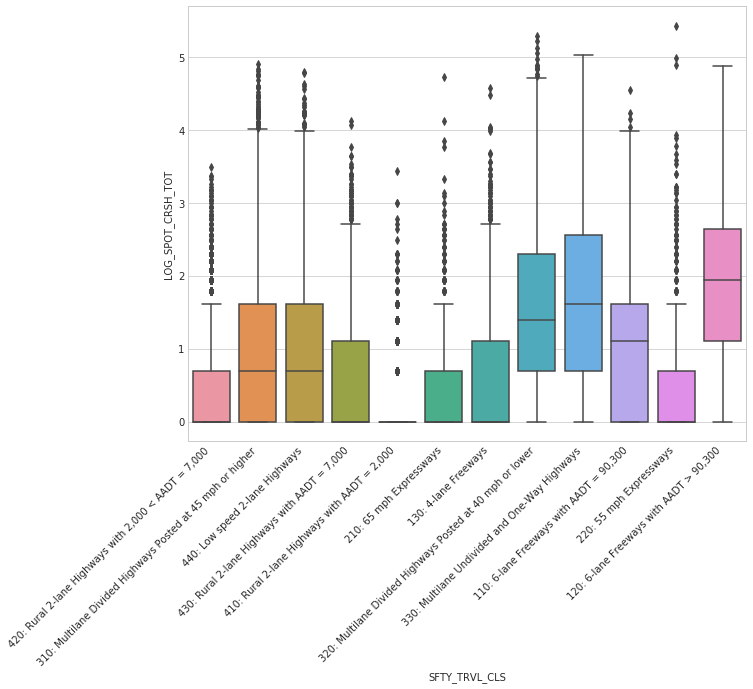

In [70]:
sns.boxplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=mydata)
plt.xticks(rotation=45,horizontalalignment='right')

## 4.2 Based on Spot KAB Crash Totals

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

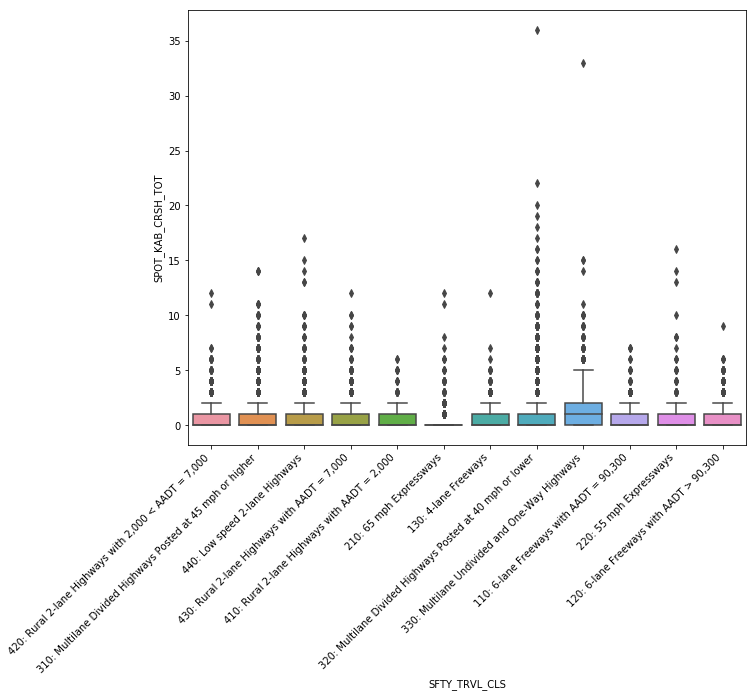

In [12]:
sns.boxplot(x="SFTY_TRVL_CLS", y="SPOT_KAB_CRSH_TOT", data=mydata)
plt.xticks(rotation=45,horizontalalignment='right')

## 4.3 Based on Spot KABC Crash Totals

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

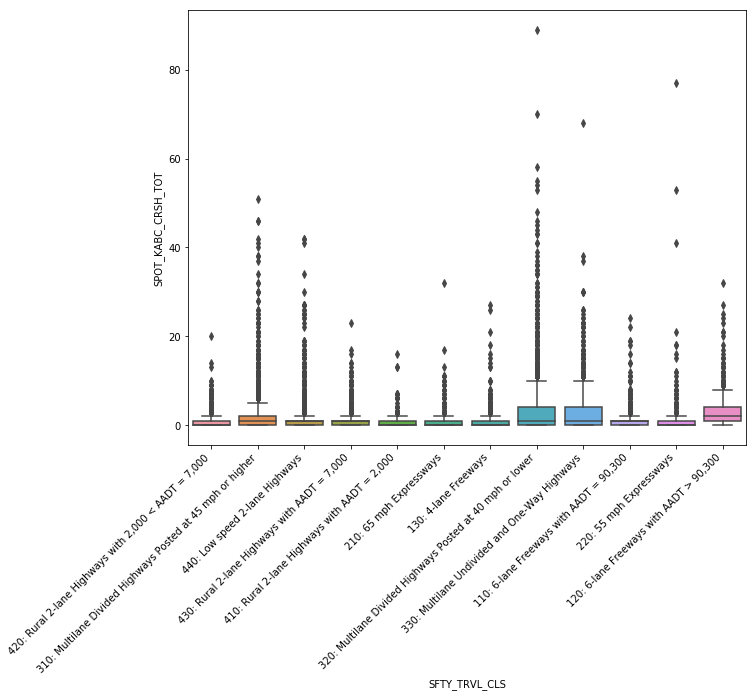

In [13]:
sns.boxplot(x="SFTY_TRVL_CLS", y="SPOT_KABC_CRSH_TOT", data=mydata)
plt.xticks(rotation=45,horizontalalignment='right')

# 5. Find locations of upper outliers based on Log Total Crashes & Total KAB Crashes:

### Class 110

In [71]:
mydata[(mydata.SFTY_TRVL_CLS == "110: 6-lane Freeways with AADT = 90,300")&
       ((mydata.LOG_SPOT_CRSH_TOT > 4) & (mydata.SPOT_KAB_CRSH_TOT > 2))]

PDP_ID   SPOT_RP_KY                                 FEATURE_NEAR  \
10018    9485  043S076H010                                MILEPOST 73.1   
10782    8821  041S334 060  B400824    /RAMP, I-41 SB/I/RAMP, I-41SB/I-   
6895    11393  053N009M000                                   STH 157 EB   
12217   18575  151N077 040                                  E SPRING DR   

                                 SFTY_TRVL_CLS WI_CNTY_NM CMTY_TY    CMTY_NM  \
10018  110: 6-lane Freeways with AADT = 90,300  MILWAUKEE       C  MILWAUKEE   
10782  110: 6-lane Freeways with AADT = 90,300  MILWAUKEE       C  MILWAUKEE   
6895   110: 6-lane Freeways with AADT = 90,300  LA CROSSE       C   ONALASKA   
12217  110: 6-lane Freeways with AADT = 90,300       DANE       C    MADISON   

       SPOT_CRSH_TOT  SPOT_ROR_TOT  SPOT_INTS_TOT  SPOT_NONINTS_TOT  \
10018             63            15              4                44   
10782             94            85              0                 9   
6895              69             2             61                 6   
12217             57             4             39                14   

       SPOT_FATAL_CRSH_TOT  SPOT_INCAP_INJ_CRSH_TOT  SPOT_AK_PPRTN  \
10018                    1                        0       0.015873   
10782                    0                        0       0.000000   
6895                     1                        0       0.014493   
12217                    0                        1       0.017544   

       SPOT_CRSH_RT_FL  SPOT_ROR_FL  SPOT_INTS_FL  SPOT_NONINTS_FL  \
10018         8.168627     0.000000      0.000000         1.666667   
10782        55.649867     1.459677      0.000000         0.000000   
6895         18.375000     0.000000      8.428571         0.000000   
12217        10.909091     0.000000      6.227273         0.000000   

       SPOT_AK_FL  SPOT_FATAL_CRSH_RT_FL  SPOT_INCAP_INJ_CRSH_RT_FL  \
10018         0.0               8.250000                     0.0000   
10782         0.0               0.000000                     0.0000   
6895          0.0              13.166667                     0.0000   
12217         0.0               0.000000                     3.3125   

       SPOT_ROR_CRSH_RT_FL  SPOT_INTS_CRSH_RT_FL  SPOT_CRSH_RT  \
10018             2.952381              4.000000      1.041344   
10782            72.136882              0.000000     10.490193   
6895              0.000000            109.295455      2.719715   
12217             1.153005             52.615385      1.499850   

       SPOT_ROR_CRSH_RT  SPOT_INTS_CRSH_RT  SPOT_FATAL_CRSH_RT  \
10018          0.247939           0.066117            0.016529   
10782          9.485813           0.000000            0.000000   
6895           0.078832           2.404386            0.039416   
12217          0.105253           1.026213            0.000000   

       SPOT_INCAP_INJ_CRSH_RT   SPOT_MEV  SPOT_LVL_PROB  RTE_SORTER  \
10018                0.000000  60.498750           24.0       50455   
10782                0.000000   8.960750           17.0       52156   
6895                 0.000000  25.370304           26.0       24844   
12217                0.026313  38.003800           22.0       40625   

       SPOT_WTHR_CRSH_TOT  SPOT_NONINCAP_INJ_CRSH_TOT  SPOT_PSBL_INJ_CRSH_TOT  \
10018                  18                           6                      15   
10782                  90                           5                      13   
6895                   17                           5                      18   
12217                  12                           6                      12   

       SPOT_PD_ONLY_CRSH_TOT  SPOT_KAB_CRSH_TOT  SPOT_KAB_CRSH_RT  \
10018                     41                  7          0.115705   
10782                     76                  5          0.557989   
6895                      45                  6          0.236497   
12217                     38                  7          0.184192   

       SPOT_KAB_CRSH_RT_FL  SPOT_B_CRSH_TOT  S

### Class 210

In [72]:
mydata[(mydata.SFTY_TRVL_CLS == '210: 65 mph Expressways')&((mydata.LOG_SPOT_CRSH_TOT > 1.25) & 
                                                            (mydata.SPOT_KAB_CRSH_TOT >= 0))]

PDP_ID   SPOT_RP_KY                                 FEATURE_NEAR  \
427       776  010E189M000                                        CTH T   
434       779  010E194M000                                      STH 186   
475       802  010E231K000     B490024    /USH 10         /USH 51-IH 39   
477       802  010E231P000                         ON RAMP TO USH 51 NB   
502       808  010E237M000           B490096    /CTH J SB       /USH 10   
509       809  010E238M000                 PUBLIC ACCESS TO FRONTAGE RD   
512       809  010E239M000                           NORTH LN / DEER RD   
524       811  010E242M000                                      STH 161   
561       818  010E259M000                                    MORGAN DR   
572       820  010E260M000                                        CTH Q   
625       828  010E274T190                                    VAUGHN RD   
627       829  010E277M000                                HARRINGTON RD   
630       830  010E278M000                                      REEK RD   
645       834  010E281 000                                    USH 10 EB   
2211     5539  029E150M000                                        CTH F   
2219     5542  029E153M000                                  MAPLENUT RD   
2242     5546  029E157M000                               STH 97  (OVER)   
2244     5546  029E158M000                                   PIONEER DR   
2250     5547  029E160M000                                        CTH M   
2252     5549  029E161M000                                  HILLDALE DR   
2261     5551  029E163M000                                CTH H  (OVER)   
2263     5551  029E163M020                   GORE OF ON RAMP FROM CTH H   
2270     5552  029E164M080                                          NaN   
2272     5553  029E165M000                                  CARDINAL LA   
2274     5553  029E165M050                             WAYSIDE ENTRANCE   
2275     5553  029E165M080                             MEDIAN CROSSOVER   
2277     5554  029E166M000                                        CTH S   
2283     5555  029E167M000                                    MORGAN LA   
2295     5558  029E169K100                                          NaN   
2407     5584  029E209H000           B370377    /CTH Y          /STH 29   
...       ...          ...                                          ...   
2850     3403  018E151M020  B130650    /USH 18/151, VER/Frontage Rd E &   
2851     3403  018E151M030                                  ATTICUS WAY   
2852     3404  018E151M040                                 ATTIICUS WAY   
2853     3404  018E151M050                         CONN TO MIDVALE BLVD   
2854     3405  018E151M060                       CONN FROM MIDVALE BLVD   
2855     3405  018E151M070                                          NaN   
3872     4836  026N027K060                                          NaN   
3917     4857  026N048M000                                  EBENEZER DR   
7938    13223  061N007M000                               OLD HIGHWAY RD   
7940    13225  061N008G000              B220122    /USH 61/151 NB-S/HHH   
7942    13226  061N009T000                B220124    /USH 61/151 NB-S/H   
12006   18509  151N005M000                                HILL CLIMB RD   
12017   18511  151N008M000                                   AIRPORT RD   
12028   18514  151N013M000                               HUMMINGBIRD RD   
12031   18514  151N014M000                               MAPLE RIDGE RD   
12064   18525  151N033M000                                          NaN   
12074   18528  151N037M000                                  BURR OAK RD   
12082   18529  151N042M010                                          NaN   
12364   18608  151N112M000                                   JACKSON RD   
12409   18622  151N125M000                              BREEZY POINT RD   
12412   18623  151N126M000                                   REDWOOD RD   
12417   18624  151N127M000      

### Class 310

In [74]:
mydata[(mydata.SFTY_TRVL_CLS == '310: Multilane Divided Highways Posted at 45 mph or higher')
       & ((mydata.LOG_SPOT_CRSH_TOT > 4.1) & (mydata.SPOT_KAB_CRSH_TOT > 2))]

PDP_ID   SPOT_RP_KY                FEATURE_NEAR  \
483      2884  015E120 000                 CASALOMA DR   
1329     1497  012E085V000                  RUDOLPH RD   
763      3462  018E211M000                     MAIN ST   
770      3464  018E212 000                  SWENSON DR   
778      3466  018E218 000                       CTH Y   
788      3467  018E219 000               BROOKFIELD RD   
799      3469  018E220 000                  CALHOUN RD   
808      3471  018E221 000                PILGRIM PKWY   
816      3472  018E222 000              SUNNY SLOPE RD   
1081     3840  020E049B000                WISCONSIN ST   
1097     3845  020E051B000                    OAKES RD   
1287     5938  031N004G000  CONNECTOR FROM FRONTAGE RD   
1305     5942  031N008G000                   STH 50 WB   
1316     5944  031N009K000                       CTH K   
1322     5946  031N009T000                  STH 158 EB   
1323     5946  031N010K000                  STH 158 WB   
1331     5949  031N011 000                 CTH S  (EB)   
1363     5957  031N019M000                  RACINE UAB   
2363     7595  038N018K000                    PUETZ RD   
2373     7597  038N019 000                  DREXEL AVE   
2382     7598  038N020 000                E RAWSON AVE   
4365    10731  050E050 000                   104TH AVE   
4374    10732  050E051 000                       CTH H   
4715    12904  059E126M000              SAYLESVILLE RD   
4727    12907  059E129T000        STH 164 NB   (S JCT)   
4736    12908  059E130M000                   SUNSET DR   
4742    12909  059E131K000                  RACINE AVE   
4747    12910  059E132T000                       CTH D   
5293    14081  067N051 000                   VALLEY RD   
7245    19524  175N003A000                GOOD HOPE RD   
7598    19879  190E008 000               BROOKFIELD RD   
7608    19881  190E009 000                  CALHOUN RD   
7635    19885  190E012 000                  N 124TH ST   
11721    3571  018W212 050               SPRINGDALE RD   
2081     2913  016E009D000                 GILLETTE ST   
2090     2914  016E011T000         CTH B       (N JCT)   
2112     2922  016E015T000          N KINNEY COULEE RD   
2837     3395  018E150 000                    MCKEE RD   
6670    10909  051N066M000      ON RAMP FROM STH 30 EB   

                                           SFTY_TRVL_CLS  WI_CNTY_NM CMTY_TY  \
483    310: Multilane Divided Highways Posted at 45 m...   OUTAGAMIE       T   
1329   310: Multilane Divided Highways Posted at 45 m...  EAU CLAIRE       C   
763    310: Multilane Divided Highways Posted at 45 m...    WAUKESHA       C   
770    310: Multilane Divided Highways Posted at 45 m...    WAUKESHA       C   
778    310: Multilane Divided Highways Posted at 45 m...    WAUKESHA       T   
788    310: Multilane Divided Highways Posted at 45 m...    WAUKESHA       T   
799    310: Multilane Divided Highways Posted at 45 m...    WAUKESHA       C   
808    310: Multilane Divided Highways Posted at 45 m...    WAUKESHA       V   
816    310: Multilane Divided Highways Posted at 45 m...    WAUKESHA       V   
1081   310: Multilane Divided Highways Posted at 45 m...      RACINE       V   
1097   310: Multilane Divided Highways Posted at 45 m...      RACINE       V   
1287   310: Multilane Divided Highways Posted at 45 m...     KENOSHA       V   
1305   310: Multilane Divided Highways Posted at 45 m...     KENOSHA       C   
1316   310: Multilane Divided Highways Posted at 45 m...     KENOSHA       C   
1322   310: Multilane Divided Highways Posted at 45 m...     KENOSHA       C   
1323   310: Multilane Divided Highways Posted at 45 m...     KENOSHA       C   
1331   310: Multilane Divided Highways Posted at 45 m...     KENOSHA       T   
1363   310: Multilane Divided Highways Posted at 45 m...     KENOSHA       V   
2363   310: Multilane Divided Highways Posted at 45 m...   MILWAUKEE       C   
2373   310: Multilane Divided Highways Posted at 45 m...   MILWAUKEE       C   
2382  

### Class 320

In [79]:
mydata[(mydata.SFTY_TRVL_CLS == '320: Multilane Divided Highways Posted at 40 mph or lower')
       & ((mydata.LOG_SPOT_CRSH_TOT > 4.7) & (mydata.SPOT_KAB_CRSH_TOT > 2))]

PDP_ID   SPOT_RP_KY                  FEATURE_NEAR  \
5717    17554  114E001K040  RAB CONN. FROM 114 W TO 114E   
7210    17835  125W002 030                 WESTHILL BLVD   
7223    17594  114W005M070   RAB CONN. FROM 114W TO 114E   
1407     5967  031N026 000                     SPRING ST   
2024     6793  033E260G000                      18TH AVE   
4785    12918  059E141 000                   MOORLAND RD   
6158    17134  100N020 000                W OKLAHOMA AVE   
6212    17150  100N036 000                   W NORTH AVE   
6572    18391  145N001M000                 W BURLEIGH ST   
7472    19740  181N008 000                     W MILL RD   
7481    19742  181N009 000                W GOOD HOPE RD   
7697    19900  190E021 000                     N 35TH ST   
7793    20025  241N006R000                  W LAYTON AVE   
12175   18563  151N073 000                    STH 113 NB   

                                           SFTY_TRVL_CLS  WI_CNTY_NM CMTY_TY  \
5717   320: Multilane Divided Highways Posted at 40 m...   WINNEBAGO       C   
7210   320: Multilane Divided Highways Posted at 40 m...   OUTAGAMIE       T   
7223   320: Multilane Divided Highways Posted at 40 m...   WINNEBAGO       C   
1407   320: Multilane Divided Highways Posted at 40 m...      RACINE       V   
2024   320: Multilane Divided Highways Posted at 40 m...  WASHINGTON       C   
4785   320: Multilane Divided Highways Posted at 40 m...    WAUKESHA       C   
6158   320: Multilane Divided Highways Posted at 40 m...   MILWAUKEE       C   
6212   320: Multilane Divided Highways Posted at 40 m...   MILWAUKEE       C   
6572   320: Multilane Divided Highways Posted at 40 m...   MILWAUKEE       C   
7472   320: Multilane Divided Highways Posted at 40 m...   MILWAUKEE       C   
7481   320: Multilane Divided Highways Posted at 40 m...   MILWAUKEE       C   
7697   320: Multilane Divided Highways Posted at 40 m...   MILWAUKEE       C   
7793   320: Multilane Divided Highways Posted at 40 m...   MILWAUKEE       C   
12175  320: Multilane Divided Highways Posted at 40 m...        DANE       C   

              CMTY_NM  SPOT_CRSH_TOT  SPOT_ROR_TOT  SPOT_INTS_TOT  \
5717           NEENAH            125            29             90   
7210      GRAND CHUTE            126             5             53   
7223           NEENAH            168            31            124   
1407   MOUNT PLEASANT            127             4            106   
2024        WEST BEND            111             7             69   
4785       NEW BERLIN            157            10            116   
6158       WEST ALLIS            131            18             67   
6212        WAUWATOSA            145            14             94   
6572        MILWAUKEE            184            19            125   
7472        MILWAUKEE            110            12             74   
7481        MILWAUKEE            132            13             70   
7697        MILWAUKEE            197            14            158   
7793       GREENFIELD            118            15             84   
12175         MADISON            114             6             87   

       SPOT_NONINTS_TOT  SPOT_FATAL_CRSH_TOT  SPOT_INCAP_INJ_CRSH_TOT  \
5717                  6                    0                        0   
7210                 68                    0                        2   
7223                 13                    0                        0   
1407                 17                    0                        2   
2024                 35                    0                        1   
4785                 31                    1                        3   
6158                 46                    0                        1   
6212                 37                    0                        3   
6572                 40                    0                        2   
7472                 24                    0                        2   
7481                 49                    1                      

### Class 330 (Note that no areas have outliers for crash total)

In [78]:
mydata[(mydata.SFTY_TRVL_CLS == '330: Multilane Undivided and One-Way Highways')
       & (mydata.SPOT_KAB_CRSH_TOT > 5)]

PDP_ID    SPOT_RP_KY              FEATURE_NEAR  \
1991     4204   022N159 000                   STH 55S   
5431    13953   066E003A000                USH B51 NB   
7084    20220  B051N237T000             SCHOFIELD AVE   
7087    20220  B051N239 010             EAU CLAIRE ST   
7248    14001   066W003A000                USH B51 NB   
7325    11360   052W005 040               CHICAGO AVE   
7334    11364   052W003 050                  SCOTT ST   
174       870   010E319D000                 MIDWAY RD   
2648     8564   041N645 000              ROOSEVELT RD   
2687     8905   042N001N010                 NORTH AVE   
3672     9640   044N084M040                  HIGH AVE   
3673     9642   044N084M050               ALGOMA BLVD   
3889     9792   045N133M000                W 24TH AVE   
3917     9805   045N137D050            W NEW YORK AVE   
4033    10208   047N005 050              PROSPECT AVE   
4035    10210   047N006 000                  W 6TH ST   
4379    12113   054E244K050              ELIZABETH ST   
5726    17558   114E005M040            WINNECONNE AVE   
5731    17562   114E006 000             WISCONSIN AVE   
5733    17563   114E006 030                  WATER ST   
5748    17569   114E007M040                 RACINE ST   
11          6   002E005 000                 TOWER AVE   
1191     1440   012E050 020                 MAPLE AVE   
6339    13880   065N026 040                     C0000   
280      1319   011E201 090             S MEMORIAL DR   
859      3485   018E226 050                 N 76TH ST   
864      3486   018E228 020               WELLAUER DR   
884      3494   018E233M000           WISCONSIN AVE E   
904      3504   018E236M000    USH 18 WB(END DIVIDED)   
912      3513   018E238P000                STH 145 NB   
...       ...           ...                       ...   
4914    13130   060E182 000                 STH 83 NB   
6558    18388   145N001D010               W NORTH AVE   
6561    18388   145N001D040               W WRIGHT ST   
6562    18388   145N001D050             W TAMARACK ST   
6563    18388   145N001D060              W HICKORY ST   
6565    18389   145N001G000               W CENTER ST   
6569    18390   145N001G040               W LOCUST ST   
7183    19500   175N001F090                 N 56TH ST   
7422    19722   181N005F060               W NORTH AVE   
7887    20168   794E107M000          PENNSLYVANIA AVE   
7903    20171   794E109 000              CTH ZZ  (WB)   
11094    7628   038S026 000  STH 38N  (BEGIN DIVIDED)   
589      1656   012E272 030                       NaN   
590      1656   012E272 040                       NaN   
597      1656   012E272 110                PILGRIM DR   
598      1656   012E272 120              RIDGEWOOD ST   
600      1657   012E274 000              WINNEBAGO LA   
602      1658   012E274 020               HIAWATHA DR   
1196     2529   014E010 000                 WESTON ST   
3015     3680   019E022M000             SCHUMACHER RD   
4608     6673   033E146 030                   EAST ST   
5270     6982   035N119G020                CLINTON ST   
6418    10835   051N019A000                 STH 26 NB   
6803    10948   051N103G000                     CTH P   
6839    10959   051N106M030                COLLINS ST   
6851    11380   053N002M010                  STATE ST   
6862    11385   053N004M000                MONITOR ST   
13238   18863   151S068M080                 USH 14 EB   
14551   11862   053S002M000                   MAIN ST   
16190    1867   012W390D000                 STH 89 NB   

                                       SFTY_TRVL_CLS  WI_CNTY_NM CMTY_TY  \
1991   330: Multilane Undivided and One-Way Highways     SHAWANO       C   
5431   330: Multilane Undivided and One-Way Highways     PORTAGE       C   
7084   330: Multilane Undivided and One-Way Highways    MARATHON       C   
7087   330: Multilane Undivided and One-Way Highways    MARATHON       C   
7248   330: Multilane Undivided and One-Way Highways     PORTAGE       C   
7325   330: Mult

### Class 410

In [81]:
mydata[(mydata.SFTY_TRVL_CLS == '410: Rural 2-lane Highways with AADT = 2,000')
       & ((mydata.LOG_SPOT_CRSH_TOT > 0.25) & (mydata.SPOT_KAB_CRSH_TOT > 2))]

PDP_ID   SPOT_RP_KY         FEATURE_NEAR  \
1706     4100  022N049 000                CTH J   
1860     4164  022N126T000           STH 110 NB   
4832    11960  054E113A170  D FIELD DRWY /WOODS   
5076    12323  055N079 200                  NaN   
6574    17430  110N052 000      STONEY RIDGE RD   
2843     8970  042N048 000           NUCLEAR RD   
1142     1421  012E033 000           STH 128 NB   
3456     7136  035N262 000                CTH V   
5204    11874  054E007 000      SILVER CREEK RD   
8459    17276  102N011 000                CTH C   
4859    12936  059E152K000           STH 341 SB   
4863    12936  059E152M030            S 41ST ST   
5093    14021  067N001R000                CTH K   
7236    19517  175N002P000           N 107TH ST   
7384    12814  059E048 000            TOLLES RD   
7698    13038  060E082 160                  NaN   
7699    13039  060E084 000          WILLIAMS RD   
7831    13091  060E138 000                CTH C   
8648    14558  071E047 000           STH 131 NB   
9407    15367  080N164M080                  NaN   
10072   15962  089N047 000            DALMAN RD   
10775   16240  092E029 110                  NaN   
12829   19993  213N013 000                CTH H   

                                      SFTY_TRVL_CLS   WI_CNTY_NM CMTY_TY  \
1706   410: Rural 2-lane Highways with AADT = 2,000    MARQUETTE       T   
1860   410: Rural 2-lane Highways with AADT = 2,000      WAUPACA       T   
4832   410: Rural 2-lane Highways with AADT = 2,000         WOOD       T   
5076   410: Rural 2-lane Highways with AADT = 2,000    MENOMINEE       T   
6574   410: Rural 2-lane Highways with AADT = 2,000      WAUPACA       T   
2843   410: Rural 2-lane Highways with AADT = 2,000    MANITOWOC       T   
1142   410: Rural 2-lane Highways with AADT = 2,000    ST. CROIX       T   
3456   410: Rural 2-lane Highways with AADT = 2,000    ST. CROIX       T   
5204   410: Rural 2-lane Highways with AADT = 2,000  TREMPEALEAU       T   
8459   410: Rural 2-lane Highways with AADT = 2,000       TAYLOR       T   
4859   410: Rural 2-lane Highways with AADT = 2,000    MILWAUKEE       C   
4863   410: Rural 2-lane Highways with AADT = 2,000    MILWAUKEE       V   
5093   410: Rural 2-lane Highways with AADT = 2,000     WALWORTH       T   
7236   410: Rural 2-lane Highways with AADT = 2,000    MILWAUKEE       C   
7384   410: Rural 2-lane Highways with AADT = 2,000         ROCK       T   
7698   410: Rural 2-lane Highways with AADT = 2,000         SAUK       T   
7699   410: Rural 2-lane Highways with AADT = 2,000         SAUK       T   
7831   410: Rural 2-lane Highways with AADT = 2,000     COLUMBIA       T   
8648   410: Rural 2-lane Highways with AADT = 2,000       MONROE       T   
9407   410: Rural 2-lane Highways with AADT = 2,000       JUNEAU       T   
10072  410: Rural 2-lane Highways with AADT = 2,000        DODGE       T   
10775  410: Rural 2-lane Highways with AADT = 2,000        GREEN       T   
12829  410: Rural 2-lane Highways with AADT = 2,000         ROCK       T   

              CMTY_NM  SPOT_CRSH_TOT  SPOT_ROR_TOT  SPOT_INTS_TOT  \
1706          SHIELDS              6             2              4   
1860            UNION              4             3              1   
4832         CRANMOOR              6             5              0   
5076        MENOMINEE             10             8              0   
6574            UNION              4             1              3   
2843       TWO CREEKS              5             0              5   
1142      SPRINGFIELD             12             0             12   
3456     SAINT JOSEPH             16             2             13   
5204             GALE              5             0              5   
8459         RIB LAKE              4             0              4   
4859        MILWAUKEE             20             3              8   
4863   WEST MILWAUKEE             20             1             15   
5093           SHARON              8             0          

### Class 420

In [83]:
mydata[(mydata.SFTY_TRVL_CLS == '420: Rural 2-lane Highways with 2,000 < AADT = 7,000')
       & ((mydata.LOG_SPOT_CRSH_TOT > 1.6) & (mydata.SPOT_KAB_CRSH_TOT > 2))]

PDP_ID   SPOT_RP_KY              FEATURE_NEAR  \
171       422  008E177K000                     CTH L   
219       435  008E190K100     TOWN PUMP TAVERN DRWY   
252       445  008E200D000                 STH 17 SB   
264       450  008E209T000                     S0937   
978      2141  013N093T000                     CTH P   
1224     3191  017N001G000                 STH 64 EB   
1228     3192  017N003B000                     CTH G   
1520     3972  021E104 000              R FARM  DRWY   
1761     4124  022N086 000              G FIELD DRWY   
1999     4210  022N161 000                  CEDAR LA   
2040     4405  023E125 000                     CTH B   
2156     4461  023E178 000                 STH 73 SB   
2687     6872  034N032G010                       NaN   
3074     9835  045N155M000                  STH 96 E   
3267     9890  045N225 060  USH 45S  (BEGIN DIVIDED)   
3330     9915  045N244 000                 STH 52 WB   
3654    10264  047N047P000                     CTH B   
3996    10588  049N087 000                     CTH M   
4947    12011  054E152F020               HARDING AVE   
4975    12024  054E170M000                  CTH A& K   
5235    13713  064E188D000                    STH 17   
5742    14673  073N078 000                    CTH AW   
5805    14703  073N125 000                    CTH YY   
6115    15625  082E119 000                     CTH Z   
6138    15635  082E127 000                     CTH B   
6261    16898  096E080 080                       NaN   
6369    17054  097N025M010      ON RAMP FROM STH 29W   
700      4482  023E198 000       STH 44 NB   (E JCT)   
1280     5689  029E307 000                     CTH P   
1398     6214  032N086 000                     CTH J   
...       ...          ...                       ...   
1556     2629  014E147 000                STH 133 NB   
2443     3061  016E168 000                     CTH R   
2445     3063  016E169T040                OAKHILL RD   
2546     3292  018E028 000                 STH 35 NB   
2596     3313  018E056G040              BRONSON BLVD   
2876     3413  018E163 000                     CTH G   
3292     3910  021E024 000                     CTH M   
3392     4052  022N002 000                    STH 60   
3750     4390  023E109 000                 STH 33 EB   
4318     5324  028E018M000            STH 67N & 175N   
4827     6740  033E216 000                     CTH B   
5123     6938  035N075 000                   WAYSIDE   
6513    10866  051N039 000            MAPLE GROVE RD   
6736    10932  051N084 000                 STH 22 SB   
7262    12771  058N073 000          CTH G  (MID JCT)   
7362    12804  059E038 000                   STH 213   
7563    12881  059E105 000                     CTH H   
8041    13249  061N046 000         STH 129   (S JCT)   
8229    14014  067N001A000                 STH 140 N   
8550    14279  069N046 000                     CTH A   
8686    14607  073N008 000                     CTH A   
8713    14620  073N022 000                    CTH BB   
9126    15259  080N014 000                 STH 81 EB   
9702    15510  081E111B000                     CTH T   
11130   17295  104N015M000                     CTH C   
11204   17325  106E023 000                     CTH N   
11313   17495  113N018M000                     CTH V   
11325   17498  113N021M000                     CTH V   
11460   17895  129N003 000                     CTH A   
11496   17907  130N015 000                STH 133 NB   

                                           SFTY_TRVL_CLS   WI_CNTY_NM CMTY_TY  \
171    420: Rural 2-lane Highways with 2,000 < AADT =...      LINCOLN       T   
219    420: Rural 2-lane Highways with 2,000 < AADT =...       ONEIDA       T   
252    420: Rural 2-lane Highways with 2,000 < AADT =...       ONEIDA       T   
264    420: Rural 2-lane Highways with 2,000 < AADT =...       ONEIDA       T   
978    420: Rural 2-lane Highways with 2,000 < AADT =...      PORTAGE       T   
1224   420: Rural 2-lane Highways with 2,000 < A

### Class 430

In [84]:
mydata[(mydata.SFTY_TRVL_CLS == '430: Rural 2-lane Highways with AADT = 7,000')
       & ((mydata.LOG_SPOT_CRSH_TOT > 2.7) & (mydata.SPOT_KAB_CRSH_TOT > 2))]

PDP_ID    SPOT_RP_KY                    FEATURE_NEAR  \
7051   20212  B051N232M000                    IMPERIAL AVE   
765     4502   023E220 000                   ESTERBROOK RD   
1138    5368   028E063K000                          CTH EE   
4625   12269   055N028 070                      MALONEY RD   
5317   14951   076N003P000                          CTH II   
5344   14957   076N005K000                         STH 96E   
6102   18232   141N179 000                           CTH W   
6372   18662   151N159M000                     USH L151 NB   
6795   20076   310E005P000  RAB CONN FROM 310 EB TO 310 WB   
6810   20078   310E008M000                        CTH B SB   
3368    7109   035N245M010                           CTH M   
5337   13328   063N004 000                        830TH ST   
344     1797   012E415 000                           CTH H   
386     1804   012E424 000                          CTH ES   
546     2767   014E287 000                  SIX CORNERS RD   
1424    5973   031N031M000                    FOUR MILE RD   
1452    6018   032N003 000                     STH 165 E&W   
1642    6070   032N030 000                           CTH G   
2328    7586   038N015K000                           CTH H   
3966    9696   045N039F000                SAINT MARTINS RD   
4179   10677   050E005M020                    TOWN HALL RD   
4710   12903   059E126 000                MERRILL HILLS RD   
4896   13125   060E180M000                INDEPENDENCE AVE   
5044   13164   060E203M000                  WASHINGTON AVE   
5379   15664   083N002 000                          CTH JF   
5385   15665   083N003 000                       WILMOT RD   
5465   15678   083N030 000                   JAMESVILLE RD   
5578   15724   083N058T050                     CARDINAL LA   
6124   17125   100N005K000                       S 76TH ST   
6705   19068   158E002G000                       104TH AVE   
6711   19071   158E003 000                           CTH H   
6903   19210   164N155M000                    GOOD HOPE RD   
6923   19215   164N158M000                        CTH Q EB   
6947   19218   164N161 000                     HUBERTUS RD   
6955   19219   164N162 000                         STH 167   
6995   19258   165E101G000                   E FRONTAGE RD   
7291   19536   175N010B000                       LANNON RD   
7533   19754   181N019G000                      PIONEER RD   
234     1197   011E099B000                       STH 81 WB   
1795    2694   014E219 000                           CTH A   
1818    2698   014E224 000                       STH 92 WB   
1931    2720   014E247 000                      N RIVER RD   
1970    2738   014E255 000                           CTH A   
3045    3688   019E026B000                        RIVER RD   
4956    6776   033E244 000                           CTH P   
6562   10886   051N047K060                         TOWN RD   
6594   10891   051N054 000                     MADISON UAB   

                                     SFTY_TRVL_CLS   WI_CNTY_NM CMTY_TY  \
7051  430: Rural 2-lane Highways with AADT = 7,000     MARATHON       V   
765   430: Rural 2-lane Highways with AADT = 7,000  FOND DU LAC       T   
1138  430: Rural 2-lane Highways with AADT = 7,000    SHEBOYGAN       C   
4625  430: Rural 2-lane Highways with AADT = 7,000    OUTAGAMIE       C   
5317  430: Rural 2-lane Highways with AADT = 7,000    WINNEBAGO       T   
5344  430: Rural 2-lane Highways with AADT = 7,000    OUTAGAMIE       T   
6102  430: Rural 2-lane Highways with AADT = 7,000    MARINETTE       V   
6372  430: Rural 2-lane Highways with AADT = 7,000  FOND DU LAC       T   
6795  430: Rural 2-lane Highways with AADT = 7,000    MANITOWOC       T   
6810  430: Rural 2-lane Highways with AADT = 7,000    MANITOWOC       T   
3368  430: Rural 2-lane Highways with AADT = 7,000    ST. CROIX       C   
5337  430: Rural 2-lane Highways with AADT = 7,000       PIERCE       T   
344   430: Rural 2-lane Highways with AADT = 7,000    

### Class 440

In [85]:
mydata[(mydata.SFTY_TRVL_CLS == "440: Low speed 2-lane Highways") 
       & ((mydata.LOG_SPOT_CRSH_TOT > 4.0) & (mydata.SPOT_KAB_CRSH_TOT > 2))]

PDP_ID   SPOT_RP_KY              FEATURE_NEAR  \
1625     6301  032N154 000                   MAIN ST   
3775     9772  045N114 000                HICKORY ST   
3783     9774  045N115 000  USH 45 N (BEGIN DIVIDED)   
1115     3850  020E054 000    STH 20 WB(END DIVIDED)   
1120     3851  020E054 050               LATHROP AVE   
1719     6090  032N038 000             S PACKARD AVE   
2438     7617  038N026 020               W BECHER ST   
4408    10740  050E056H000              ROOSEVELT DR   
4437    12468  057N001M010          W SAINT PAUL AVE   
4439    12470  057N001M030           W WISCONSIN AVE   
4458    12477  057N004 010               W NORTH AVE   
4468    12481  057N005 030              W HOPKINS ST   
4827    12927  059E148 000   STH 59 WB (END DIVIDED)   
4833    12928  059E149A000                STH 181 NB   
4838    12929  059E149A050                 S 77TH ST   
4839    12929  059E149A060                 S 75TH ST   
4840    12929  059E149A070                 S 73RD ST   
4849    12932  059E151D010                 S 61ST ST   
7185    19502  175N001H010               W CENTER ST   
2050     2908  016E005 000                WEST AVE N   
4350     6571  033E003M000                  WEST AVE   
12501   19056  157E006G000                    CTH PH   

                        SFTY_TRVL_CLS   WI_CNTY_NM CMTY_TY      CMTY_NM  \
1625   440: Low speed 2-lane Highways        BROWN       C      DE PERE   
3775   440: Low speed 2-lane Highways  FOND DU LAC       C  FOND DU LAC   
3783   440: Low speed 2-lane Highways  FOND DU LAC       C  FOND DU LAC   
1115   440: Low speed 2-lane Highways       RACINE       C       RACINE   
1120   440: Low speed 2-lane Highways       RACINE       C       RACINE   
1719   440: Low speed 2-lane Highways    MILWAUKEE       C       CUDAHY   
2438   440: Low speed 2-lane Highways    MILWAUKEE       C    MILWAUKEE   
4408   440: Low speed 2-lane Highways      KENOSHA       C      KENOSHA   
4437   440: Low speed 2-lane Highways    MILWAUKEE       C    MILWAUKEE   
4439   440: Low speed 2-lane Highways    MILWAUKEE       C    MILWAUKEE   
4458   440: Low speed 2-lane Highways    MILWAUKEE       C    MILWAUKEE   
4468   440: Low speed 2-lane Highways    MILWAUKEE       C    MILWAUKEE   
4827   440: Low speed 2-lane Highways    MILWAUKEE       C   WEST ALLIS   
4833   440: Low speed 2-lane Highways    MILWAUKEE       C   WEST ALLIS   
4838   440: Low speed 2-lane Highways    MILWAUKEE       C   WEST ALLIS   
4839   440: Low speed 2-lane Highways    MILWAUKEE       C   WEST ALLIS   
4840   440: Low speed 2-lane Highways    MILWAUKEE       C   WEST ALLIS   
4849   440: Low speed 2-lane Highways    MILWAUKEE       C    MILWAUKEE   
7185   440: Low speed 2-lane Highways    MILWAUKEE       C    MILWAUKEE   
2050   440: Low speed 2-lane Highways    LA CROSSE       C    LA CROSSE   
4350   440: Low speed 2-lane Highways    LA CROSSE       C    LA CROSSE   
12501  440: Low speed 2-lane Highways    LA CROSSE       C    LA CROSSE   

       SPOT_CRSH_TOT  SPOT_ROR_TOT  SPOT_INTS_TOT  SPOT_NONINTS_TOT  \
1625              60             1             54                 5   
3775              68             9             39                20   
3783              68             7             47                14   
1115             121             9             82                30   
1120              71             5             43                23   
1719              77             9             51                17   
2438              57             4             34                19   
4408             103             7             83                13   
4437              70             4             54                12   
4439              67             5             55                 7   
4458              67             4             51                12   
4468             100             4             85                11   
4827              75             8             45                22  

# 6. Break out each Safety Travel Class and complete Statistics for each

In [87]:
travel_class110 = mydata[mydata.SFTY_TRVL_CLS == "110: 6-lane Freeways with AADT = 90,300"]
travel_class210 = mydata[mydata.SFTY_TRVL_CLS == "210: 65 mph Expressways"]
travel_class220 = mydata[mydata.SFTY_TRVL_CLS == "220: 55 mph Expressways"]
travel_class310 = mydata[mydata.SFTY_TRVL_CLS == "310: Multilane Divided Highways Posted at 45 mph or higher"]
travel_class320 = mydata[mydata.SFTY_TRVL_CLS == "320: Multilane Divided Highways Posted at 40 mph or lower"]
travel_class330 = mydata[mydata.SFTY_TRVL_CLS == "330: Multilane Undivided and One-Way Highways" ]
travel_class410 = mydata[mydata.SFTY_TRVL_CLS == "410: Rural 2-lane Highways with AADT = 2,000" ]
travel_class420 = mydata[mydata.SFTY_TRVL_CLS == "420: Rural 2-lane Highways with 2,000 < AADT = 7,000" ]
travel_class430 = mydata[mydata.SFTY_TRVL_CLS == "430: Rural 2-lane Highways with AADT = 7,000" ]
travel_class440 = mydata[mydata.SFTY_TRVL_CLS == "440: Low speed 2-lane Highways"]

## 6.1 Swarmplot by Travel Class - Total Crashes

KeyboardInterrupt: 

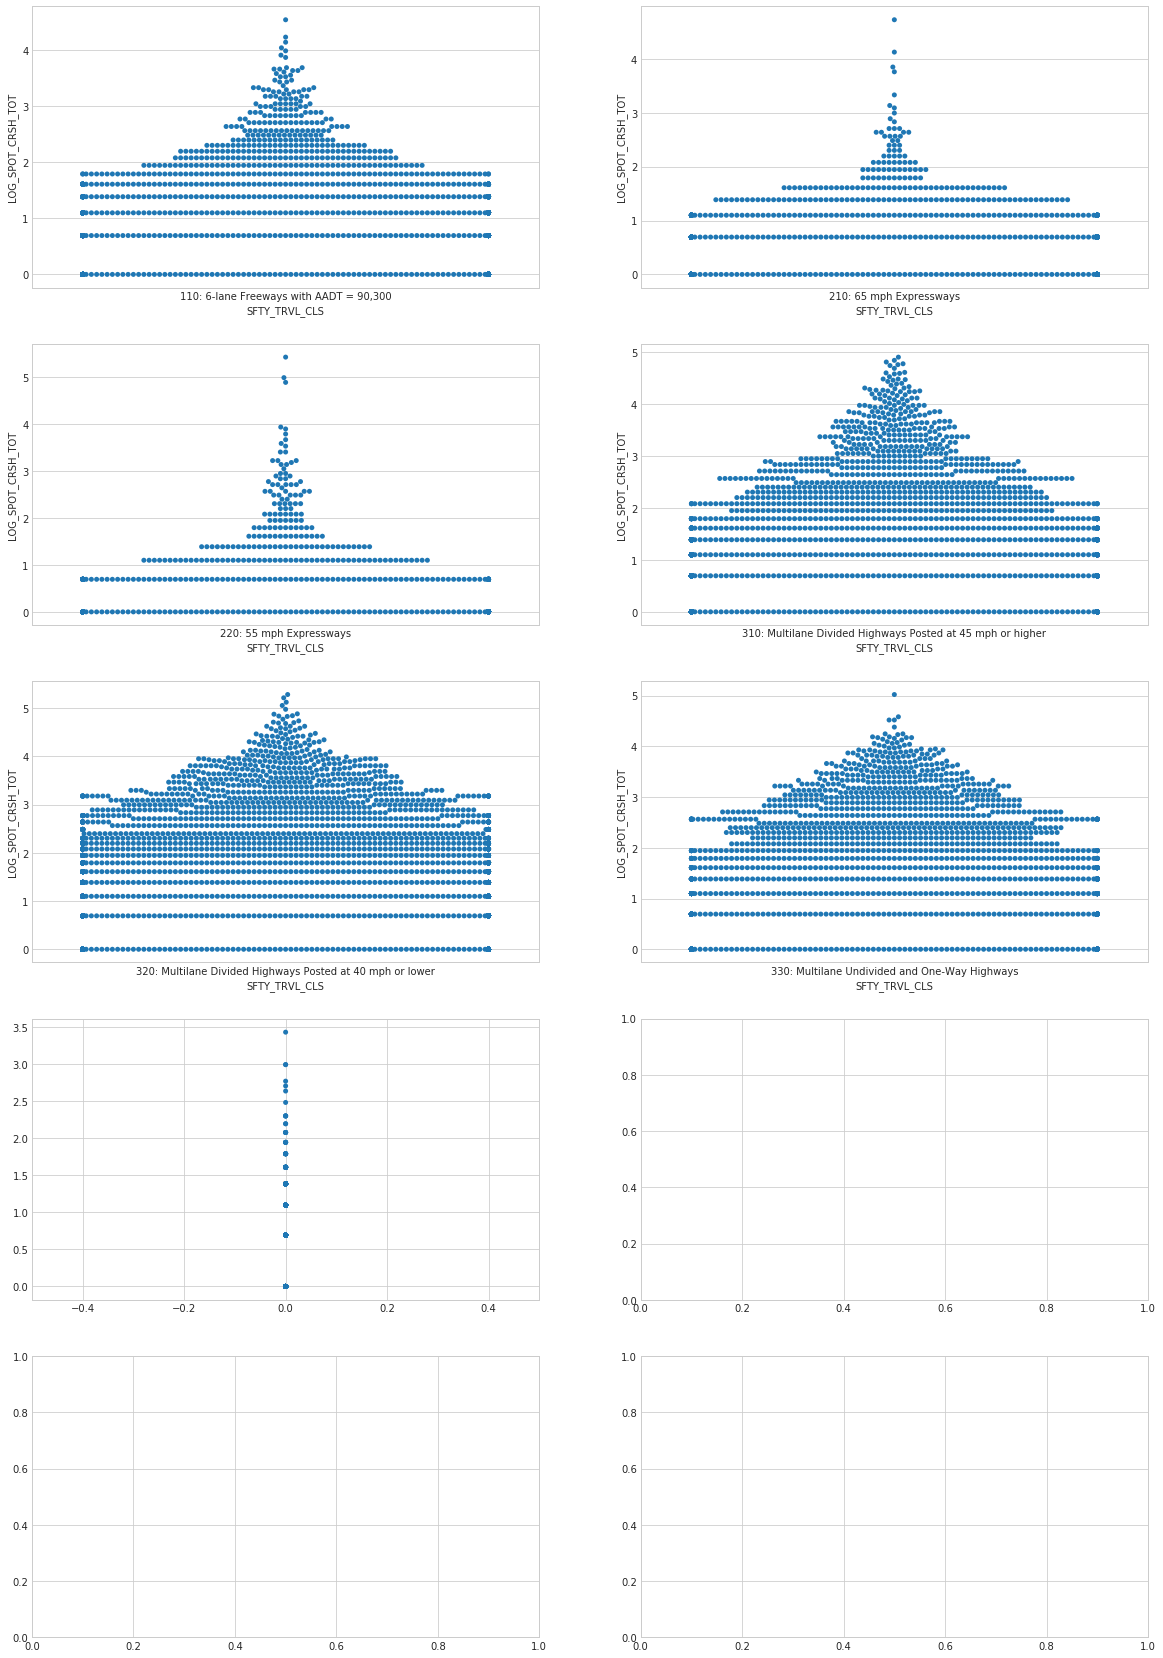

In [88]:
sns.set_style("whitegrid")
f, axes = plt.subplots(5,2, figsize=(20, 30), sharex=False)
sns.swarmplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class110, ax=axes[0,0])
sns.swarmplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class210, ax=axes[0,1])
sns.swarmplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class220, ax=axes[1,0])
sns.swarmplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class310, ax=axes[1,1])
sns.swarmplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class320, ax=axes[2,0])
sns.swarmplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class330, ax=axes[2,1])
sns.swarmplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class410, ax=axes[3,0])
sns.swarmplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class420, ax=axes[3,1])
sns.swarmplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class430, ax=axes[4,0])
sns.swarmplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class440, ax=axes[4,1])

## 6.2 Boxplot by Travel Class - Total Crashes

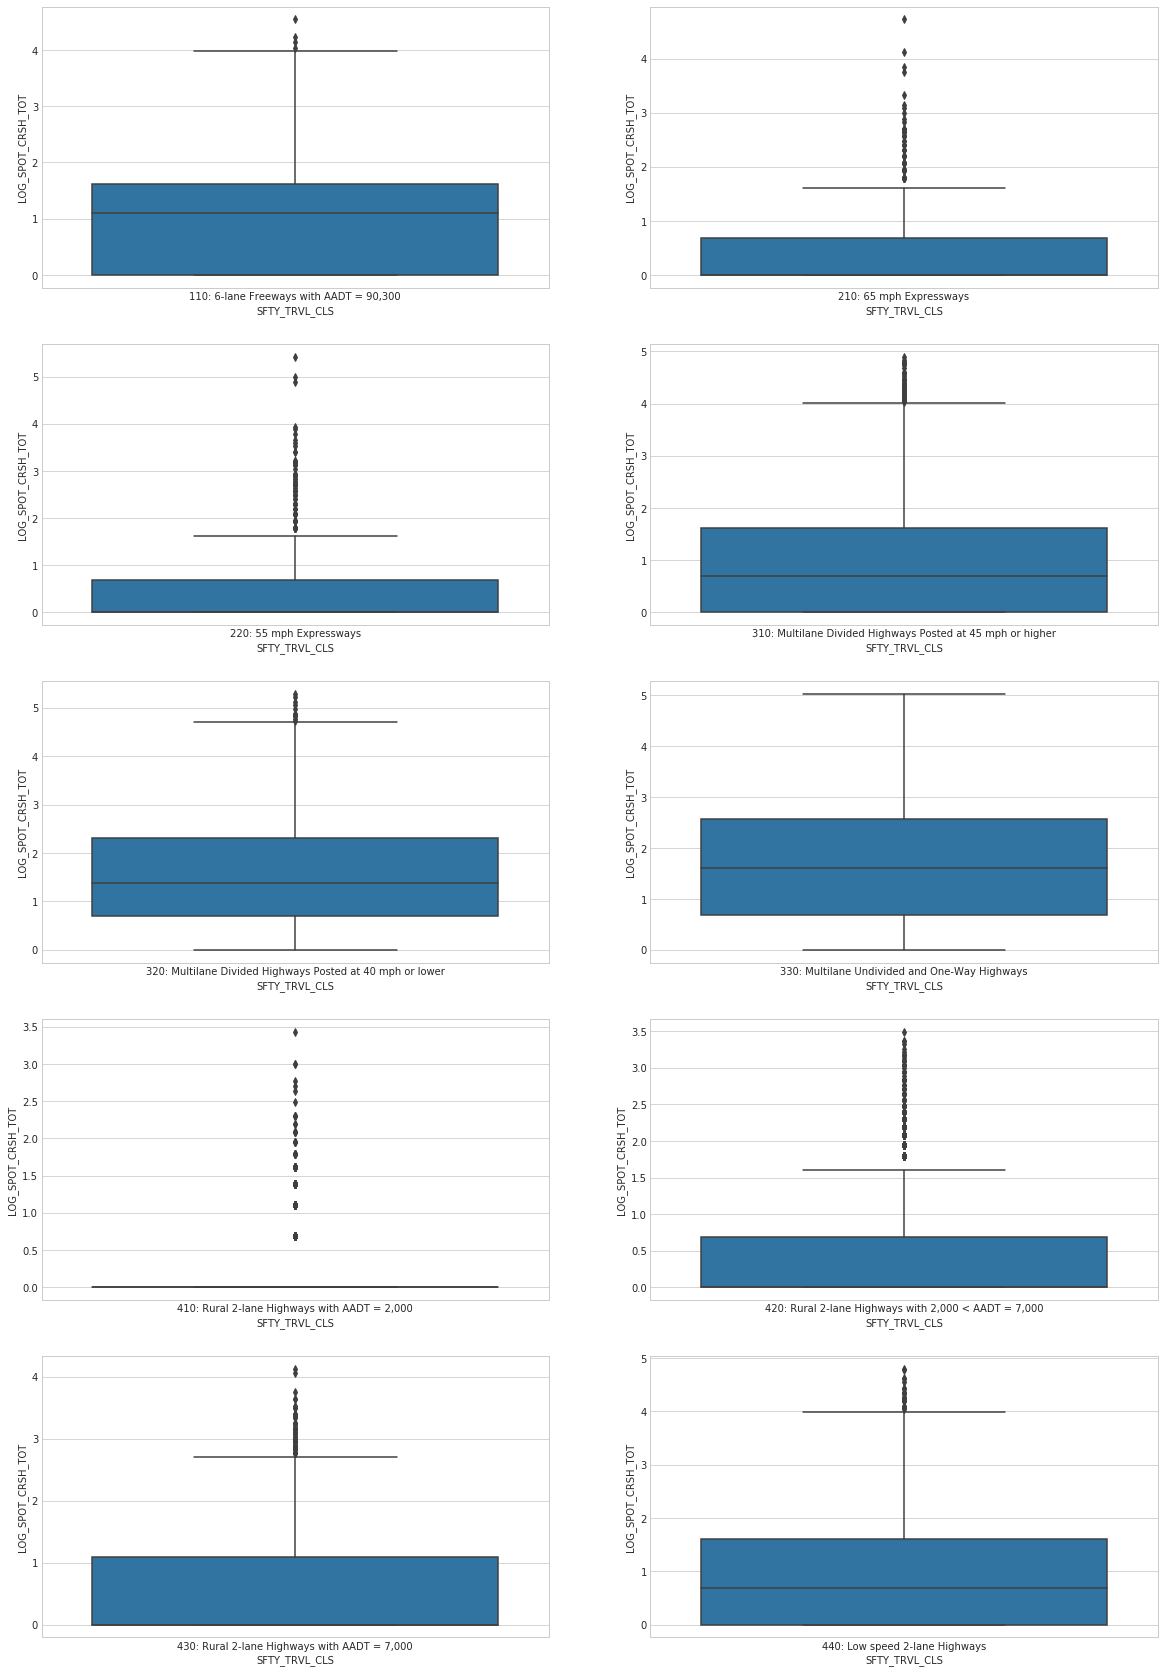

In [89]:
sns.set_style("whitegrid")
f, axes = plt.subplots(5,2, figsize=(20, 30), sharex=False)

sns.boxplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class110, ax=axes[0,0])
sns.boxplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class210, ax=axes[0,1])
sns.boxplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class220, ax=axes[1,0])
sns.boxplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class310, ax=axes[1,1])
sns.boxplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class320, ax=axes[2,0])
sns.boxplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class330, ax=axes[2,1])
sns.boxplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class410, ax=axes[3,0])
sns.boxplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class420, ax=axes[3,1])
sns.boxplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class430, ax=axes[4,0])
sns.boxplot(x="SFTY_TRVL_CLS", y="LOG_SPOT_CRSH_TOT", data=travel_class440, ax=axes[4,1])

# 7. Statistics By Travel Class

### Travel Class 110

In [34]:
travel_class110.describe(percentiles = [.25,.50,.75,.95,.98])

PDP_ID  SPOT_CRSH_TOT  SPOT_ROR_TOT  SPOT_INTS_TOT  \
count   2011.000000    2011.000000   2011.000000    2011.000000   
mean   10518.900547       4.366484      2.476877       0.326206   
std     4171.307051       6.165903      3.515826       1.886586   
min     1734.000000       1.000000      0.000000       0.000000   
25%     8249.000000       1.000000      1.000000       0.000000   
50%     8683.000000       3.000000      2.000000       0.000000   
75%    10962.000000       5.000000      3.000000       0.000000   
95%    19418.000000      14.000000      8.000000       1.500000   
98%    19631.000000      24.000000     12.000000       3.000000   
max    20190.000000      94.000000     85.000000      61.000000   

       SPOT_NONINTS_TOT  SPOT_FATAL_CRSH_TOT  SPOT_INCAP_INJ_CRSH_TOT  \
count       2011.000000          2011.000000              2011.000000   
mean           1.563401             0.009945                 0.071606   
std            3.091045             0.099254                 0.272896   
min            0.000000             0.000000                 0.000000   
25%            0.000000             0.000000                 0.000000   
50%            1.000000             0.000000                 0.000000   
75%            2.000000             0.000000                 0.000000   
95%            6.000000             0.000000                 1.000000   
98%           10.000000             0.000000                 1.000000   
max           47.000000             1.000000                 3.000000   

       SPOT_AK_PPRTN  SPOT_CRSH_RT_FL  SPOT_ROR_FL  SPOT_INTS_FL  \
count    2011.000000      1872.000000  2011.000000   2011.000000   
mean        0.025106         0.307180     0.254534      0.223272   
std         0.119506         1.677138     0.472933      0.709010   
min         0.000000         0.000000     0.000000      0.000000   
25%         0.000000         0.000000     0.000000      0.000000   
50%         0.000000         0.000000     0.000000      0.000000   
75%         0.000000         0.000000     0.000000      0.000000   
95%         0.142857         1.626500     1.169591      1.923077   
98%         0.480000         2.720438     1.226994      2.941176   
max         1.000000        55.649867     1.459677      8.428571   

       SPOT_NONINTS_FL   SPOT_AK_FL  SPOT_FATAL_CRSH_RT_FL  \
count      2011.000000  2011.000000            1872.000000   
mean          0.271089     0.034357               0.092735   
std           0.519569     0.283847               0.923638   
min           0.000000     0.000000               0.000000   
25%           0.000000     0.000000               0.000000   
50%           0.000000     0.000000               0.000000   
75%           0.000000     0.000000               0.000000   
95%           1.403509     0.000000               0.000000   
98%           1.503604     0.000000               0.000000   
max           2.047059     5.000000              13.166667   

       SPOT_INCAP_INJ_CRSH_RT_FL  SPOT_ROR_CRSH_RT_FL  SPOT_INTS_CRSH_RT_FL  \
count                1872.000000          1872.000000           1872.000000   
mean                    0.202146             0.258383              0.299455   
std                     0.806310             1.908208              2.905317   
min                     0.000000             0.000000              0.000000   
25%                     0.000000             0.000000              0.000000   
50%                     0.000000             0.000000              0.000000   
75%                     0.000000             0.000000              0.000000   
95%                     2.230769             1.476434              1.595238   
98%                     2.800000             2.161884              2.943854   
max                     9.088235            72.136882            109.295455   

       SPOT_CRSH_RT  SPOT_ROR_CRSH_RT  SPOT_INTS_CRSH_RT  SPOT_FATAL_CRSH_RT  \
count   1872.000000       1872.000000        1872.000000         1872.000000   
mean     

### Travel Class 210

In [36]:
travel_class210.describe(percentiles = [.25,.50,.75,.95,.98])

PDP_ID  SPOT_CRSH_TOT  SPOT_ROR_TOT  SPOT_INTS_TOT  \
count   2952.000000    2952.000000   2952.000000    2952.000000   
mean    8980.595528       1.712398      0.906504       0.366870   
std     5414.993797       3.073086      0.849222       2.096752   
min      774.000000       1.000000      0.000000       0.000000   
25%     5530.000000       1.000000      0.000000       0.000000   
50%     5885.500000       1.000000      1.000000       0.000000   
75%    12117.000000       2.000000      1.000000       0.000000   
95%    18783.450000       4.000000      2.000000       2.000000   
98%    18882.000000       6.000000      3.000000       4.000000   
max    18901.000000     113.000000      9.000000      67.000000   

       SPOT_NONINTS_TOT  SPOT_FATAL_CRSH_TOT  SPOT_INCAP_INJ_CRSH_TOT  \
count       2952.000000          2952.000000              2952.000000   
mean           0.439024             0.022019                 0.074526   
std            1.222325             0.151317                 0.306710   
min            0.000000             0.000000                 0.000000   
25%            0.000000             0.000000                 0.000000   
50%            0.000000             0.000000                 0.000000   
75%            1.000000             0.000000                 0.000000   
95%            1.000000             0.000000                 1.000000   
98%            2.000000             1.000000                 1.000000   
max           44.000000             2.000000                 4.000000   

       SPOT_AK_PPRTN  SPOT_CRSH_RT_FL  SPOT_ROR_FL  SPOT_INTS_FL  \
count    2952.000000      2915.000000  2952.000000   2952.000000   
mean        0.049905         0.130884     0.118871      0.161001   
std         0.194902         0.553608     0.352639      0.531149   
min         0.000000         0.000000     0.000000      0.000000   
25%         0.000000         0.000000     0.000000      0.000000   
50%         0.000000         0.000000     0.000000      0.000000   
75%         0.000000         0.000000     0.000000      0.000000   
95%         0.500000         1.185319     1.136364      1.600000   
98%         1.000000         1.624542     1.219512      2.000000   
max         1.000000        10.553819     1.438849      3.174603   

       SPOT_NONINTS_FL   SPOT_AK_FL  SPOT_FATAL_CRSH_RT_FL  \
count      2952.000000  2952.000000            2915.000000   
mean          0.355302     0.036106               0.124392   
std           0.628651     0.265216               0.882806   
min           0.000000     0.000000               0.000000   
25%           0.000000     0.000000               0.000000   
50%           0.000000     0.000000               0.000000   
75%           0.000000     0.000000               0.000000   
95%           1.438849     0.000000               0.000000   
98%           1.438849     0.980000               3.433684   
max           2.666667     3.500000              11.470588   

       SPOT_INCAP_INJ_CRSH_RT_FL  SPOT_ROR_CRSH_RT_FL  SPOT_INTS_CRSH_RT_FL  \
count                2915.000000          2915.000000           2915.000000   
mean                    0.207769             0.127938              0.341567   
std                     0.861795             0.425983              1.606564   
min                     0.000000             0.000000              0.000000   
25%                     0.000000             0.000000              0.000000   
50%                     0.000000             0.000000              0.000000   
75%                     0.000000             0.000000              0.000000   
95%                     2.322605             1.210526              1.872881   
98%                     3.203125             1.641975              3.787390   
max                    11.513889             3.954301             34.754717   

       SPOT_CRSH_RT  SPOT_ROR_CRSH_RT  SPOT_INTS_CRSH_RT  SPOT_FATAL_CRSH_RT  \
count   2915.000000       2915.000000        2915.000000         2915.000000   
mean     

### Travel Class 220

In [38]:
travel_class220.describe(percentiles = [.25,.50,.75,.95,.98])

PDP_ID  SPOT_CRSH_TOT  SPOT_ROR_TOT  SPOT_INTS_TOT  \
count    821.000000     821.000000    821.000000     821.000000   
mean    7410.974421       3.388551      0.846529       1.702801   
std     4655.171726      11.435239      1.000404       8.919114   
min     1185.000000       1.000000      0.000000       0.000000   
25%     1933.000000       1.000000      0.000000       0.000000   
50%     7488.000000       1.000000      1.000000       0.000000   
75%    10779.000000       2.000000      1.000000       1.000000   
95%    12683.000000      12.000000      2.000000       8.000000   
98%    18655.600000      22.200000      3.000000      15.000000   
max    19439.000000     226.000000     15.000000     165.000000   

       SPOT_NONINTS_TOT  SPOT_FATAL_CRSH_TOT  SPOT_INCAP_INJ_CRSH_TOT  \
count        821.000000           821.000000               821.000000   
mean           0.839220             0.029233                 0.098660   
std            2.905583             0.175647                 0.361245   
min            0.000000             0.000000                 0.000000   
25%            0.000000             0.000000                 0.000000   
50%            0.000000             0.000000                 0.000000   
75%            1.000000             0.000000                 0.000000   
95%            2.000000             0.000000                 1.000000   
98%            5.000000             1.000000                 1.000000   
max           55.000000             2.000000                 5.000000   

       SPOT_AK_PPRTN  SPOT_CRSH_RT_FL  SPOT_ROR_FL  SPOT_INTS_FL  \
count     821.000000       799.000000   821.000000    821.000000   
mean        0.051626         0.281129     0.701299      0.131531   
std         0.191160         1.048523     0.761383      0.395716   
min         0.000000         0.000000     0.000000      0.000000   
25%         0.000000         0.000000     0.000000      0.000000   
50%         0.000000         0.000000     0.000000      0.000000   
75%         0.000000         0.000000     1.459854      0.000000   
95%         0.500000         1.824027     1.801802      1.265823   
98%         1.000000         3.635896     1.801802      1.445312   
max         1.000000        11.817768     2.247191      1.669565   

       SPOT_NONINTS_FL  SPOT_AK_FL  SPOT_FATAL_CRSH_RT_FL  \
count       821.000000  821.000000             799.000000   
mean          0.424039    0.035841               0.143413   
std           0.694643    0.256200               0.873315   
min           0.000000    0.000000               0.000000   
25%           0.000000    0.000000               0.000000   
50%           0.000000    0.000000               0.000000   
75%           1.470588    0.000000               0.000000   
95%           1.470588    0.000000               0.000000   
98%           1.811630    1.040000               3.956364   
max           2.937500    3.200000               8.681818   

       SPOT_INCAP_INJ_CRSH_RT_FL  SPOT_ROR_CRSH_RT_FL  SPOT_INTS_CRSH_RT_FL  \
count                 799.000000           799.000000            799.000000   
mean                    0.229885             0.153134              0.459374   
std                     0.858274             0.459169              1.808571   
min                     0.000000             0.000000              0.000000   
25%                     0.000000             0.000000              0.000000   
50%                     0.000000             0.000000              0.000000   
75%                     0.000000             0.000000              0.000000   
95%                     2.330909             1.301571              2.717956   
98%                     2.970462             1.816785              6.640940   
max                    11.781818             2.598901             20.371429   

       SPOT_CRSH_RT  SPOT_ROR_CRSH_RT  SPOT_INTS_CRSH_RT  SPOT_FATAL_CRSH_RT  \
count    799.000000        799.000000         799.000000          799.000000   
mean       0.174914 

### Travel Class 310

In [39]:
travel_class310.describe(percentiles = [.25,.50,.75,.95,.98])

PDP_ID  SPOT_CRSH_TOT  SPOT_ROR_TOT  SPOT_INTS_TOT  \
count   3802.000000    3802.000000   3802.000000    3802.000000   
mean    9673.675960       5.911099      0.858759       3.687796   
std     6449.094396      11.685792      1.149580       9.389079   
min       38.000000       1.000000      0.000000       0.000000   
25%     3566.000000       1.000000      0.000000       0.000000   
50%     8950.500000       2.000000      1.000000       0.000000   
75%    15612.000000       5.000000      1.000000       3.000000   
95%    19943.000000      25.950000      3.000000      20.000000   
98%    20053.960000      45.000000      4.000000      35.000000   
max    20249.000000     134.000000     15.000000     117.000000   

       SPOT_NONINTS_TOT  SPOT_FATAL_CRSH_TOT  SPOT_INCAP_INJ_CRSH_TOT  \
count       3802.000000          3802.000000              3802.000000   
mean           1.364545             0.016570                 0.113098   
std            2.660909             0.127671                 0.395771   
min            0.000000             0.000000                 0.000000   
25%            0.000000             0.000000                 0.000000   
50%            1.000000             0.000000                 0.000000   
75%            1.000000             0.000000                 0.000000   
95%            6.000000             0.000000                 1.000000   
98%            9.000000             0.000000                 1.000000   
max           34.000000             1.000000                 4.000000   

       SPOT_AK_PPRTN  SPOT_CRSH_RT_FL  SPOT_ROR_FL  SPOT_INTS_FL  \
count    3802.000000      3642.000000  3802.000000   3802.000000   
mean        0.028013         0.412829     0.683841      0.193786   
std         0.130146         1.046926     0.941172      0.431040   
min         0.000000         0.000000     0.000000      0.000000   
25%         0.000000         0.000000     0.000000      0.000000   
50%         0.000000         0.000000     0.000000      0.000000   
75%         0.000000         0.000000     1.900000      0.000000   
95%         0.125000         2.670101     2.313729      1.192738   
98%         0.500000         4.051098     2.531646      1.277365   
max         1.000000        10.241087     3.448276      1.410072   

       SPOT_NONINTS_FL   SPOT_AK_FL  SPOT_FATAL_CRSH_RT_FL  \
count      3802.000000  3802.000000            3642.000000   
mean          0.451938     0.064553               0.106819   
std           0.734090     0.360450               0.884219   
min           0.000000     0.000000               0.000000   
25%           0.000000     0.000000               0.000000   
50%           0.000000     0.000000               0.000000   
75%           1.400000     0.000000               0.000000   
95%           1.886792     0.000000               0.000000   
98%           2.105263     1.384615               0.000000   
max           2.777778     4.785714              14.371429   

       SPOT_INCAP_INJ_CRSH_RT_FL  SPOT_ROR_CRSH_RT_FL  SPOT_INTS_CRSH_RT_FL  \
count                3642.000000          3642.000000           3642.000000   
mean                    0.232922             0.194718              0.503746   
std                     0.870403             0.560828              1.317931   
min                     0.000000             0.000000              0.000000   
25%                     0.000000             0.000000              0.000000   
50%                     0.000000             0.000000              0.000000   
75%                     0.000000             0.000000              0.000000   
95%                     2.062436             1.477912              3.186766   
98%                     3.091843             1.997512              5.106033   
max                    18.676471             5.830709             14.144802   

       SPOT_CRSH_RT  SPOT_ROR_CRSH_RT  SPOT_INTS_CRSH_RT  SPOT_FATAL_CRSH_RT  \
count   3642.000000       3642.000000        3642.000000         3642.000000   
mean     

### Travel Class 320

In [40]:
travel_class320.describe(percentiles = [.25,.50,.75,.95,.98])

PDP_ID  SPOT_CRSH_TOT  SPOT_ROR_TOT  SPOT_INTS_TOT  \
count   4190.000000    4190.000000   4190.000000    4190.000000   
mean   11618.682816       9.552029      1.160382       6.033413   
std     6513.928128      15.314138      1.733650      11.400889   
min       10.000000       1.000000      0.000000       0.000000   
25%     5964.250000       2.000000      0.000000       0.000000   
50%    11988.000000       4.000000      1.000000       2.000000   
75%    18307.750000      10.000000      2.000000       7.000000   
95%    20021.550000      38.000000      4.000000      27.000000   
98%    20178.000000      56.000000      6.000000      43.000000   
max    20296.000000     197.000000     31.000000     158.000000   

       SPOT_NONINTS_TOT  SPOT_FATAL_CRSH_TOT  SPOT_INCAP_INJ_CRSH_TOT  \
count       4190.000000          4190.000000              4190.000000   
mean           2.358234             0.021241                 0.165632   
std            3.793528             0.152256                 0.469416   
min            0.000000             0.000000                 0.000000   
25%            0.000000             0.000000                 0.000000   
50%            1.000000             0.000000                 0.000000   
75%            3.000000             0.000000                 0.000000   
95%            9.000000             0.000000                 1.000000   
98%           14.000000             0.220000                 2.000000   
max           68.000000             2.000000                 5.000000   

       SPOT_AK_PPRTN  SPOT_CRSH_RT_FL  SPOT_ROR_FL  SPOT_INTS_FL  \
count    4190.000000      4021.000000  4190.000000   4190.000000   
mean        0.025802         0.468028     0.521356      0.230881   
std         0.107467         1.039178     0.862698      0.453251   
min         0.000000         0.000000     0.000000      0.000000   
25%         0.000000         0.000000     0.000000      0.000000   
50%         0.000000         0.000000     0.000000      0.000000   
75%         0.000000         0.000000     1.081081      0.000000   
95%         0.142857         2.587826     2.222222      1.183432   
98%         0.333333         3.434440     2.857143      1.250000   
max         1.000000        15.935596     3.703704      1.395683   

       SPOT_NONINTS_FL   SPOT_AK_FL  SPOT_FATAL_CRSH_RT_FL  \
count      4190.000000  4190.000000            4021.000000   
mean          0.432683     0.071465               0.120910   
std           0.704921     0.391030               0.898664   
min           0.000000     0.000000               0.000000   
25%           0.000000     0.000000               0.000000   
50%           0.000000     0.000000               0.000000   
75%           1.121622     0.000000               0.000000   
95%           1.818182     0.000000               0.000000   
98%           2.020202     1.416667               2.974545   
max           2.808824     6.650000              17.175000   

       SPOT_INCAP_INJ_CRSH_RT_FL  SPOT_ROR_CRSH_RT_FL  SPOT_INTS_CRSH_RT_FL  \
count                4021.000000          4021.000000           4021.000000   
mean                    0.272026             0.252737              0.514739   
std                     0.799655             0.704188              1.167230   
min                     0.000000             0.000000              0.000000   
25%                     0.000000             0.000000              0.000000   
50%                     0.000000             0.000000              0.000000   
75%                     0.000000             0.000000              0.000000   
95%                     2.033333             1.618090              2.864748   
98%                     2.831370             2.250847              4.012274   
max                    10.333333            15.017778             17.597656   

       SPOT_CRSH_RT  SPOT_ROR_CRSH_RT  SPOT_INTS_CRSH_RT  SPOT_FATAL_CRSH_RT  \
count   4021.000000       4021.000000        4021.000000         4021.000000   
mean     

### Travel Class 330

In [41]:
travel_class330.describe(percentiles = [.25,.50,.75,.95,.98])

PDP_ID  SPOT_CRSH_TOT  SPOT_ROR_TOT  SPOT_INTS_TOT  \
count   2052.000000    2052.000000   2052.000000    2052.000000   
mean    9477.919591       9.992203      1.452242       6.286062   
std     5736.210186      12.340012      1.737857       9.459067   
min        4.000000       1.000000      0.000000       0.000000   
25%     4519.000000       2.000000      0.000000       0.000000   
50%     9860.000000       5.000000      1.000000       3.000000   
75%    12943.000000      13.000000      2.000000       8.000000   
95%    19986.000000      35.000000      5.000000      27.000000   
98%    20223.000000      48.000000      6.980000      36.000000   
max    20272.000000     152.000000     15.000000     104.000000   

       SPOT_NONINTS_TOT  SPOT_FATAL_CRSH_TOT  SPOT_INCAP_INJ_CRSH_TOT  \
count       2052.000000          2052.000000              2052.000000   
mean           2.253899             0.019981                 0.176901   
std            3.153223             0.139967                 0.470891   
min            0.000000             0.000000                 0.000000   
25%            0.000000             0.000000                 0.000000   
50%            1.000000             0.000000                 0.000000   
75%            3.000000             0.000000                 0.000000   
95%            8.000000             0.000000                 1.000000   
98%           12.000000             0.000000                 2.000000   
max           37.000000             1.000000                 7.000000   

       SPOT_AK_PPRTN  SPOT_CRSH_RT_FL  SPOT_ROR_FL  SPOT_INTS_FL  \
count    2052.000000      2026.000000  2052.000000   2052.000000   
mean        0.026714         0.468353     0.503560      0.245592   
std         0.099726         0.986681     0.832866      0.467456   
min         0.000000         0.000000     0.000000      0.000000   
25%         0.000000         0.000000     0.000000      0.000000   
50%         0.000000         0.000000     0.000000      0.000000   
75%         0.000000         0.000000     1.176471      0.000000   
95%         0.166667         2.633049     2.000000      1.191781   
98%         0.333333         3.600672     2.531646      1.268404   
max         1.000000         7.544601     4.255319      1.388889   

       SPOT_NONINTS_FL   SPOT_AK_FL  SPOT_FATAL_CRSH_RT_FL  \
count      2052.000000  2052.000000            2026.000000   
mean          0.388336     0.075948               0.121653   
std           0.692956     0.447913               0.871677   
min           0.000000     0.000000               0.000000   
25%           0.000000     0.000000               0.000000   
50%           0.000000     0.000000               0.000000   
75%           1.000000     0.000000               0.000000   
95%           1.837769     0.000000               0.000000   
98%           2.136525     1.444444               1.875000   
max           2.968750     6.650000               9.043478   

       SPOT_INCAP_INJ_CRSH_RT_FL  SPOT_ROR_CRSH_RT_FL  SPOT_INTS_CRSH_RT_FL  \
count                2026.000000          2026.000000           2026.000000   
mean                    0.280747             0.267460              0.502530   
std                     0.790877             0.689368              1.098669   
min                     0.000000             0.000000              0.000000   
25%                     0.000000             0.000000              0.000000   
50%                     0.000000             0.000000              0.000000   
75%                     0.000000             0.000000              0.000000   
95%                     1.926471             1.779180              2.741761   
98%                     2.725564             2.455437              4.101189   
max                     7.923077             5.717201             10.392157   

       SPOT_CRSH_RT  SPOT_ROR_CRSH_RT  SPOT_INTS_CRSH_RT  SPOT_FATAL_CRSH_RT  \
count   2026.000000       2026.000000        2026.000000         2026.000000   
mean     

### Travel Class 410

In [42]:
travel_class410.describe(percentiles = [.25,.50,.75,.95,.98])

PDP_ID  SPOT_CRSH_TOT  SPOT_ROR_TOT  SPOT_INTS_TOT  \
count   4666.000000    4666.000000   4666.000000    4666.000000   
mean   12890.894128       1.316331      0.795114       0.300471   
std     5292.755644       1.037465      0.686437       0.865776   
min      364.000000       1.000000      0.000000       0.000000   
25%     9605.250000       1.000000      0.000000       0.000000   
50%    14079.000000       1.000000      1.000000       0.000000   
75%    17341.000000       1.000000      1.000000       0.000000   
95%    19402.750000       3.000000      2.000000       2.000000   
98%    19843.000000       4.000000      2.000000       3.000000   
max    20247.000000      31.000000      9.000000      15.000000   

       SPOT_NONINTS_TOT  SPOT_FATAL_CRSH_TOT  SPOT_INCAP_INJ_CRSH_TOT  \
count       4666.000000          4666.000000              4666.000000   
mean           0.220746             0.020146                 0.087441   
std            0.525580             0.145018                 0.294401   
min            0.000000             0.000000                 0.000000   
25%            0.000000             0.000000                 0.000000   
50%            0.000000             0.000000                 0.000000   
75%            0.000000             0.000000                 0.000000   
95%            1.000000             0.000000                 1.000000   
98%            1.000000             0.000000                 1.000000   
max           18.000000             2.000000                 2.000000   

       SPOT_AK_PPRTN  SPOT_CRSH_RT_FL  SPOT_ROR_FL  SPOT_INTS_FL  \
count    4666.000000      4585.000000  4666.000000   4666.000000   
mean        0.081886         0.111035     0.081572      0.272498   
std         0.259287         0.428714     0.283597      0.625559   
min         0.000000         0.000000     0.000000      0.000000   
25%         0.000000         0.000000     0.000000      0.000000   
50%         0.000000         0.000000     0.000000      0.000000   
75%         0.000000         0.000000     0.000000      0.000000   
95%         1.000000         1.149617     1.052632      1.538462   
98%         1.000000         1.502045     1.052632      1.904762   
max         1.000000         7.206897     1.307190      2.857143   

       SPOT_NONINTS_FL   SPOT_AK_FL  SPOT_FATAL_CRSH_RT_FL  \
count      4666.000000  4666.000000            4585.000000   
mean          0.339169     0.034077               0.120851   
std           0.702586     0.280145               0.888338   
min           0.000000     0.000000               0.000000   
25%           0.000000     0.000000               0.000000   
50%           0.000000     0.000000               0.000000   
75%           0.000000     0.000000               0.000000   
95%           1.851852     0.000000               0.000000   
98%           1.851852     0.000000               0.000000   
max           2.468085     3.636364              15.196078   

       SPOT_INCAP_INJ_CRSH_RT_FL  SPOT_ROR_CRSH_RT_FL  SPOT_INTS_CRSH_RT_FL  \
count                4585.000000          4585.000000           4585.000000   
mean                    0.217175             0.121839              0.285881   
std                     0.785988             0.446267              0.908754   
min                     0.000000             0.000000              0.000000   
25%                     0.000000             0.000000              0.000000   
50%                     0.000000             0.000000              0.000000   
75%                     0.000000             0.000000              0.000000   
95%                     2.066116             1.185441              1.957386   
98%                     2.957035             1.680054              3.144628   
max                     8.553846             6.837023             17.422745   

       SPOT_CRSH_RT  SPOT_ROR_CRSH_RT  SPOT_INTS_CRSH_RT  SPOT_FATAL_CRSH_RT  \
count   4585.000000       4585.000000        4585.000000         4585.000000   
mean     

### Travel Class 420

In [43]:
travel_class420.describe(percentiles = [.25,.50,.75,.95,.98])

PDP_ID  SPOT_CRSH_TOT  SPOT_ROR_TOT  SPOT_INTS_TOT  \
count  14996.000000   14996.000000  14996.000000   14996.000000   
mean    9487.444519       1.636236      0.761470       0.537277   
std     5822.523483       1.626241      0.758448       1.532926   
min       42.000000       1.000000      0.000000       0.000000   
25%     4137.000000       1.000000      0.000000       0.000000   
50%    10167.000000       1.000000      1.000000       0.000000   
75%    14425.250000       2.000000      1.000000       0.000000   
95%    18352.000000       4.000000      2.000000       3.000000   
98%    19547.000000       6.000000      3.000000       5.000000   
max    20288.000000      33.000000     19.000000      31.000000   

       SPOT_NONINTS_TOT  SPOT_FATAL_CRSH_TOT  SPOT_INCAP_INJ_CRSH_TOT  \
count      14996.000000         14996.000000             14996.000000   
mean           0.337490             0.027807                 0.098760   
std            0.556448             0.166442                 0.320338   
min            0.000000             0.000000                 0.000000   
25%            0.000000             0.000000                 0.000000   
50%            0.000000             0.000000                 0.000000   
75%            1.000000             0.000000                 0.000000   
95%            1.000000             0.000000                 1.000000   
98%            2.000000             1.000000                 1.000000   
max           13.000000             2.000000                 6.000000   

       SPOT_AK_PPRTN  SPOT_CRSH_RT_FL   SPOT_ROR_FL  SPOT_INTS_FL  \
count   14996.000000     14992.000000  14996.000000  14996.000000   
mean        0.080884         0.160198      0.530482      0.268180   
std         0.248199         0.591049      0.536939      0.560318   
min         0.000000         0.000000      0.000000      0.000000   
25%         0.000000         0.000000      0.000000      0.000000   
50%         0.000000         0.000000      0.000000      0.000000   
75%         0.000000         0.000000      1.036269      0.000000   
95%         1.000000         1.336866      1.219512      1.515152   
98%         1.000000         1.977233      1.219512      1.767677   
max         1.000000        12.493771      1.573913      2.380952   

       SPOT_NONINTS_FL    SPOT_AK_FL  SPOT_FATAL_CRSH_RT_FL  \
count     14996.000000  14996.000000           14992.000000   
mean          0.402073      0.034857               0.140647   
std           0.685538      0.261944               0.859364   
min           0.000000      0.000000               0.000000   
25%           0.000000      0.000000               0.000000   
50%           0.000000      0.000000               0.000000   
75%           1.020408      0.000000               0.000000   
95%           1.639344      0.000000               0.000000   
98%           1.639344      1.025641               4.354212   
max           2.439024      3.773585              14.520000   

       SPOT_INCAP_INJ_CRSH_RT_FL  SPOT_ROR_CRSH_RT_FL  SPOT_INTS_CRSH_RT_FL  \
count               14992.000000         14992.000000          14992.000000   
mean                    0.235114             0.120668              0.335573   
std                     0.775791             0.447194              1.155155   
min                     0.000000             0.000000              0.000000   
25%                     0.000000             0.000000              0.000000   
50%                     0.000000             0.000000              0.000000   
75%                     0.000000             0.000000              0.000000   
95%                     2.308333             1.270751              2.173494   
98%                     2.913669             1.656584              3.547360   
max                    12.223214            11.166667             27.417989   

       SPOT_CRSH_RT  SPOT_ROR_CRSH_RT  SPOT_INTS_CRSH_RT  SPOT_FATAL_CRSH_RT  \
count  14992.000000      14992.000000       14992.000000        149

### Travel Class 430

In [44]:
travel_class430.describe(percentiles = [.25,.50,.75,.95,.98])

PDP_ID  SPOT_CRSH_TOT  SPOT_ROR_TOT  SPOT_INTS_TOT  \
count   3882.000000    3882.000000   3882.000000    3882.000000   
mean    8060.297012       2.611798      0.863472       1.129315   
std     5855.188435       3.639868      0.932347       3.113381   
min       94.000000       1.000000      0.000000       0.000000   
25%     2744.000000       1.000000      0.000000       0.000000   
50%     6768.500000       1.000000      1.000000       0.000000   
75%    12510.000000       3.000000      1.000000       1.000000   
95%    19183.000000       8.000000      3.000000       6.000000   
98%    19305.380000      14.000000      3.000000      12.000000   
max    20212.000000      62.000000     15.000000      44.000000   

       SPOT_NONINTS_TOT  SPOT_FATAL_CRSH_TOT  SPOT_INCAP_INJ_CRSH_TOT  \
count       3882.000000          3882.000000              3882.000000   
mean           0.619011             0.037352                 0.132406   
std            0.948767             0.192345                 0.409229   
min            0.000000             0.000000                 0.000000   
25%            0.000000             0.000000                 0.000000   
50%            0.000000             0.000000                 0.000000   
75%            1.000000             0.000000                 0.000000   
95%            2.000000             0.000000                 1.000000   
98%            3.000000             1.000000                 1.000000   
max           11.000000             2.000000                 7.000000   

       SPOT_AK_PPRTN  SPOT_CRSH_RT_FL  SPOT_ROR_FL  SPOT_INTS_FL  \
count    3882.000000      3881.000000  3882.000000   3882.000000   
mean        0.074992         0.279775     0.540634      0.238070   
std         0.223078         0.891964     0.649741      0.506663   
min         0.000000         0.000000     0.000000      0.000000   
25%         0.000000         0.000000     0.000000      0.000000   
50%         0.000000         0.000000     0.000000      0.000000   
75%         0.000000         0.000000     1.250000      0.000000   
95%         0.500000         1.955963     1.503759      1.388889   
98%         1.000000         3.181989     1.666667      1.574803   
max         1.000000        13.540193     2.020202      1.838095   

       SPOT_NONINTS_FL   SPOT_AK_FL  SPOT_FATAL_CRSH_RT_FL  \
count      3882.000000  3882.000000            3881.000000   
mean          0.390632     0.047364               0.160847   
std           0.681424     0.311469               0.836509   
min           0.000000     0.000000               0.000000   
25%           0.000000     0.000000               0.000000   
50%           0.000000     0.000000               0.000000   
75%           1.102083     0.000000               0.000000   
95%           1.515152     0.000000               0.000000   
98%           1.851852     1.142857               4.289947   
max           2.739726     4.878049              10.064516   

       SPOT_INCAP_INJ_CRSH_RT_FL  SPOT_ROR_CRSH_RT_FL  SPOT_INTS_CRSH_RT_FL  \
count                3881.000000          3881.000000           3881.000000   
mean                    0.263329             0.196078              0.421888   
std                     0.830085             0.531374              1.370821   
min                     0.000000             0.000000              0.000000   
25%                     0.000000             0.000000              0.000000   
50%                     0.000000             0.000000              0.000000   
75%                     0.000000             0.000000              0.000000   
95%                     2.089552             1.293878              2.943107   
98%                     2.257143             1.811715              5.158149   
max                    14.378788             7.369369             23.733533   

       SPOT_CRSH_RT  SPOT_ROR_CRSH_RT  SPOT_INTS_CRSH_RT  SPOT_FATAL_CRSH_RT  \
count   3881.000000       3881.000000        3881.000000         3881.000000   
mean     

### Travel Class 440

In [45]:
travel_class440.describe(percentiles = [.25,.50,.75,.95,.98])

PDP_ID  SPOT_CRSH_TOT  SPOT_ROR_TOT  SPOT_INTS_TOT  \
count   4648.000000    4648.000000   4648.000000    4648.000000   
mean   10234.837995       4.658778      0.811532       2.627151   
std     5712.444033       8.145186      1.204941       5.981912   
min       69.000000       1.000000      0.000000       0.000000   
25%     5243.000000       1.000000      0.000000       0.000000   
50%    10472.500000       2.000000      1.000000       1.000000   
75%    15314.000000       5.000000      1.000000       3.000000   
95%    19031.000000      17.000000      3.000000      11.000000   
98%    19715.000000      30.000000      4.000000      20.000000   
max    20295.000000     121.000000     17.000000      86.000000   

       SPOT_NONINTS_TOT  SPOT_FATAL_CRSH_TOT  SPOT_INCAP_INJ_CRSH_TOT  \
count       4648.000000          4648.000000              4648.000000   
mean           1.220095             0.013339                 0.093804   
std            2.130044             0.125484                 0.327067   
min            0.000000             0.000000                 0.000000   
25%            0.000000             0.000000                 0.000000   
50%            1.000000             0.000000                 0.000000   
75%            1.000000             0.000000                 0.000000   
95%            5.000000             0.000000                 1.000000   
98%            8.000000             0.000000                 1.000000   
max           31.000000             4.000000                 4.000000   

       SPOT_AK_PPRTN  SPOT_CRSH_RT_FL  SPOT_ROR_FL  SPOT_INTS_FL  \
count    4648.000000      4614.000000  4648.000000   4648.000000   
mean        0.032926         0.320806     0.490452      0.188281   
std         0.143391         0.911243     0.778741      0.428571   
min         0.000000         0.000000     0.000000      0.000000   
25%         0.000000         0.000000     0.000000      0.000000   
50%         0.000000         0.000000     0.000000      0.000000   
75%         0.000000         0.000000     1.136364      0.000000   
95%         0.200000         1.984134     1.801802      1.182432   
98%         0.500000         3.154134     2.272727      1.276488   
max         1.000000        11.719751     3.030303      1.483871   

       SPOT_NONINTS_FL   SPOT_AK_FL  SPOT_FATAL_CRSH_RT_FL  \
count      4648.000000  4648.000000            4614.000000   
mean          0.365413     0.052009               0.093631   
std           0.633812     0.369825               0.923787   
min           0.000000     0.000000               0.000000   
25%           0.000000     0.000000               0.000000   
50%           0.000000     0.000000               0.000000   
75%           1.000000     0.000000               0.000000   
95%           1.562500     0.000000               0.000000   
98%           1.739130     1.084333               0.000000   
max           2.409639     6.045455              22.346667   

       SPOT_INCAP_INJ_CRSH_RT_FL  SPOT_ROR_CRSH_RT_FL  SPOT_INTS_CRSH_RT_FL  \
count                4614.000000          4614.000000           4614.000000   
mean                    0.217526             0.224912              0.385134   
std                     0.808702             0.631324              1.132119   
min                     0.000000             0.000000              0.000000   
25%                     0.000000             0.000000              0.000000   
50%                     0.000000             0.000000              0.000000   
75%                     0.000000             0.000000              0.000000   
95%                     2.028169             1.605959              2.298177   
98%                     3.061720             2.156011              3.858218   
max                    10.556962             9.083333             17.042618   

       SPOT_CRSH_RT  SPOT_ROR_CRSH_RT  SPOT_INTS_CRSH_RT  SPOT_FATAL_CRSH_RT  \
count   4614.000000       4614.000000        4614.000000         4614.000000   
mean     

## 7.1 Kolmogorov-Smirnov test & Shapiro-Wilk test and QQ plots.
#### These tests show us that the data is not normally distributed. By taking the log of the data, we can get to a more "normal" distribution. See the Log Normal plots below.

In [15]:
import statsmodels.api as sm
x = mydata['SPOT_CRSH_TOT']
sm.stats.lilliefors(x)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(0.3650180801670993, 0.0)

In [16]:
W, p = ss.shapiro(x)
print("Shapiro-Wilk test statistic, W:", W, "\n", "p-value:", p)

Shapiro-Wilk test statistic, W: 0.350955069065094 
 p-value: 0.0


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Log Normal Plot of Spot Crash Total

Text(0.5,1,'Log Normal Q-Q plot')

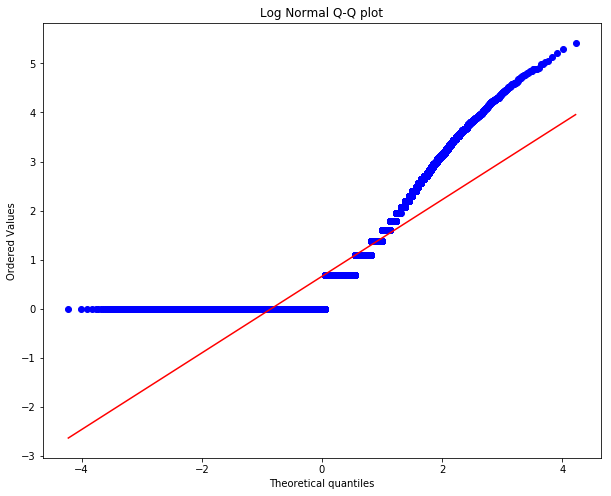

In [18]:
ss.probplot(log(x), dist="norm", plot=plt)
plt.title("Log Normal Q-Q plot")

#### Log Normal Plot of Spot KAB Crash Total

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/function_base.py:2923: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


Text(0.5,1,'Log Normal Q-Q plot')

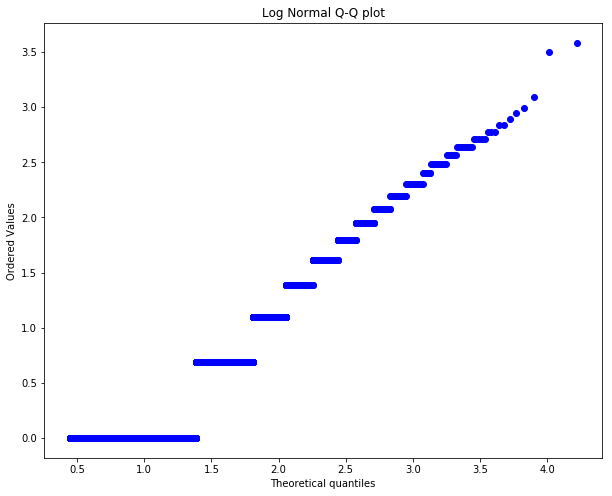

In [20]:
ss.probplot(log(mydata["SPOT_KAB_CRSH_TOT"]), dist="norm", plot=plt)
plt.title("Log Normal Q-Q plot")

## 7.2 Bootstrap Plot

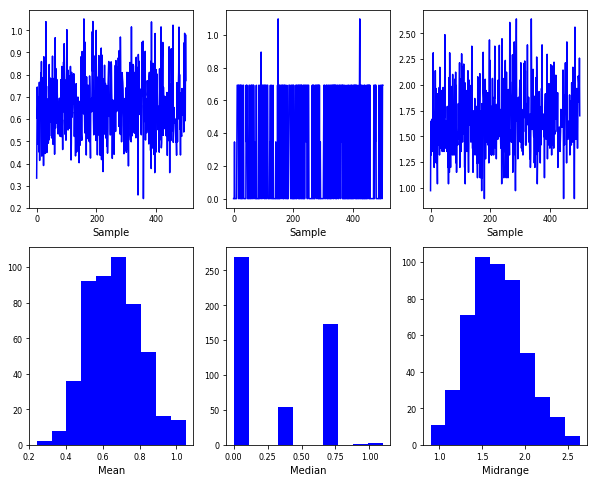

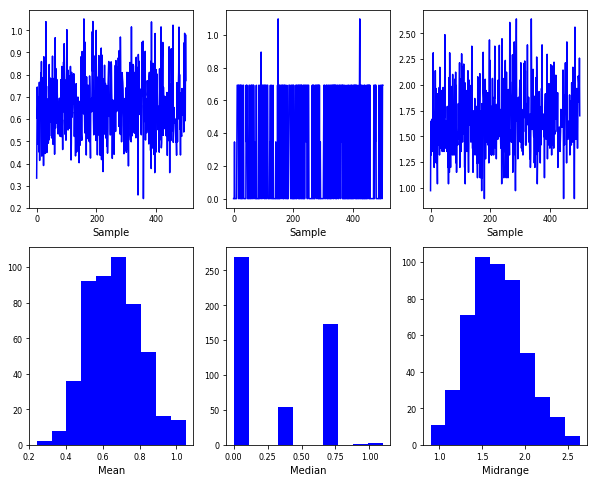

In [21]:
from pandas.plotting import bootstrap_plot
btspdata = log(mydata['SPOT_CRSH_TOT'])
bootstrap_plot(btspdata, size=40, samples=500, color='blue')

In [54]:
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 5)

Populating the interactive namespace from numpy and matplotlib


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


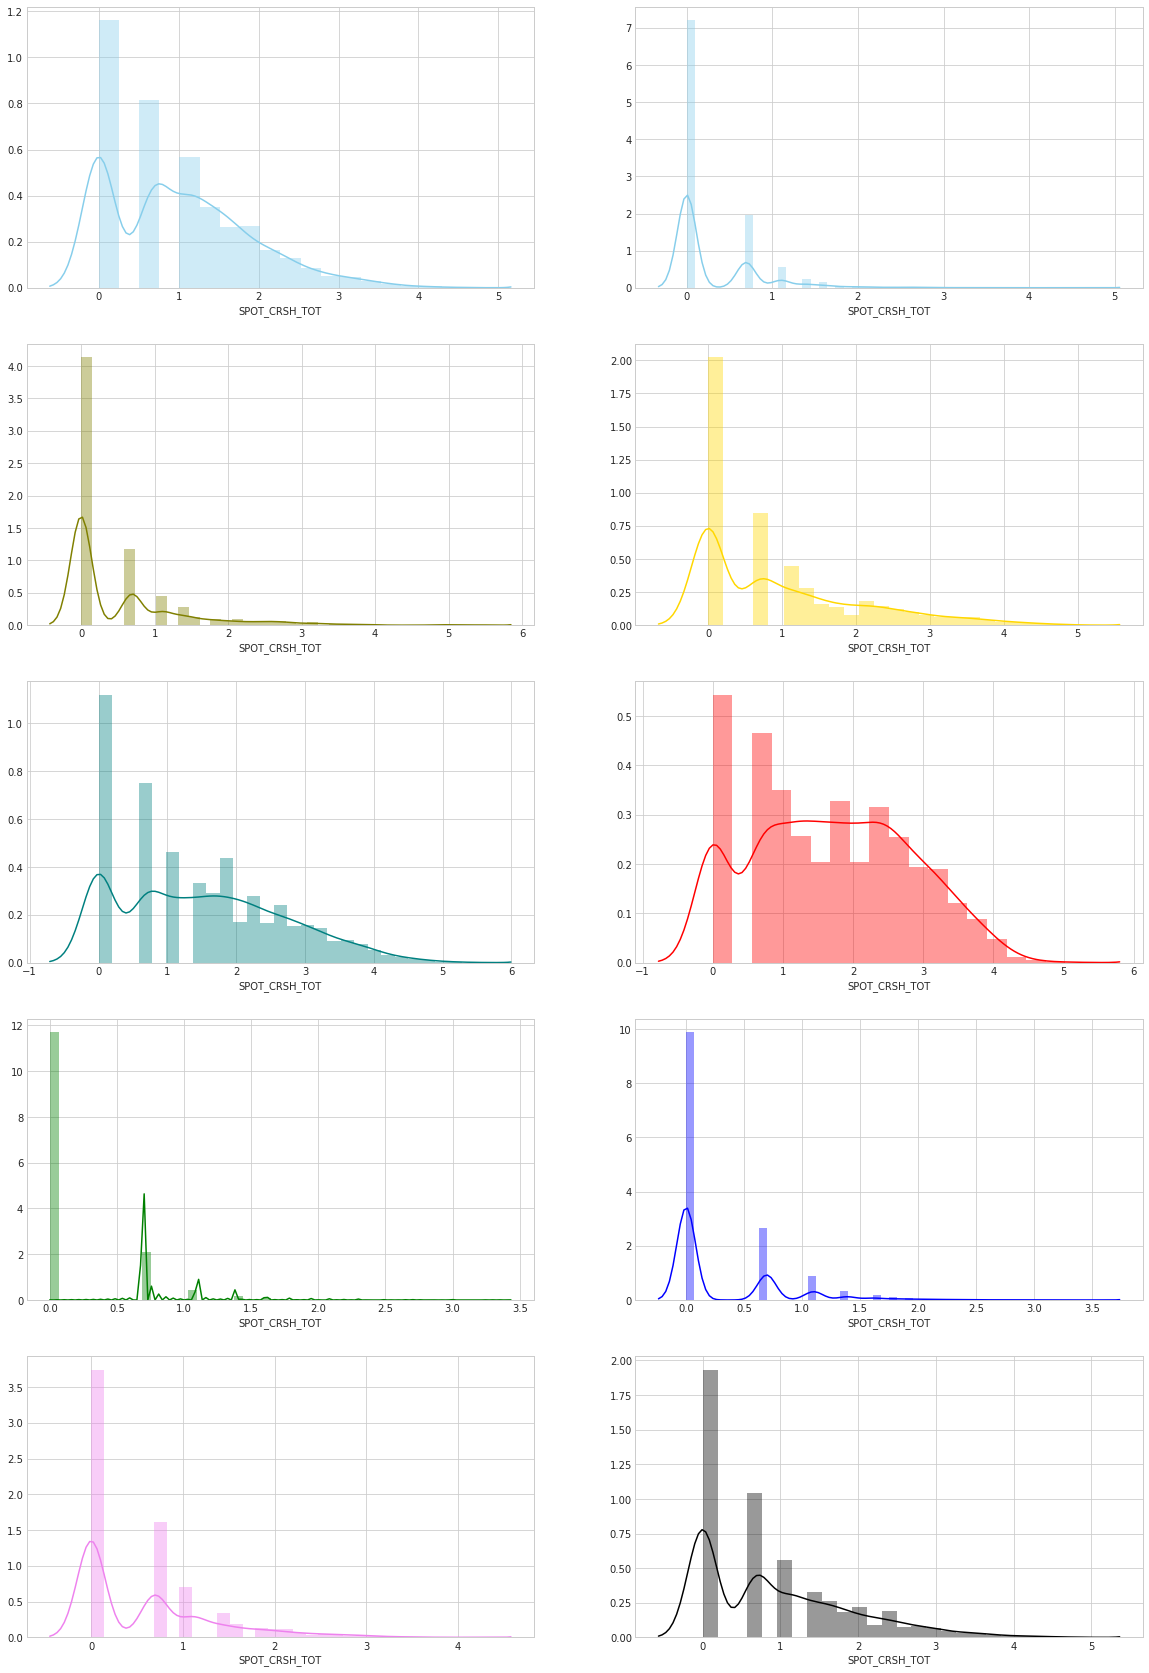

In [25]:
# Hist/PDF plot
f, axes = plt.subplots(5,2, figsize=(20, 30), sharex=False)
sns.distplot(log(travel_class110["SPOT_CRSH_TOT"]) , color="skyblue", ax=axes[0, 0])
sns.distplot(log(travel_class210["SPOT_CRSH_TOT"]) , color="skyblue", ax=axes[0, 1])
sns.distplot(log(travel_class220["SPOT_CRSH_TOT"]) , color="olive", ax=axes[1, 0])
sns.distplot(log(travel_class310["SPOT_CRSH_TOT"]) , color="gold", ax=axes[1, 1])
sns.distplot(log(travel_class320["SPOT_CRSH_TOT"]) , color="teal", ax=axes[2, 0])
sns.distplot(log(travel_class330["SPOT_CRSH_TOT"]) , color="red", ax=axes[2, 1])
sns.distplot(log(travel_class410["SPOT_CRSH_TOT"]) , color="green", ax=axes[3, 0])
sns.distplot(log(travel_class420["SPOT_CRSH_TOT"]) , color="blue", ax=axes[3, 1])
sns.distplot(log(travel_class430["SPOT_CRSH_TOT"]) , color="violet", ax=axes[4, 0])
sns.distplot(log(travel_class440["SPOT_CRSH_TOT"]) , color="black", ax=axes[4, 1])

## 7.3 Histograms by Class

Text(0.5,1,'Log Histogram')

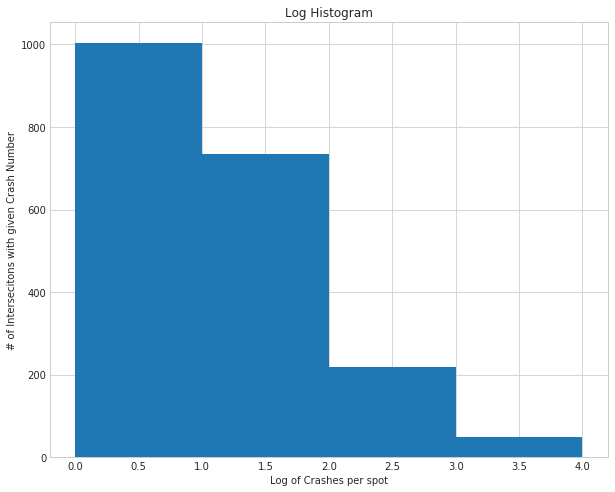

In [32]:
plt.hist(log(travel_class110['SPOT_CRSH_TOT']), bins=np.arange(0,5))
plt.ylabel("# of Intersecitons with given Crash Number")
plt.xlabel("Log of Crashes per spot")
plt.title("Log Histogram")

Text(0.5,1,'Log Histogram')

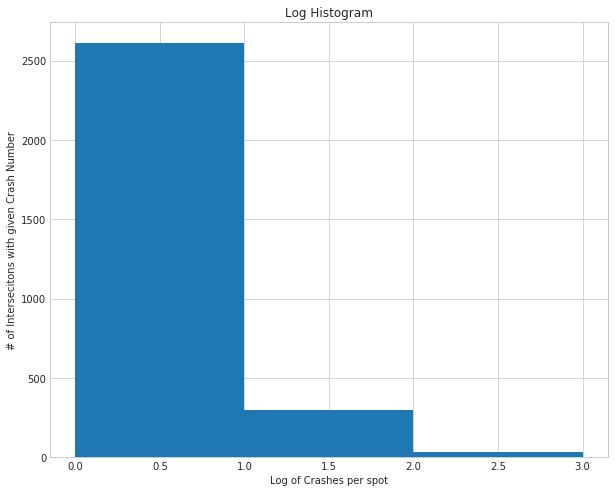

In [36]:
plt.hist(log(travel_class210['SPOT_CRSH_TOT']), bins=np.arange(0,4))
plt.ylabel("# of Intersecitons with given Crash Number")
plt.xlabel("Log of Crashes per spot")
plt.title("Log Histogram")

Text(0.5,1,'Log Histogram')

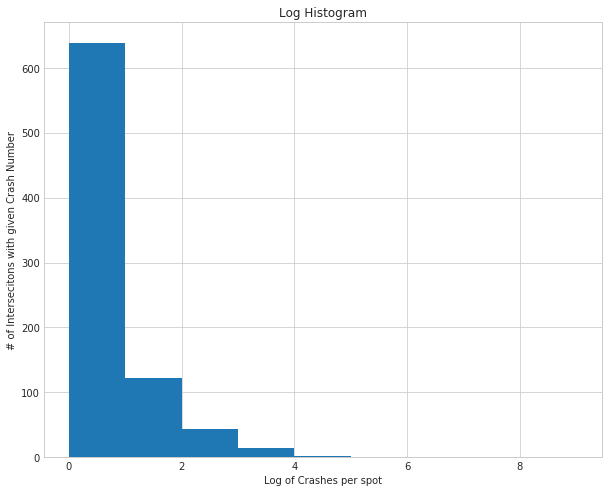

In [39]:
plt.hist(log(travel_class220['SPOT_CRSH_TOT']), bins=np.arange(0,10))
plt.ylabel("# of Intersecitons with given Crash Number")
plt.xlabel("Log of Crashes per spot")
plt.title("Log Histogram")

Text(0.5,1,'Log Histogram')

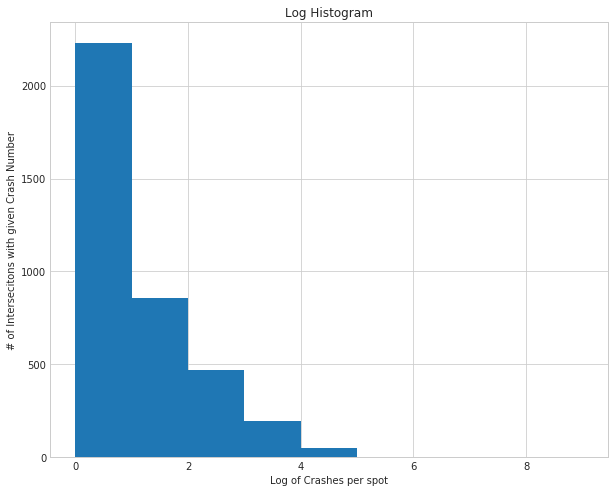

In [41]:
plt.hist(log(travel_class310['SPOT_CRSH_TOT']), bins=np.arange(0,10))
plt.ylabel("# of Intersecitons with given Crash Number")
plt.xlabel("Log of Crashes per spot")
plt.title("Log Histogram")

Text(0.5,1,'Log Histogram')

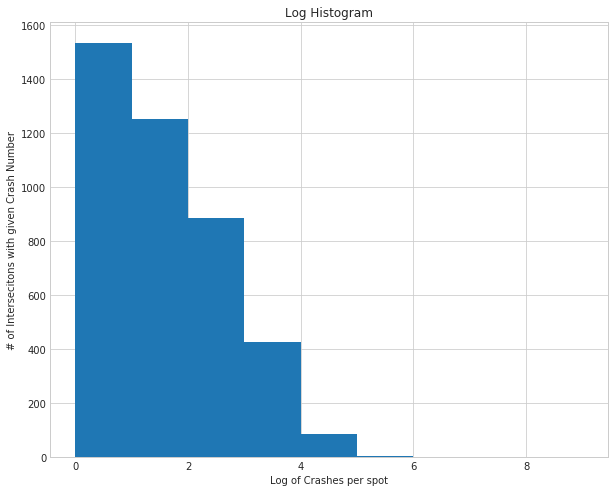

In [43]:
plt.hist(log(travel_class320['SPOT_CRSH_TOT']), bins=np.arange(0,10))
plt.ylabel("# of Intersecitons with given Crash Number")
plt.xlabel("Log of Crashes per spot")
plt.title("Log Histogram")

Text(0.5,1,'Log Histogram')

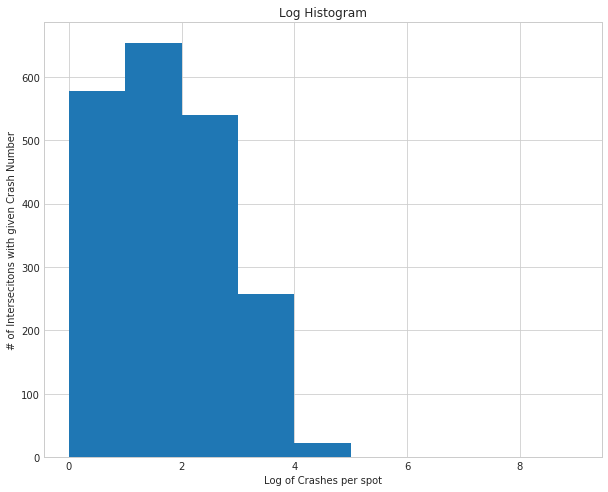

In [44]:
plt.hist(log(travel_class330['SPOT_CRSH_TOT']), bins=np.arange(0,10))
plt.ylabel("# of Intersecitons with given Crash Number")
plt.xlabel("Log of Crashes per spot")
plt.title("Log Histogram")

Text(0.5,1,'Log Histogram')

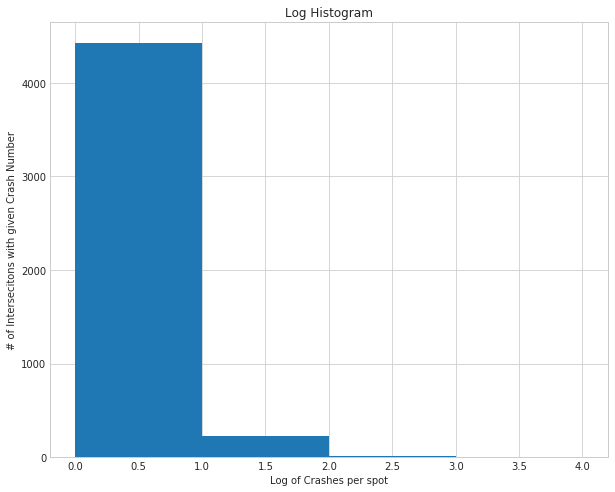

In [46]:
plt.hist(log(travel_class410['SPOT_CRSH_TOT']), bins=np.arange(0,5))
plt.ylabel("# of Intersecitons with given Crash Number")
plt.xlabel("Log of Crashes per spot")
plt.title("Log Histogram")

Text(0.5,1,'Log Histogram')

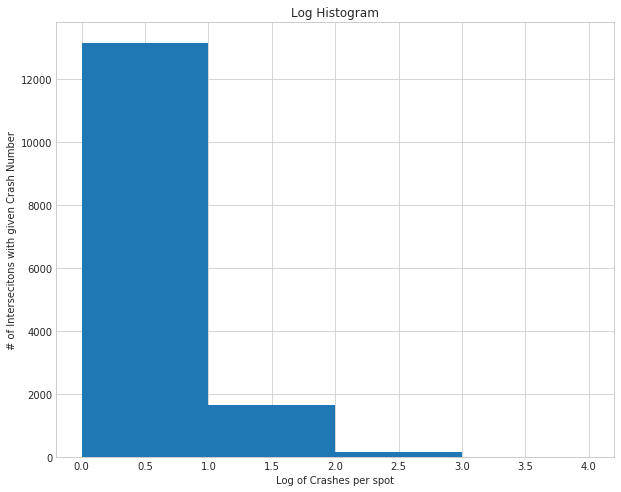

In [49]:
plt.hist(log(travel_class420['SPOT_CRSH_TOT']), bins=np.arange(0,5))
plt.ylabel("# of Intersecitons with given Crash Number")
plt.xlabel("Log of Crashes per spot")
plt.title("Log Histogram")

Text(0.5,1,'Log Histogram')

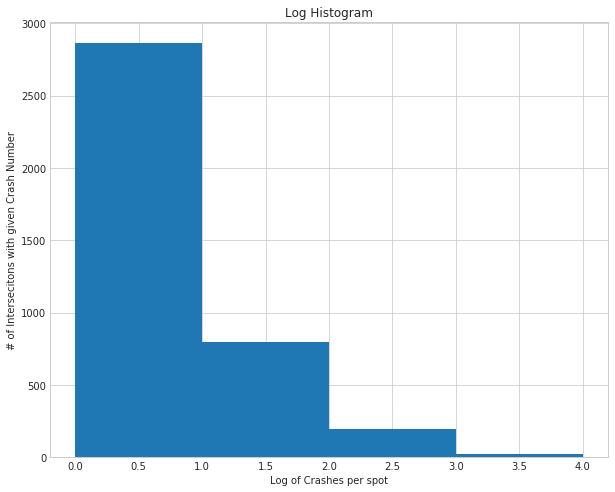

In [52]:
plt.hist(log(travel_class430['SPOT_CRSH_TOT']), bins=np.arange(0,5))
plt.ylabel("# of Intersecitons with given Crash Number")
plt.xlabel("Log of Crashes per spot")
plt.title("Log Histogram")

Text(0.5,1,'Log Histogram')

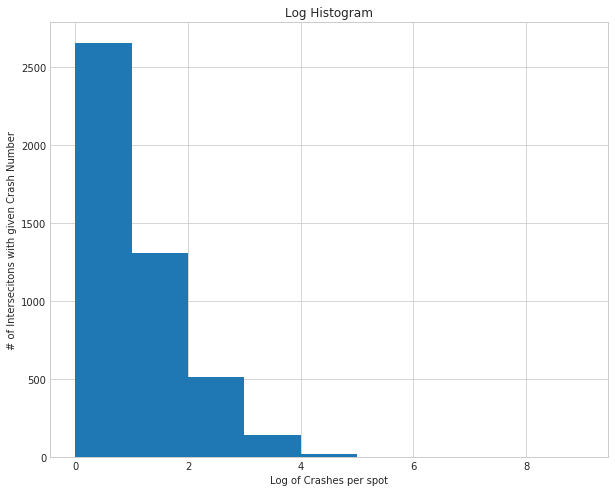

In [53]:
plt.hist(log(travel_class440['SPOT_CRSH_TOT']), bins=np.arange(0,10))
plt.ylabel("# of Intersecitons with given Crash Number")
plt.xlabel("Log of Crashes per spot")
plt.title("Log Histogram")

## 7.4 Plots of KAB crash totals vs. Crash totals by Travel Class

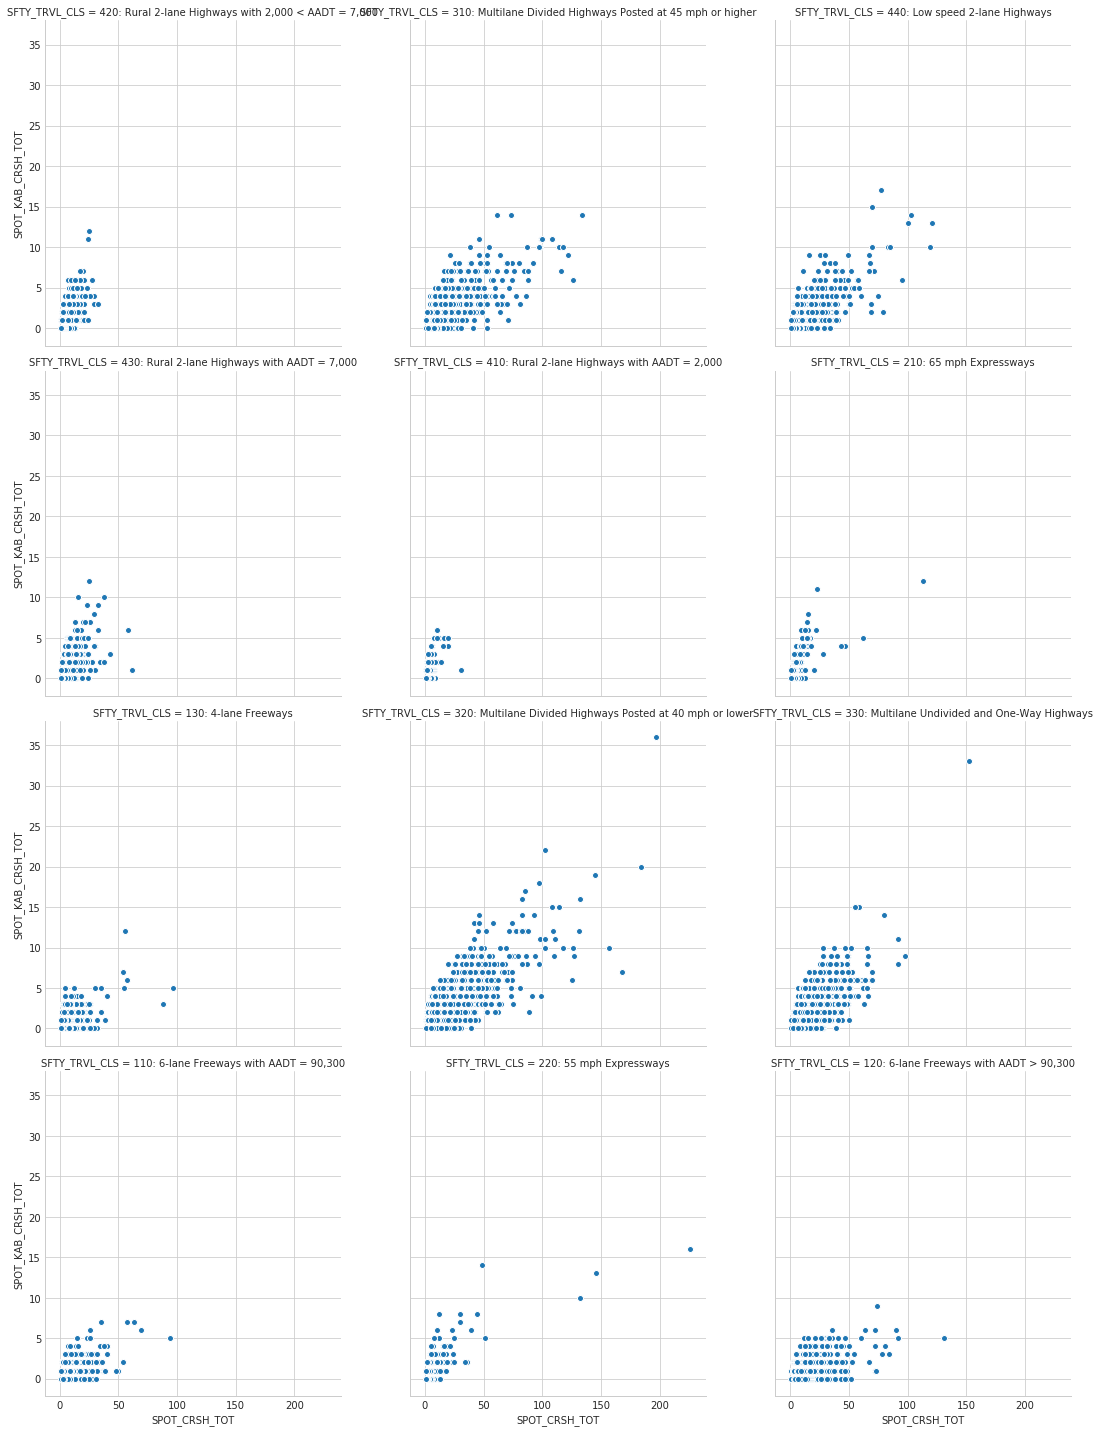

In [55]:
g = sns.FacetGrid(mydata, col="SFTY_TRVL_CLS", size=5, col_wrap=3)
g = (g.map(plt.scatter, "SPOT_CRSH_TOT", "SPOT_KAB_CRSH_TOT", edgecolor = "w")
    .add_legend())

In [62]:
#log of data then plot again
#l_spotkab = log(mydata['SPOT_KAB_CRSH_TOT'])
mydata['LOG_CRSH_TOT'] = log(mydata['SPOT_CRSH_TOT'])

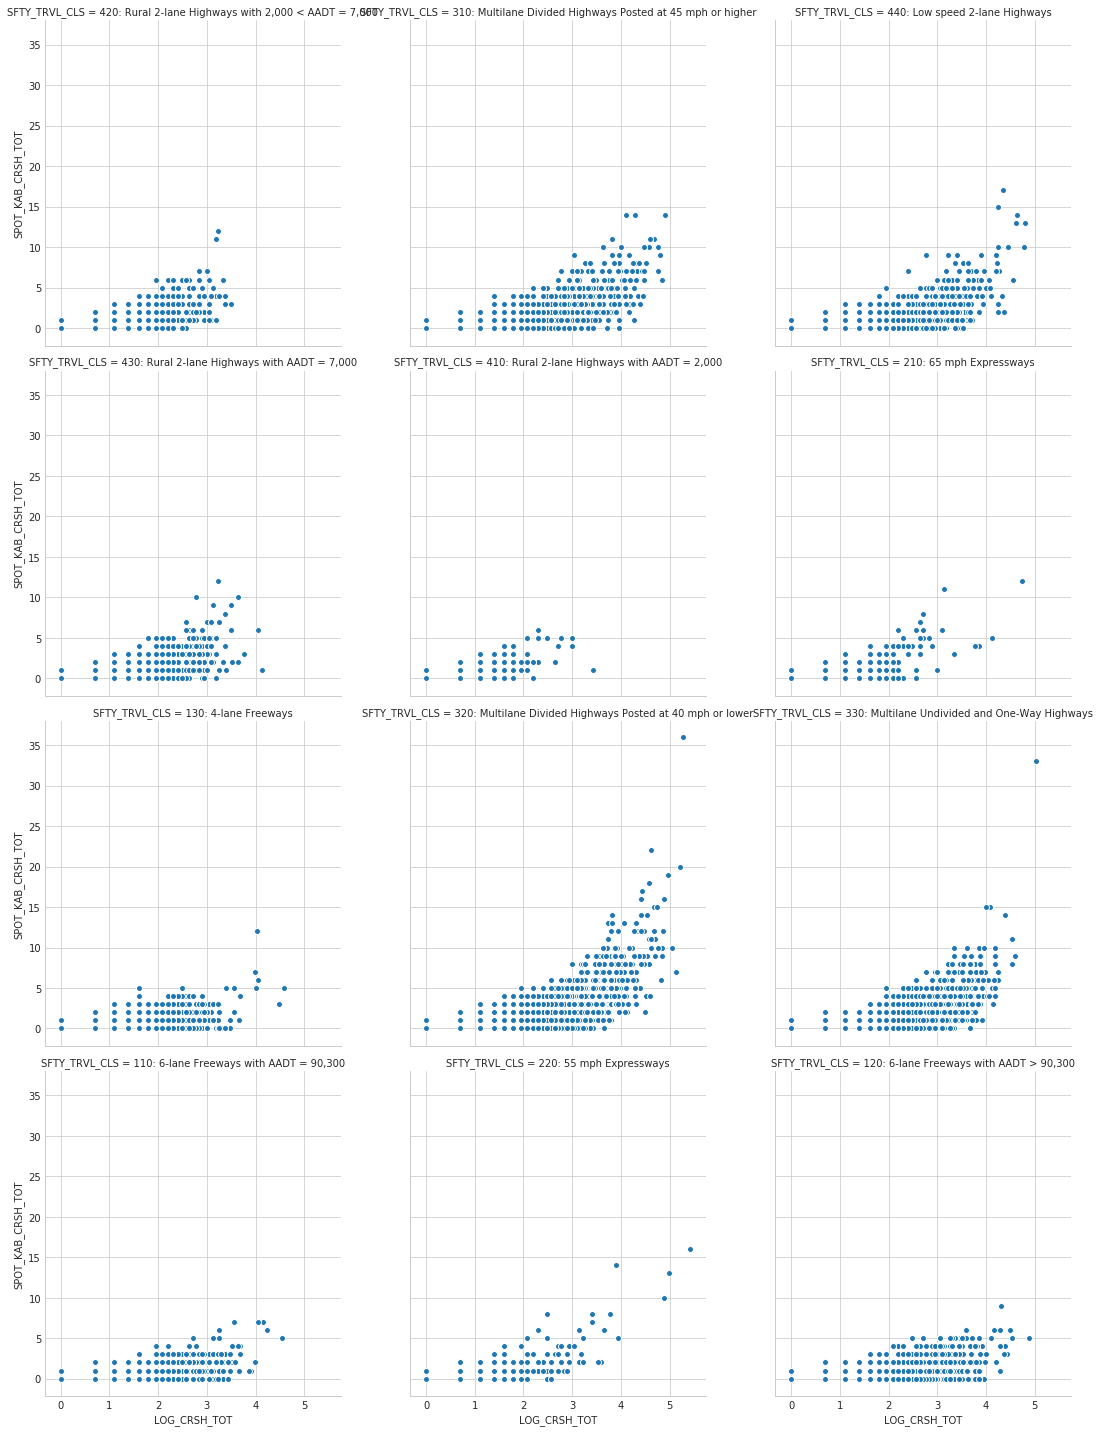

In [64]:
g = sns.FacetGrid(mydata, col="SFTY_TRVL_CLS", size=5, col_wrap=3)
g = (g.map(plt.scatter, "LOG_CRSH_TOT", "SPOT_KAB_CRSH_TOT", edgecolor = "w")
    .add_legend())

### Check to see if there is correlation between total KAB crashes and total number of vehicles entering (MEV)

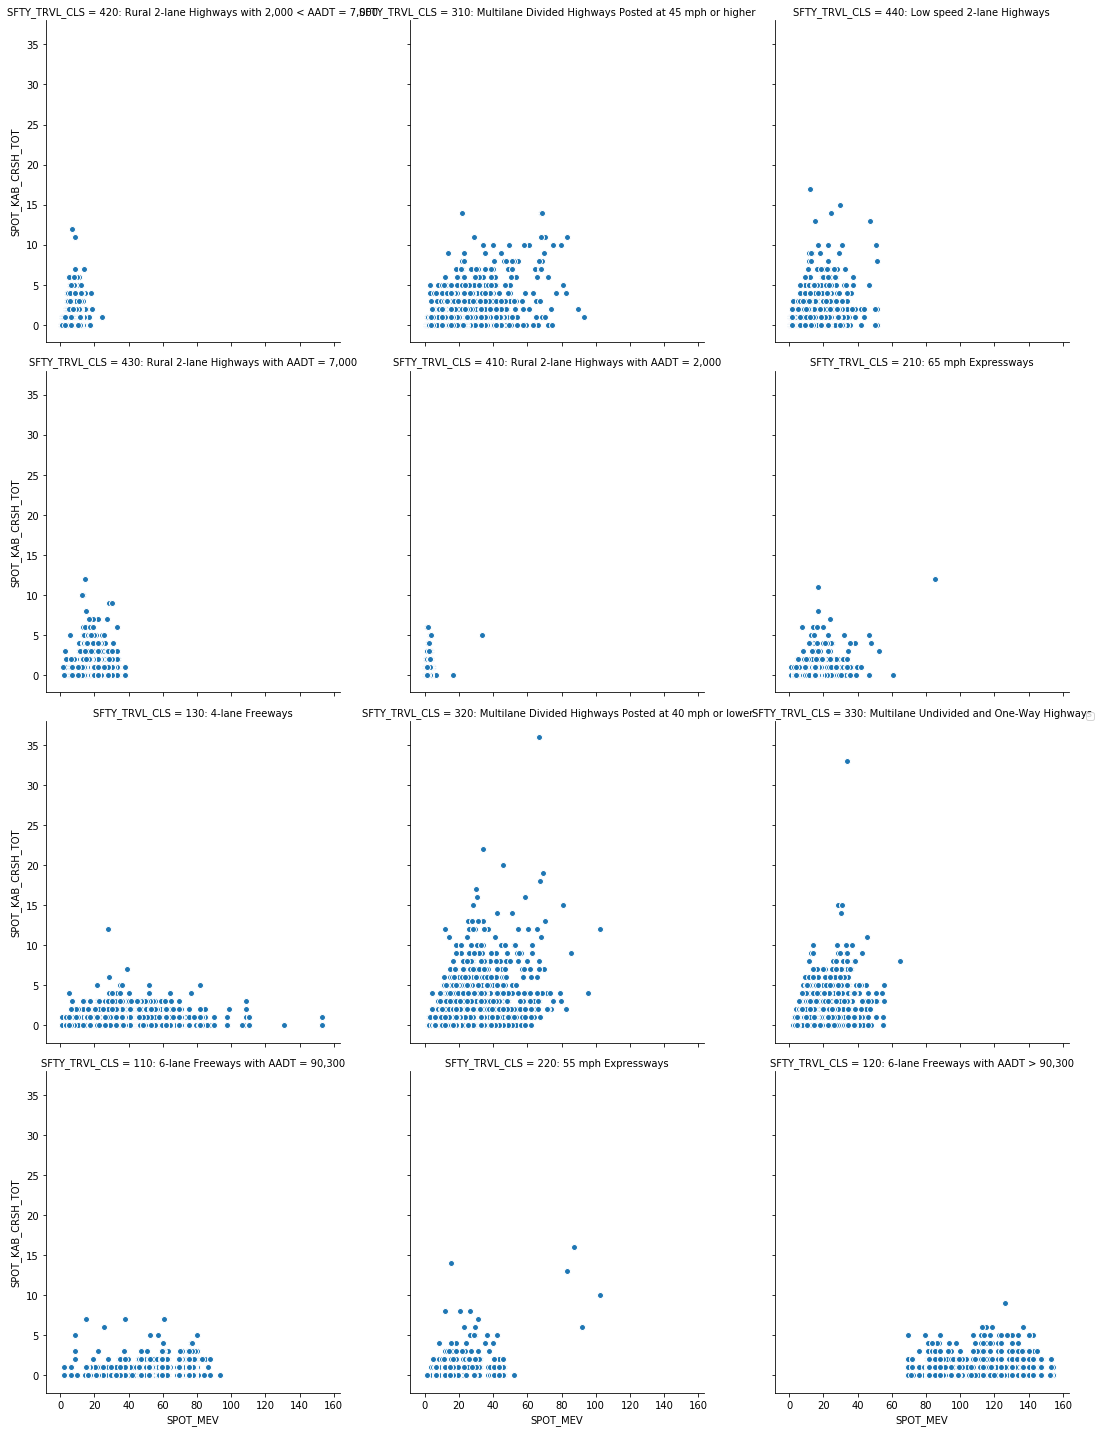

In [12]:
g = sns.FacetGrid(mydata, col="SFTY_TRVL_CLS", size=5, col_wrap=3)
g = (g.map(plt.scatter, "SPOT_MEV","SPOT_KAB_CRSH_TOT", edgecolor = "w")
    .add_legend())

### Check to see if there is correlation between total crashes and total number of vehicles entering (MEV)

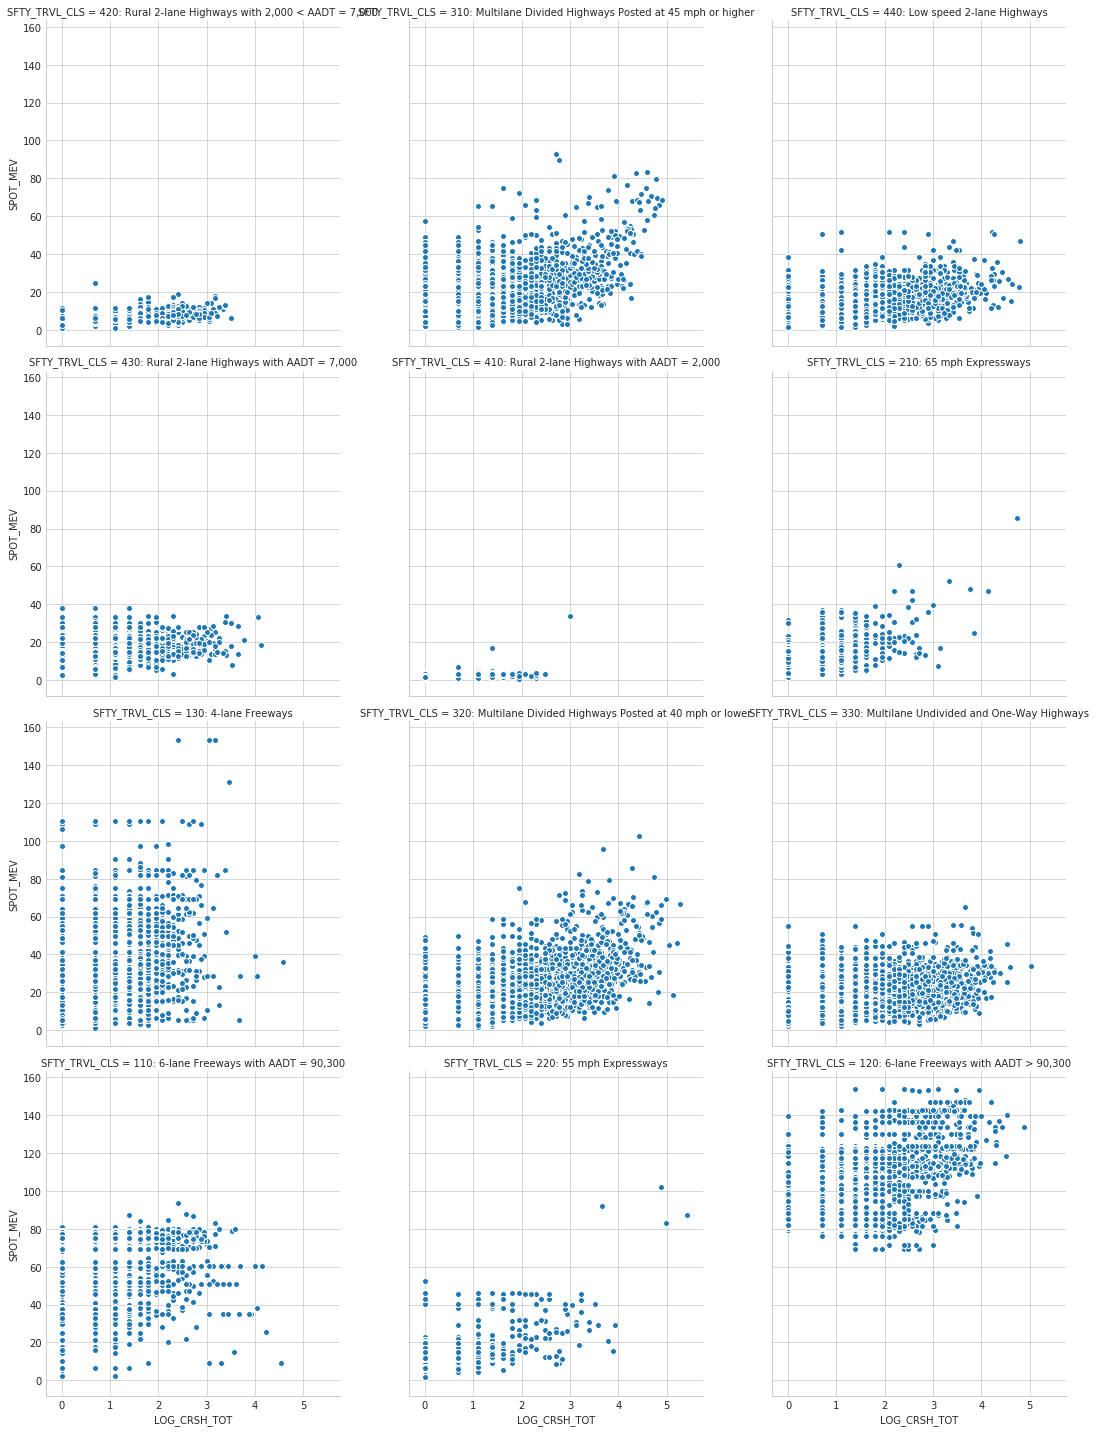

In [66]:
g = sns.FacetGrid(mydata, col="SFTY_TRVL_CLS", size=5, col_wrap=3)
g = (g.map(plt.scatter, "LOG_CRSH_TOT","SPOT_MEV", edgecolor = "w")
    .add_legend())

## 7.5 Plots of KAB crash totals vs. Crash totals by Travel Class with Linear regression line.

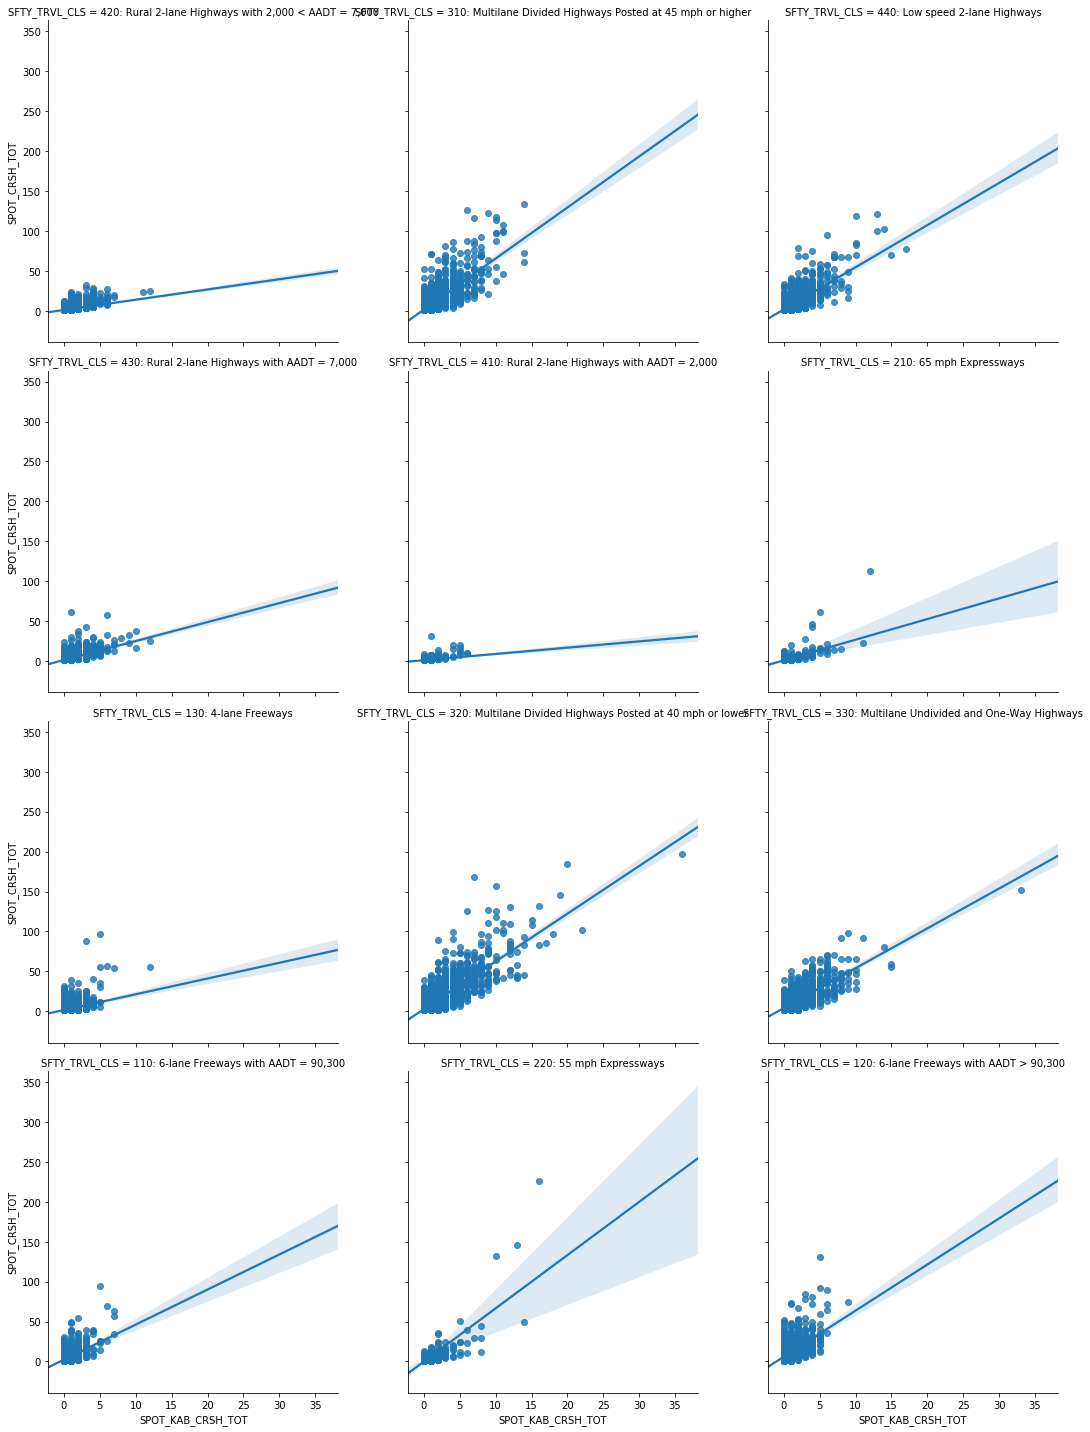

In [21]:
g = sns.lmplot(x="SPOT_KAB_CRSH_TOT" , y="SPOT_CRSH_TOT", data=mydata,
               palette="Set1", col="SFTY_TRVL_CLS",
               col_wrap=3, size=5)        

## 7.6 Plots of Fatal Crash Totals vs. Crash Totals by Travel Class

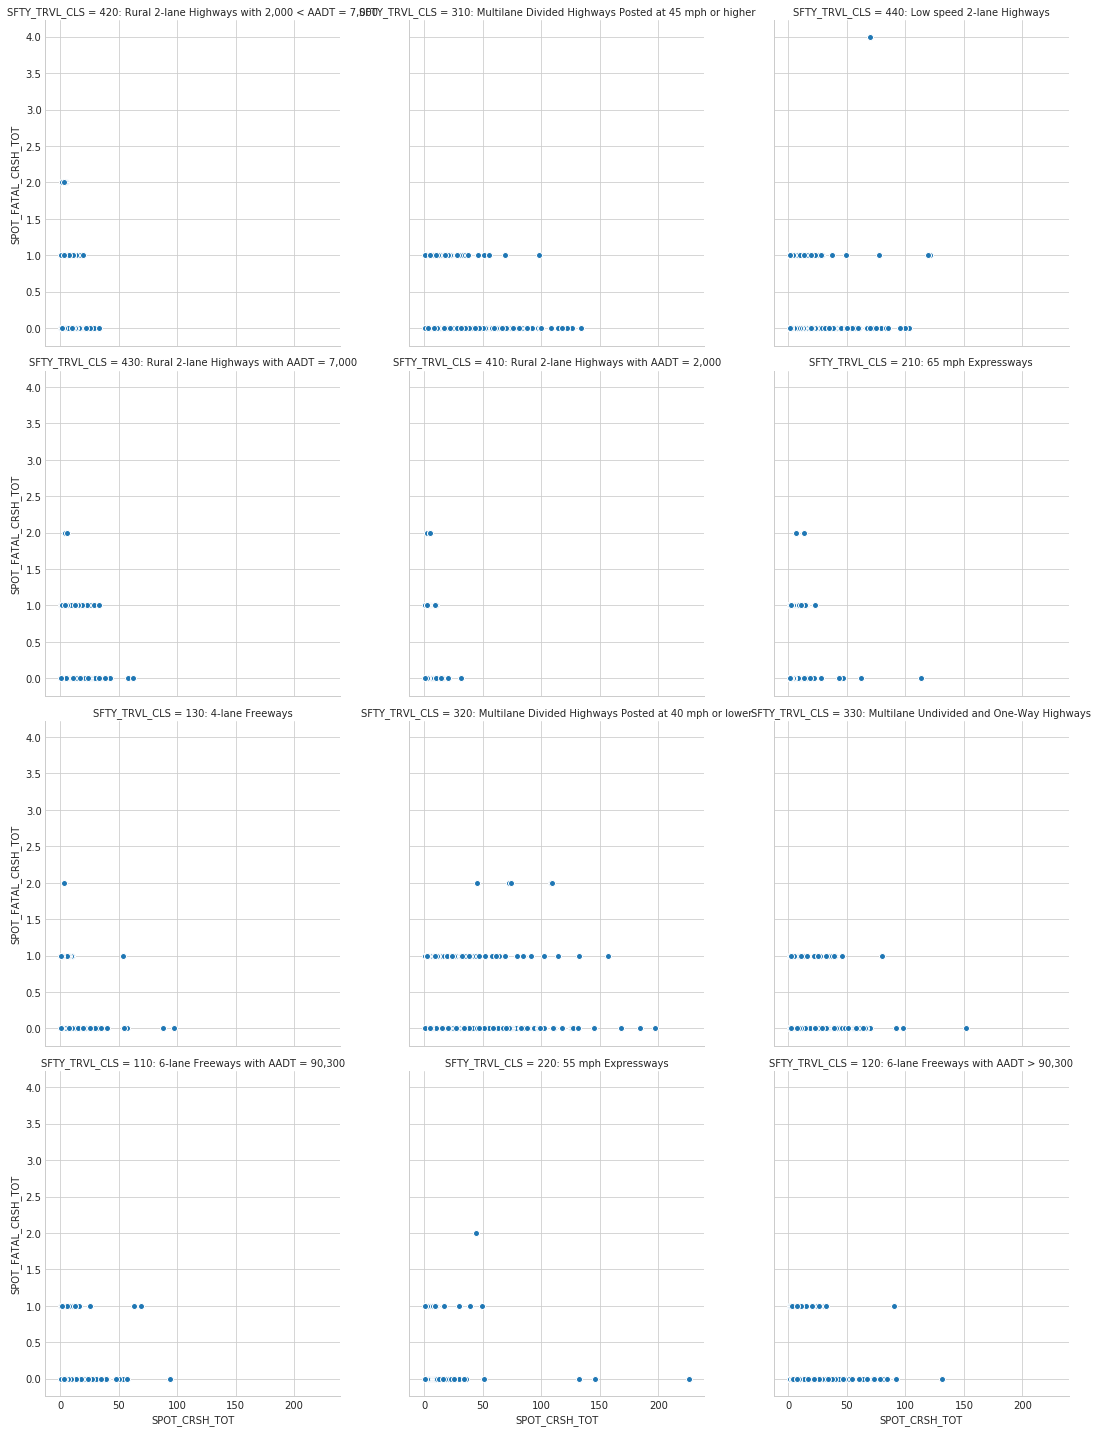

In [86]:
g = sns.FacetGrid(mydata, col="SFTY_TRVL_CLS", size=5, col_wrap=3)
g = (g.map(plt.scatter, "SPOT_CRSH_TOT","SPOT_FATAL_CRSH_TOT", edgecolor = "w")
    .add_legend())

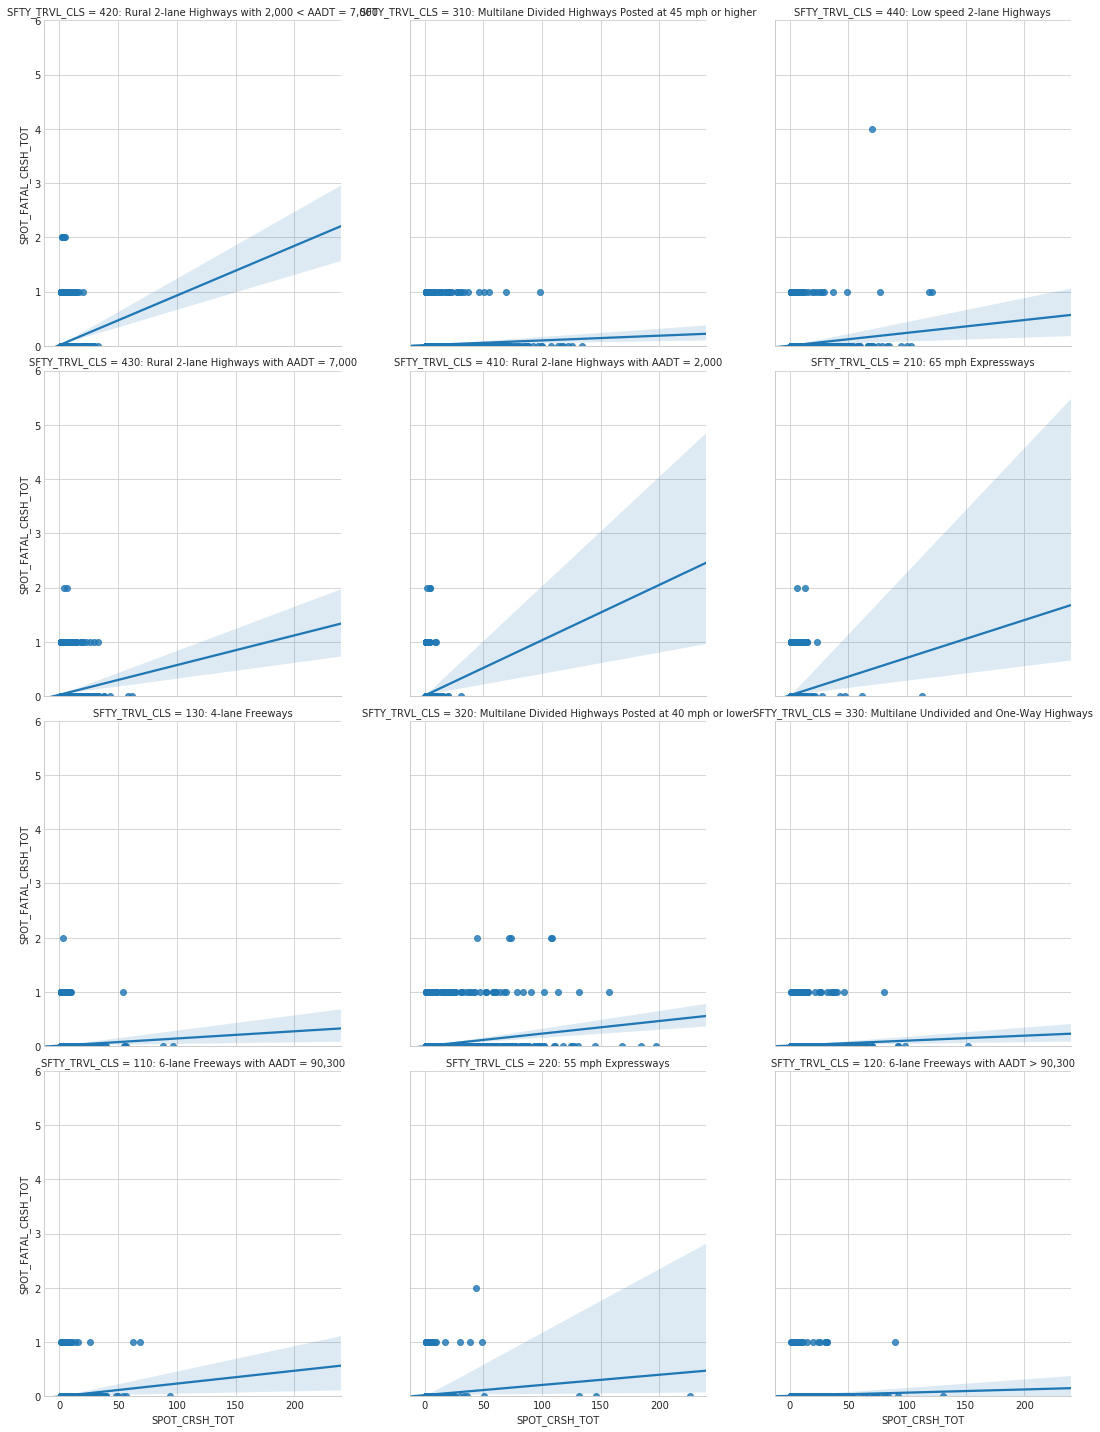

In [87]:
g = sns.lmplot(x="SPOT_CRSH_TOT", y="SPOT_FATAL_CRSH_TOT", data=mydata,
               palette="Set1", col="SFTY_TRVL_CLS",
               col_wrap=3, size=5)
g = (g.set(ylim=(0, 6))); 

## 7.7 Plots of Type A Crash Totals vs. Crash Totals by Travel Class

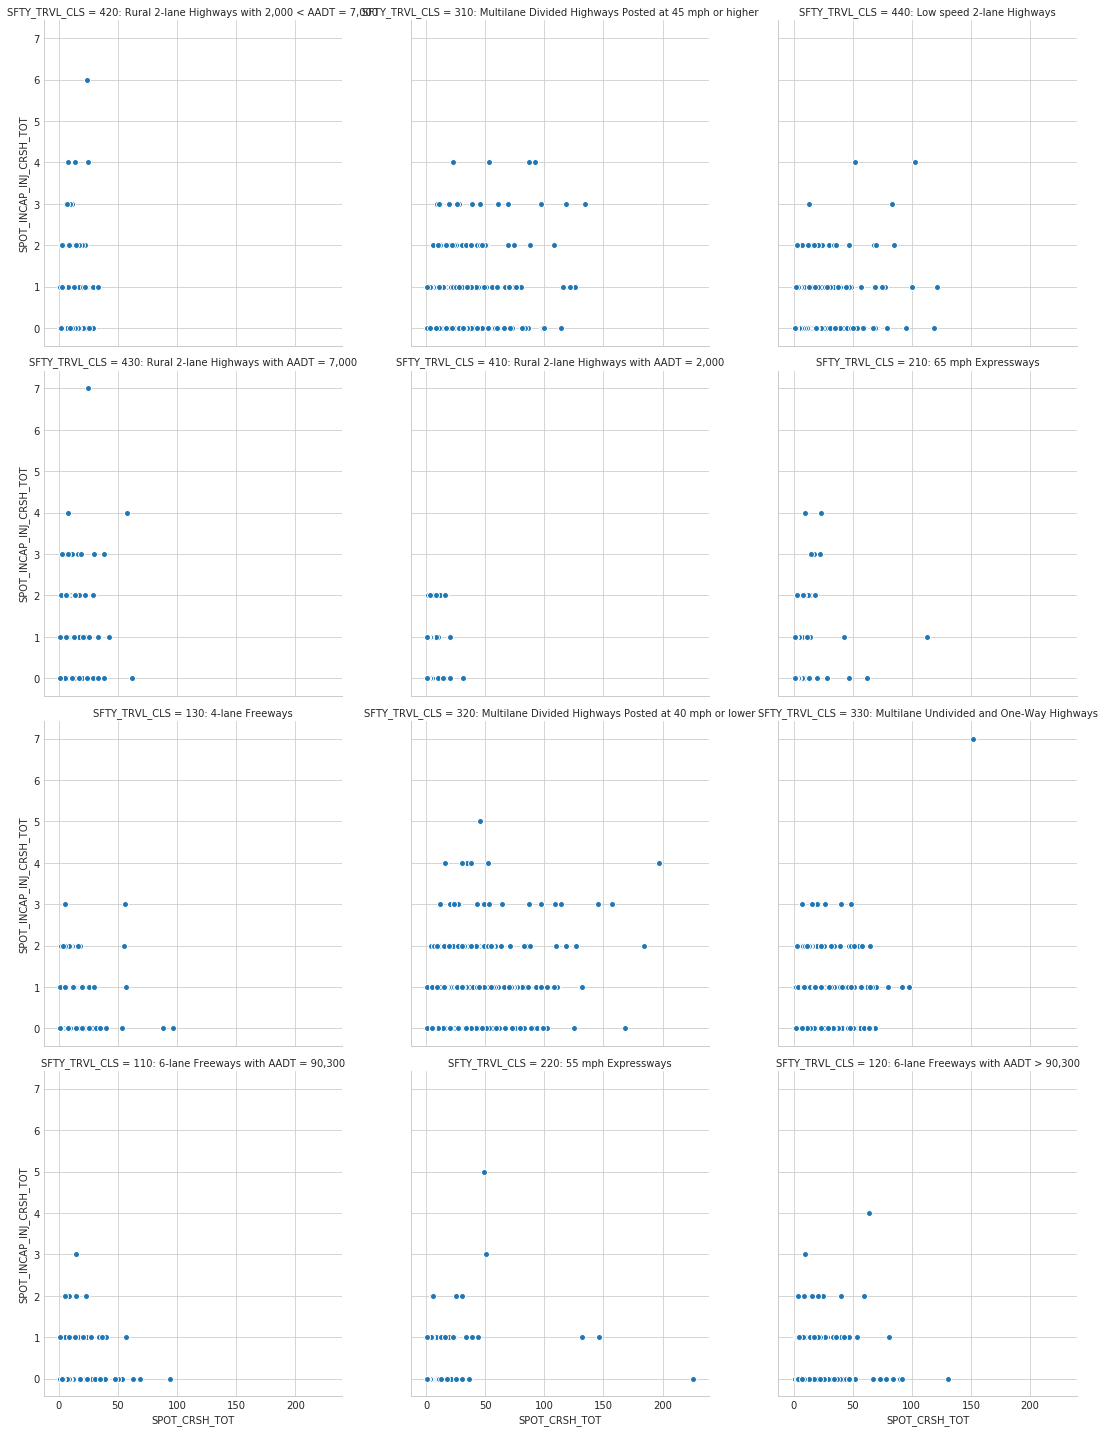

In [88]:
g = sns.FacetGrid(mydata, col="SFTY_TRVL_CLS", size=5, col_wrap=3)
g = g.map(plt.scatter, "SPOT_CRSH_TOT",'SPOT_INCAP_INJ_CRSH_TOT', edgecolor = "w").add_legend()

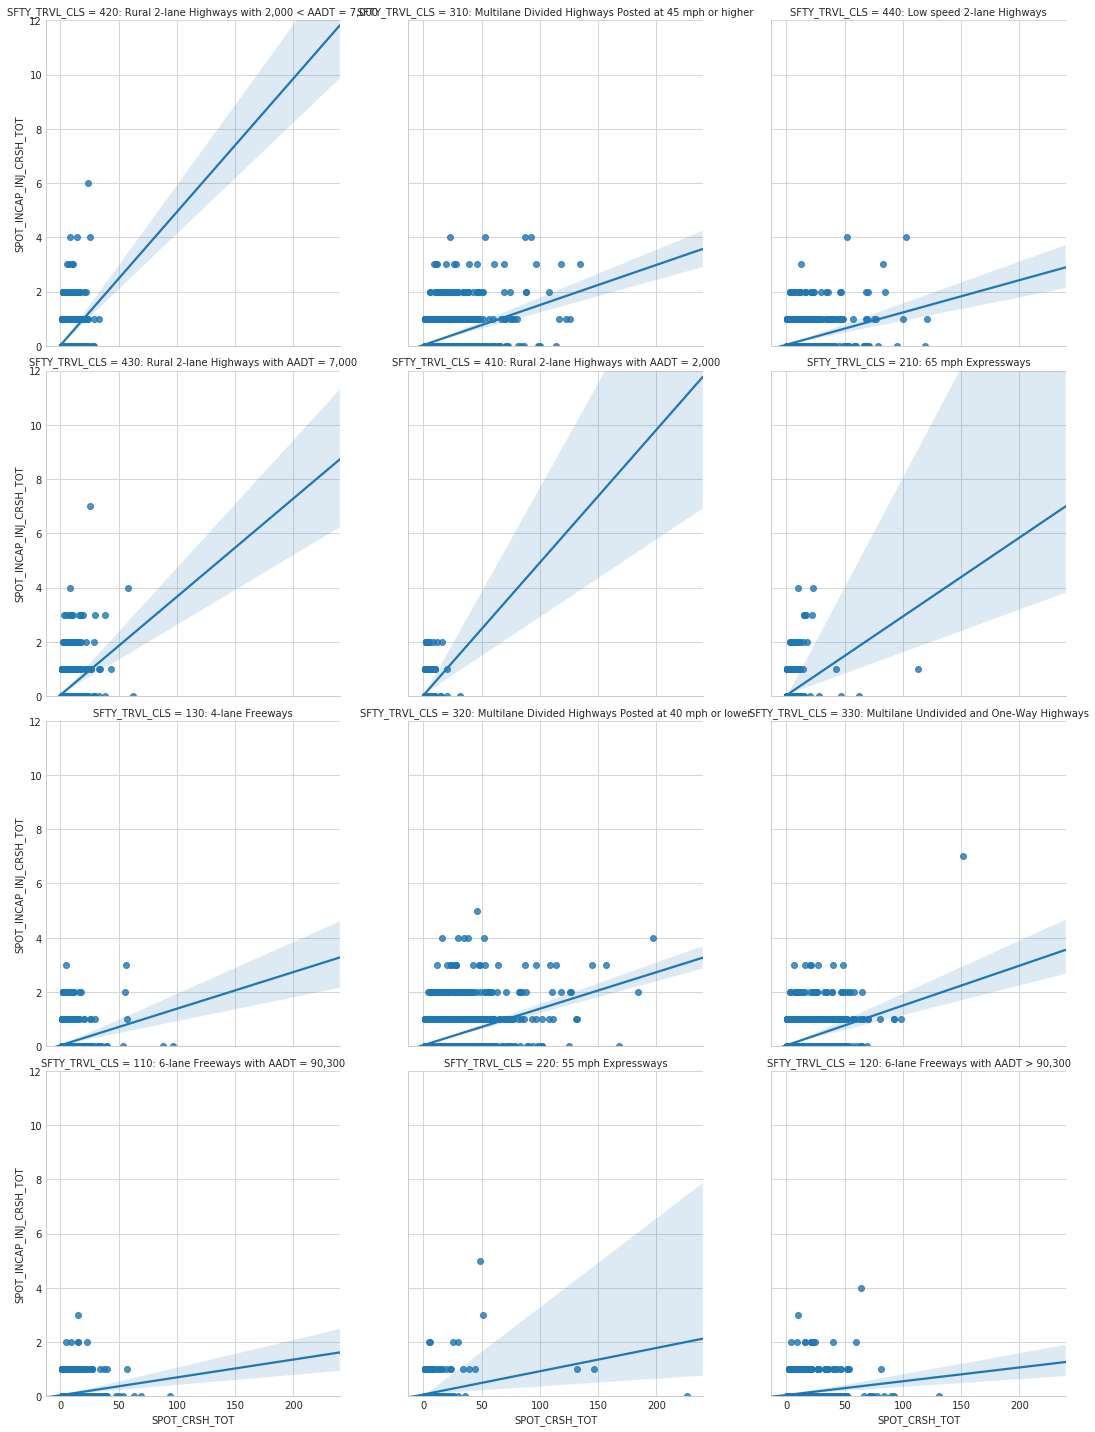

In [89]:
g = sns.lmplot(x="SPOT_CRSH_TOT", y="SPOT_INCAP_INJ_CRSH_TOT", data=mydata,
               palette="Set1", col="SFTY_TRVL_CLS",
               col_wrap=3, size=5)
g = (g.set(ylim=(0, 12))); 

## 7.8 Plots of Type B Crash Totals vs. Crash Totals by Travel Class

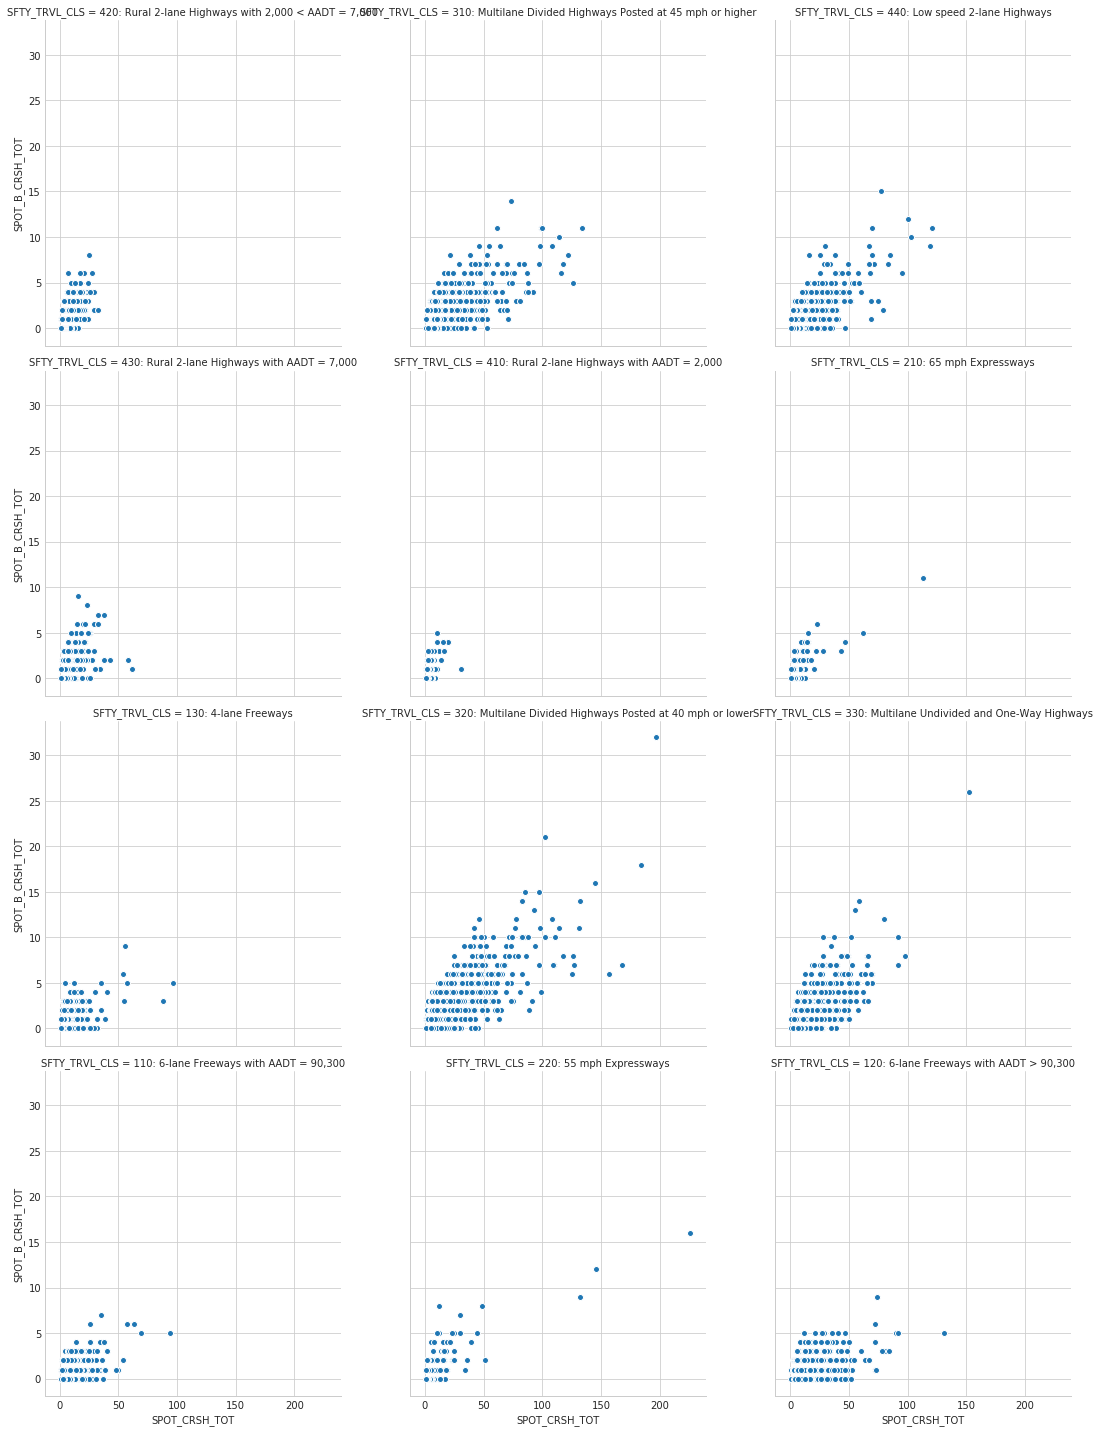

In [90]:
g = sns.FacetGrid(mydata, col="SFTY_TRVL_CLS", size=5, col_wrap=3)
g = (g.map(plt.scatter, "SPOT_CRSH_TOT",'SPOT_B_CRSH_TOT', edgecolor = "w")
    .add_legend())

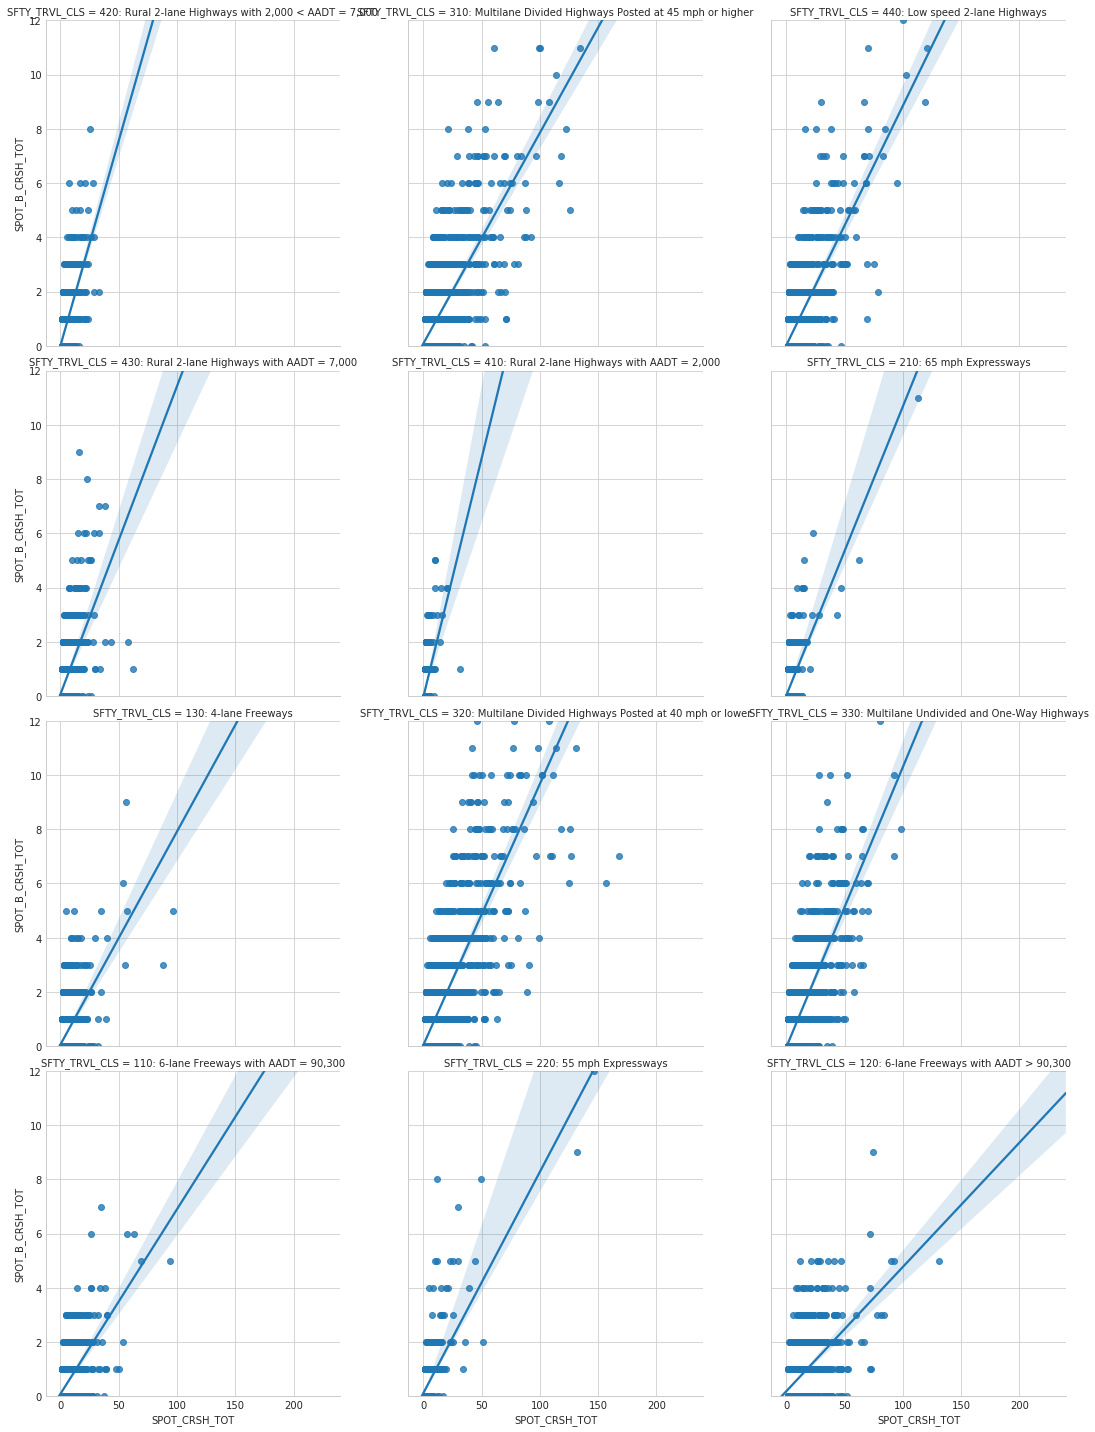

In [91]:
g = sns.lmplot(x="SPOT_CRSH_TOT", y="SPOT_B_CRSH_TOT", data=mydata,
               palette="Set1", col="SFTY_TRVL_CLS",
               col_wrap=3, size=5)
g = (g.set(ylim=(0, 12))); 

## 7.9 Plots of Type KABC Crash Totals vs. Crash Totals by Travel Class

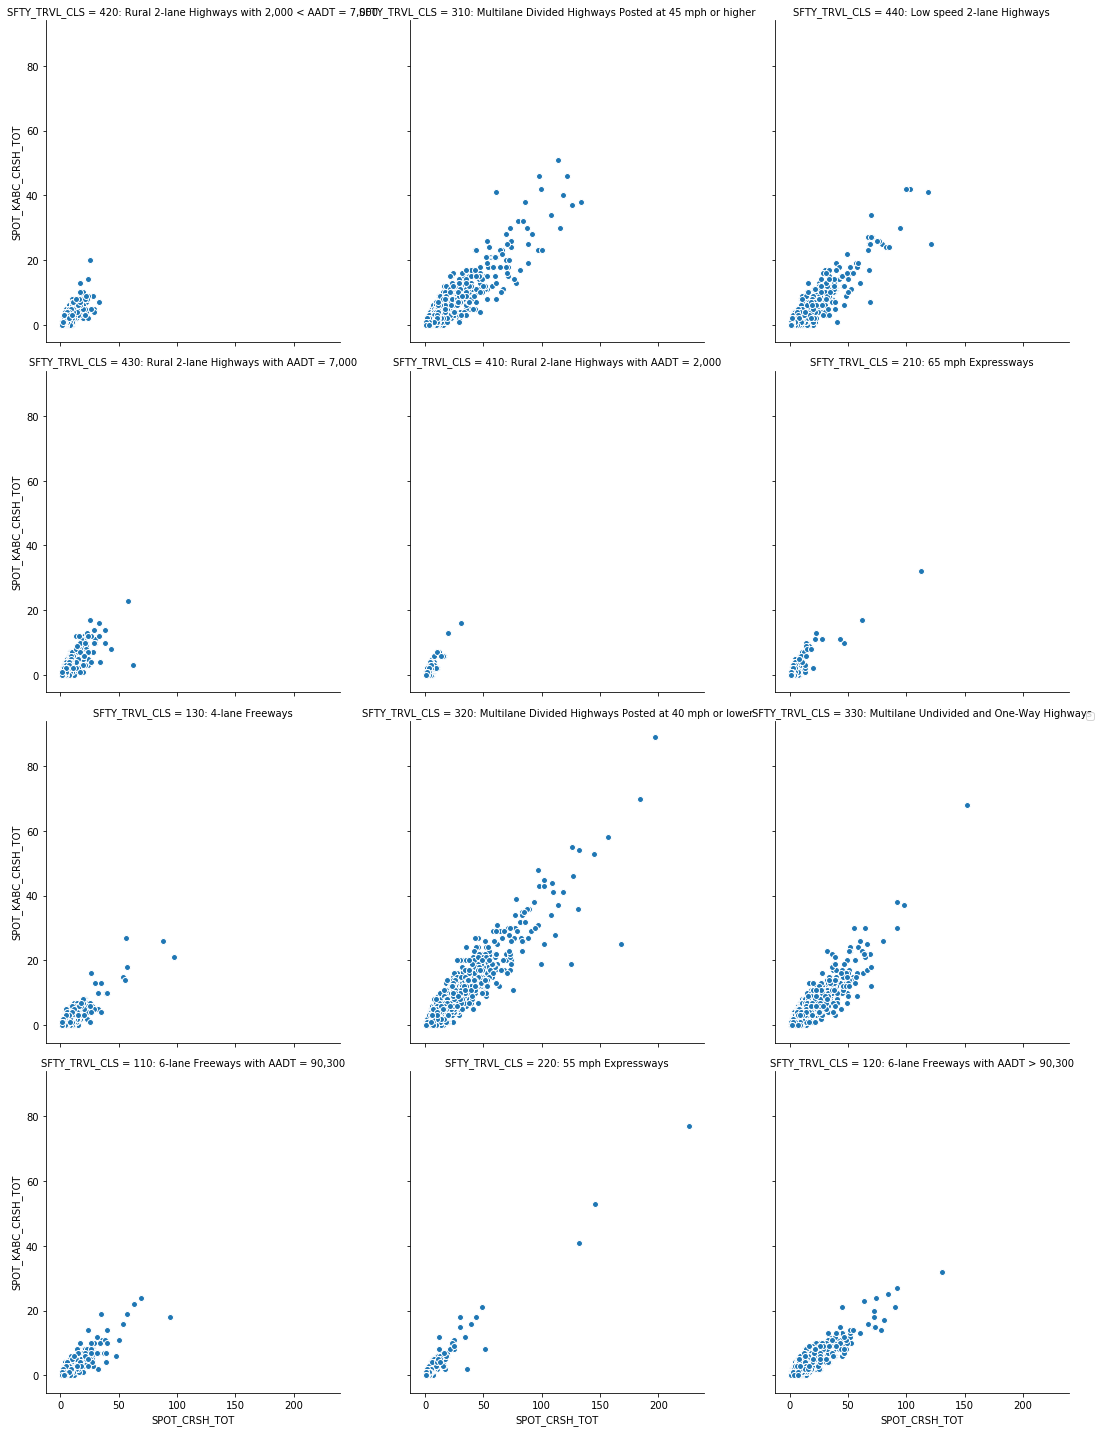

In [22]:
g = sns.FacetGrid(mydata, col="SFTY_TRVL_CLS", size=5, col_wrap=3)
g = (g.map(plt.scatter, "SPOT_CRSH_TOT",'SPOT_KABC_CRSH_TOT', edgecolor = "w")
    .add_legend())

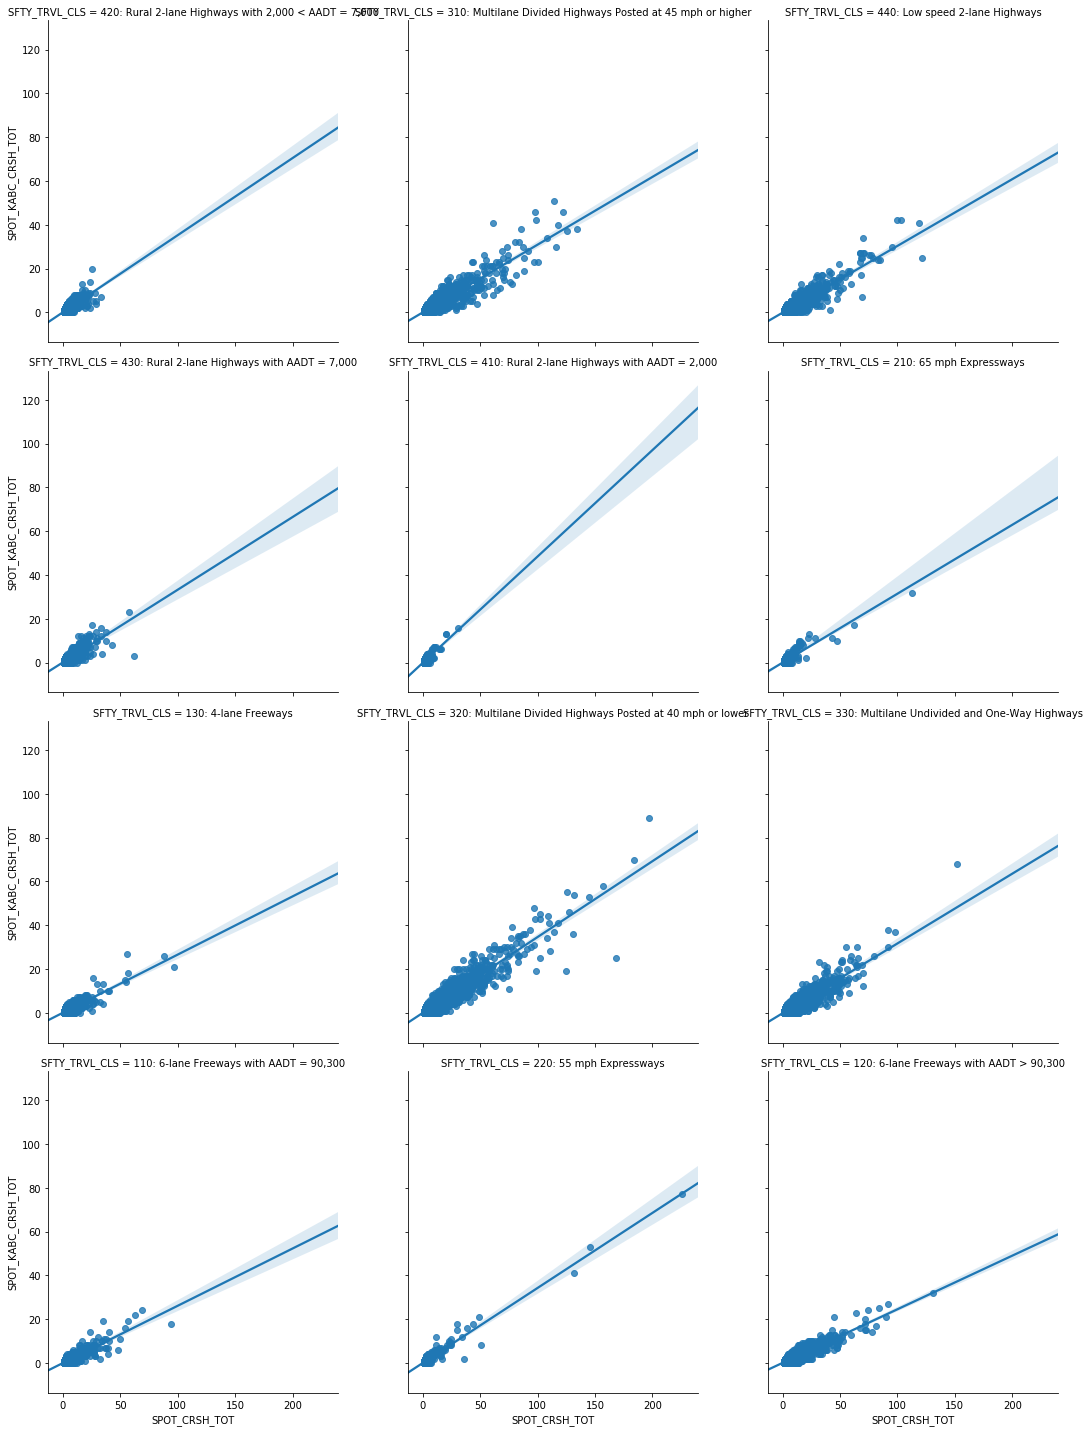

In [24]:
g = sns.lmplot(x="SPOT_CRSH_TOT", y="SPOT_KABC_CRSH_TOT", data=mydata,
               palette="Set1", col="SFTY_TRVL_CLS",
               col_wrap=3, size=5)

## 7.10 Pairplot of Length vs. Width
### Below we can see that there is faint linear relationship between the following categories: Total vs. KAB, Total vs B, KAB vs. B, and with a very wide spread - KAB vs. Incapacitating (A).  We can also see that the Fatal Crashes are pretty much random. 
### However, we can see a very strong linear relationship between Total Crashes and Total KABC crashes.
### There appears to be no correlation with Total Crashes and Fatal Crashes. We also see that there is not correlation between Total Crashes and Incapacitating (A) injury crashes.

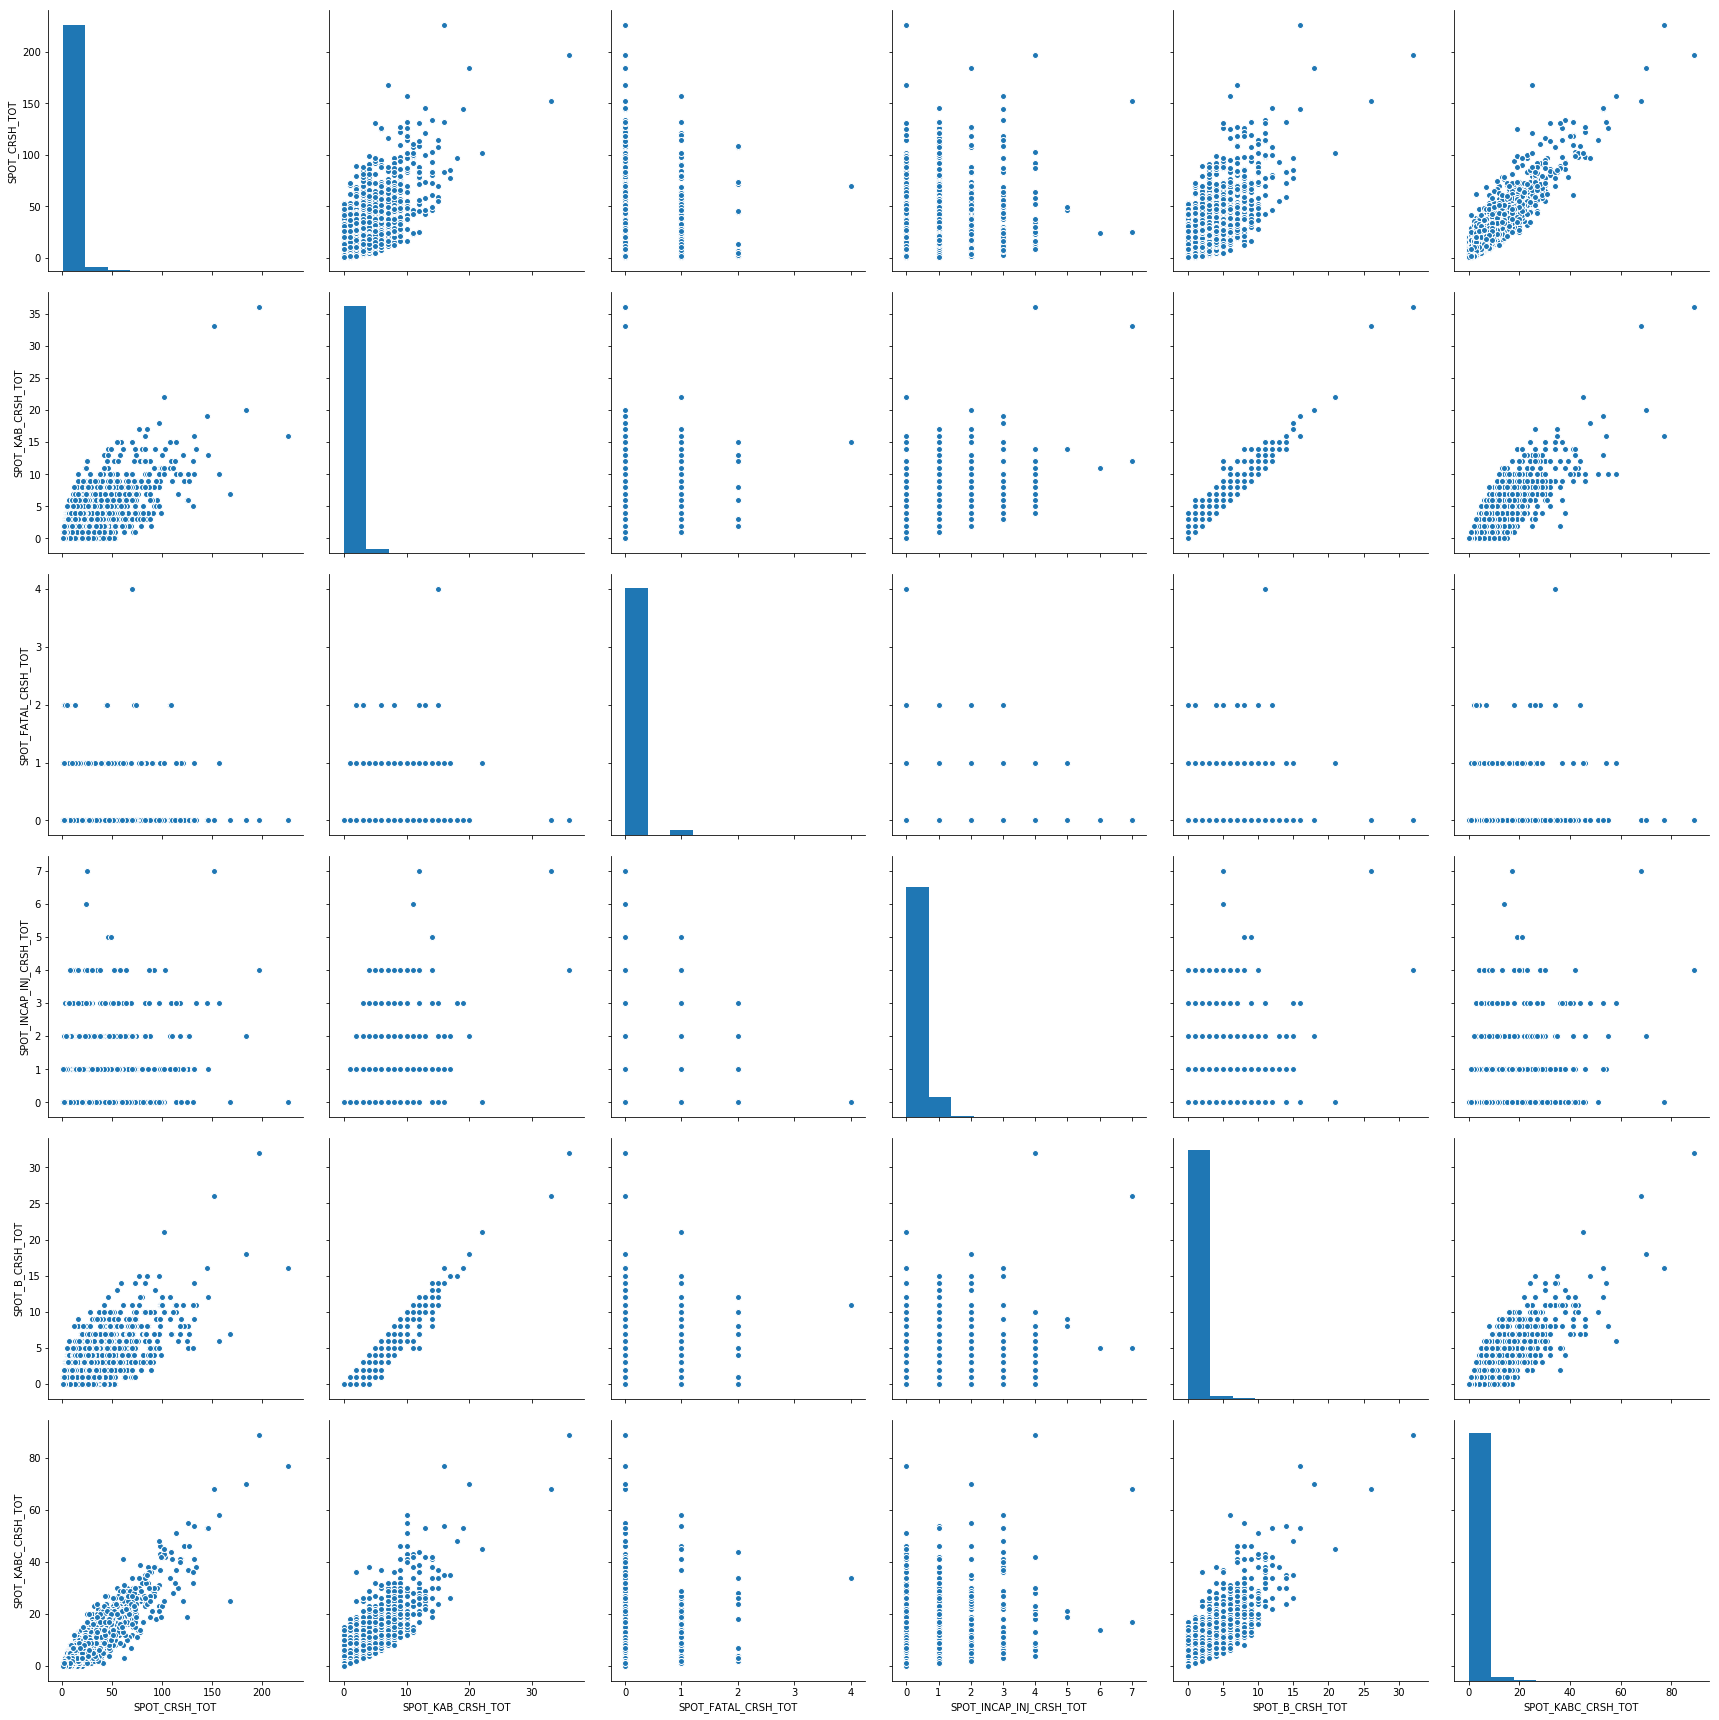

In [27]:
sns.pairplot(mydata, vars=["SPOT_CRSH_TOT","SPOT_KAB_CRSH_TOT","SPOT_FATAL_CRSH_TOT", "SPOT_INCAP_INJ_CRSH_TOT",
                           "SPOT_B_CRSH_TOT", "SPOT_KABC_CRSH_TOT"],size=4)

## 7.11 Pearson Jointplot Regression Analysis of Crash Total vs. KABC Crash Total (Entire Data Set)
### The two plots below are complimentary. The first plot is a residual plot. We can see that the points are nearly randomly distributed (not perfect), but we see no specific trends to the shape of the distribution. Specifically wiht respect to the KABC axis, there is a very nice distribution above and below the 0 axis. As we increase in total crashes it spreads out more. This is due to the fact that mawe have a much higher number of spots with 1 crash than spots with higher crashes. 

### With this combined knowledge, we can make the assumption that the linear regression model is a good fit for the data set. 

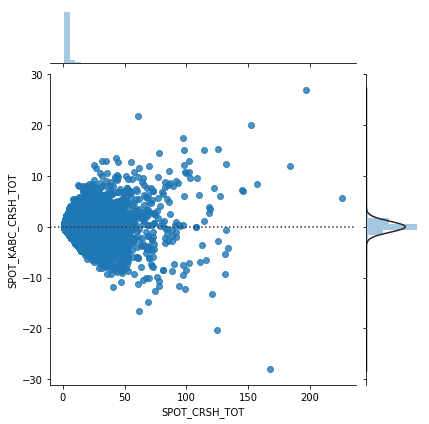

In [28]:
sns.jointplot(x="SPOT_CRSH_TOT" , y="SPOT_KABC_CRSH_TOT", data = mydata, kind="resid")

### This plot provides us the regression line for KAB vs. Crash total. We can see in general that the KAB frequency increases with the total crash frequency. This makes sense as one would expect a similar relationship.

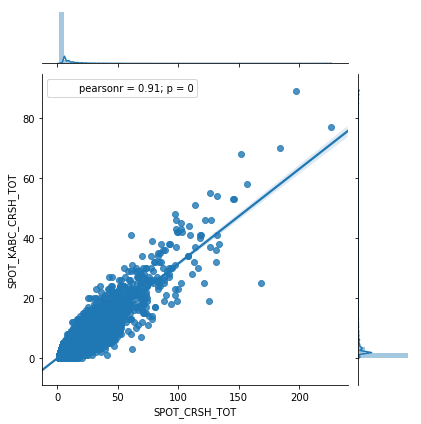

In [29]:
sns.jointplot(x="SPOT_CRSH_TOT" , y="SPOT_KABC_CRSH_TOT", data = mydata, kind="reg")

## 7.11 Correlation Plot 
### Shows how each vairable is correlated to one another.

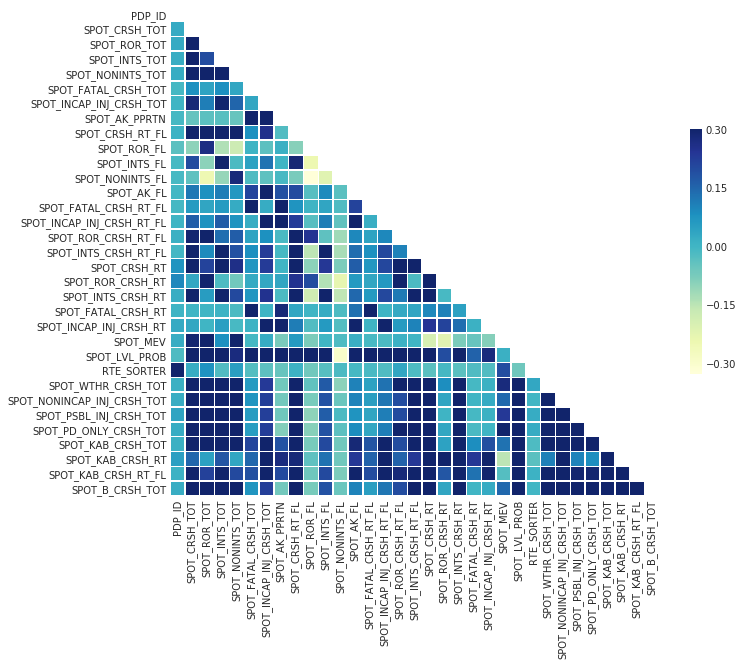

In [95]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a large random dataset
#rs = np.random.RandomState(33)
# = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = mydata.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask, cmap="YlGnBu", vmax=.3, center=0,
            square="equal", linewidths=.5, cbar_kws={"shrink": .5})


In [96]:
# pairwise correlation
mydata.drop(['PDP_ID', 'RTE_SORTER'], axis=1).corr(method='spearman')

SPOT_CRSH_TOT  SPOT_ROR_TOT  SPOT_INTS_TOT  \
SPOT_CRSH_TOT                    1.000000      0.414873       0.561707   
SPOT_ROR_TOT                     0.414873      1.000000      -0.128608   
SPOT_INTS_TOT                    0.561707     -0.128608       1.000000   
SPOT_NONINTS_TOT                 0.507824     -0.078396       0.136321   
SPOT_FATAL_CRSH_TOT              0.059940      0.036975       0.041217   
SPOT_INCAP_INJ_CRSH_TOT          0.189769      0.077479       0.164818   
SPOT_AK_PPRTN                    0.166245      0.072217       0.139709   
SPOT_CRSH_RT_FL                  0.538414      0.248553       0.439898   
SPOT_ROR_FL                     -0.048249      0.483633      -0.286358   
SPOT_INTS_FL                     0.258934     -0.242655       0.661298   
SPOT_NONINTS_FL                 -0.092812     -0.477619      -0.225064   
SPOT_AK_FL                       0.217363      0.086600       0.175036   
SPOT_FATAL_CRSH_RT_FL            0.060125      0.037404       0.040918   
SPOT_INCAP_INJ_CRSH_RT_FL        0.178971      0.072523       0.151857   
SPOT_ROR_CRSH_RT_FL              0.337654      0.492696       0.047119   
SPOT_INTS_CRSH_RT_FL             0.427440     -0.038551       0.679136   
SPOT_CRSH_RT                     0.426272      0.108754       0.466138   
SPOT_ROR_CRSH_RT                 0.080757      0.771042      -0.220980   
SPOT_INTS_CRSH_RT                0.517188     -0.165095       0.988253   
SPOT_FATAL_CRSH_RT               0.059549      0.037047       0.040759   
SPOT_INCAP_INJ_CRSH_RT           0.180437      0.071979       0.159567   
SPOT_MEV                         0.399565      0.242733       0.071461   
SPOT_LVL_PROB                    0.615269      0.300215       0.596137   
SPOT_WTHR_CRSH_TOT               0.585244      0.409302       0.318336   
SPOT_NONINCAP_INJ_CRSH_TOT       0.407783      0.184380       0.314433   
SPOT_PSBL_INJ_CRSH_TOT           0.517971      0.178427       0.396194   
SPOT_PD_ONLY_CRSH_TOT            0.811779      0.356941       0.475129   
SPOT_KAB_CRSH_TOT                0.413540      0.188482       0.313828   
SPOT_KAB_CRSH_RT                 0.322310      0.133585       0.273669   
SPOT_KAB_CRSH_RT_FL              0.240597      0.129825       0.198177   
SPOT_B_CRSH_TOT                  0.407783      0.184380       0.314433   

                            SPOT_NONINTS_TOT  SPOT_FATAL_CRSH_TOT  \
SPOT_CRSH_TOT                       0.507824             0.059940   
SPOT_ROR_TOT                       -0.078396             0.036975   
SPOT_INTS_TOT                       0.136321             0.041217   
SPOT_NONINTS_TOT                    1.000000             0.012791   
SPOT_FATAL_CRSH_TOT                 0.012791             1.000000   
SPOT_INCAP_INJ_CRSH_TOT             0.086671             0.020628   
SPOT_AK_PPRTN                       0.065551             0.422411   
SPOT_CRSH_RT_FL                     0.268744             0.072313   
SPOT_ROR_FL                        -0.371983             0.010049   
SPOT_INTS_FL                       -0.109947             0.041495   
SPOT_NONINTS_FL                     0.598949            -0.019229   
SPOT_AK_FL                          0.089751             0.205902   
SPOT_FATAL_CRSH_RT_FL               0.012900             0.999930   
SPOT_INCAP_INJ_CRSH_RT_FL           0.075002             0.016913   
SPOT_ROR_CRSH_RT_FL                 0.028000             0.049532   
SPOT_INTS_CRSH_RT_FL                0.077470             0.061080   
SPOT_CRSH_RT                        0.106876             0.061968   
SPOT_ROR_CRSH_RT                   -0.335788             0.034528   
SPOT_INTS_CRSH_RT                   0.091573             0.040474   
SPOT_FATAL_CRSH_RT                  0.012112             0.999926   
SPOT_INCAP_INJ_CRSH_RT              0.076218             0.018859   
SPOT_MEV                            0.371033            -0.007039   
SPOT_LVL_PROB                       0.092248             0.280913   
SPO

# 8. Remove Factors that are not valuable

In [31]:
from pydoc import help
from scipy.stats.stats import pearsonr
help(pearsonr)

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Calculates a Pearson correlation coefficient and the p-value for testing
    non-correlation.
    
    The Pearson correlation coefficient measures the linear relationship
    between two datasets. Strictly speaking, Pearson's correlation requires
    that each dataset be normally distributed, and not necessarily zero-mean.
    Like other correlation coefficients, this one varies between -1 and +1
    with 0 implying no correlation. Correlations of -1 or +1 imply an exact
    linear relationship. Positive correlations imply that as x increases, so
    does y. Negative correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these datasets. The p-values are not entirely
    reliable but are probably reasonable for datasets larger than 

# 9. The pearson value below shows us that Spot B has a high correlation with Spot KAB crash totals and Spot KABC totals.

## 9.1 The pearson value below shows us that Spot B has a high correlation with Spot KAB crash totals and Spot KABC totals.

In [32]:
pearsonr(mydata.SPOT_B_CRSH_TOT, mydata.SPOT_KAB_CRSH_TOT)

(0.94025902223939417, 0.0)

In [34]:
pearsonr(mydata.SPOT_B_CRSH_TOT, mydata.SPOT_KABC_CRSH_TOT)

(0.81404803200184062, 0.0)

## 9.2 The pearson value below shows us that Spot crash total has a high correlation with Spot KABC crash totals and a moderate correlation with Spot KAB crash totals.

In [33]:
pearsonr(mydata.SPOT_CRSH_TOT, mydata.SPOT_KABC_CRSH_TOT)

(0.90954731984746051, 0.0)

In [99]:
pearsonr(mydata.SPOT_CRSH_TOT, mydata.SPOT_KAB_CRSH_TOT)

(0.71092945303808253, 0.0)

## 9.3 The pearson value below shows us that Spot Incapacitating Injury (A) has a moderate correlation with Spot KAB crash totals and a low correlation with Spot KABC crash totals.

In [100]:
pearsonr(mydata.SPOT_INCAP_INJ_CRSH_TOT, mydata.SPOT_KAB_CRSH_TOT)

(0.51356023384742089, 0.0)

In [35]:
pearsonr(mydata.SPOT_INCAP_INJ_CRSH_TOT, mydata.SPOT_KABC_CRSH_TOT)

(0.36727499208518116, 0.0)

## 9.4 The pearson value below shows us that Spot Fatal total has a low correlation with Spot KAB crash totals and Spot KABC totals.

In [101]:
pearsonr(mydata.SPOT_FATAL_CRSH_TOT, mydata.SPOT_KAB_CRSH_TOT)

(0.21094325038703496, 0.0)

In [36]:
pearsonr(mydata.SPOT_FATAL_CRSH_TOT, mydata.SPOT_KABC_CRSH_TOT)

(0.12556946940915781, 1.1590469226204048e-199)